<a href="https://colab.research.google.com/github/tahir-97/CardioVascular_Risk_prediction/blob/main/CDVR(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b><u>Project Title : Predicting the Risk Of Cardiovascular Diseases</u></b>


***Cardiovascular diseases (CVDs) are a collection of heart and blood vessel illnesses that include coronary heart disease, cerebrovascular disease, rheumatic heart disease, and others.High blood pressure, high cholesterol, and smoking are all significant risk factors for heart disease.In 2019, there were around 523.2 million instances of cardiovascular disease, a 26.6% rise from 2010.***


**Project Type** - Classification

**Contribution** - Individual

# **Project Summary -**
***The purpose of this research was to apply machine learning techniques to estimate patients' 10-year risk of future coronary heart disease (CHD) using data from an ongoing cardiovascular study of Framingham, Massachusetts residents. The collection contained information on almost 4,000 patients and 15 features, each of which represented a possible risk factor for CHD. These characteristics included demographic, behavioral, and medical risks.***

***Extensive preprocessing was undertaken to clean and alter the data in preparation for analysis. This includes finding and eliminating outliers using the Interquartile Range (IQR) approach, as well as managing missing values using median, mode, and KNN imputation techniques. Skewed continuous data were also modified using log and square root transformations to minimize skewness and to improve accuracy.***

***Boost model performance. To reduce multicollinearity, a variance inflation factor was used in feature selection, and a new feature termed pulse pressure was generated to represent the link between systolic and diastolic blood pressure. To simplify the dataset, redundant columns were also deleted. The most essential factors for predicting CHD risk were found as 'age', 'sex', 'education', 'cigs_per_day', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol', 'bmi', 'heart_rate', 'glucose', and 'pulse_pressure'. To deal with the dataset's imbalance, the SMOTE approach was used with Tomek links undersampling to balance the class distribution and increase model performance. To verify that all features were on the same scale, the data was scaled using a typical scalar approach. On the basis of their performance on the primary dataset, many machine learning models were examined. The recall evaluation metric. The Neural Network (tuned) was chosen as the final prediction model after thorough consideration since it had the greatest recall score among the models assessed. The objective was to properly identify as many patients with CHD risk as possible by using a model with a high recall score, even if it meant having some false positives. Overall, utilizing data from a cardiovascular research, this effort revealed the ability of machine learning approaches to properly predict CHD risk in patients. It was able to generate a positive business effect by properly preprocessing and converting the data, picking important characteristics, and selecting an appropriate model based on its performance on a relevant assessment criteria.***

# **GitHub Link -**

# **Problem Statement**


**The data comes from an ongoing cardiovascular study of Framingham, Massachusetts citizens. The categorization purpose is to determine whether the patient will develop coronary heart disease (CHD) in the next ten years. The dataset contains information on the patients. It has about 4,000 records with 15 qualities. Each characteristic is a possible risk factor. There are risk variables that are demographic, behavioral, and medical in nature.**

# ***Let's Begin !***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***1. Know Your Data***

## Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
crp = '/content/drive/MyDrive/ALMABETTER/MACHINE LEARNING/CLASSIFICATION/PROJECT /data_cardiovascular_risk (1).csv'
df = pd.read_csv(crp)

### Dataset First View

In [4]:
# View first 5 rows of the dataset
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [5]:
# view last 5 rows of the dataset
df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

In [6]:
# dropping the id column (not relevant)
df.drop(columns=['id'], inplace=True)

### Dataset Rows & Columns Count

In [7]:
# Assuming 'data' is a pandas DataFrame
num_rows, num_columns = df.shape

print("Number of rows are: ", num_rows)
print("Number of columns are: ", num_columns)

Number of rows are:  3390
Number of columns are:  16


### Dataset Information





In [8]:
# checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


### Duplicate Values

In [9]:
# use the duplicated method along with sum
duplicated_count = df.duplicated().sum()

print("Number of duplicated rows: ", duplicated_count)

Number of duplicated rows:  0


#### Missing Values/Null Values

In [10]:
#check for missing values/null values count for each column
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

### Visualizing the missing values

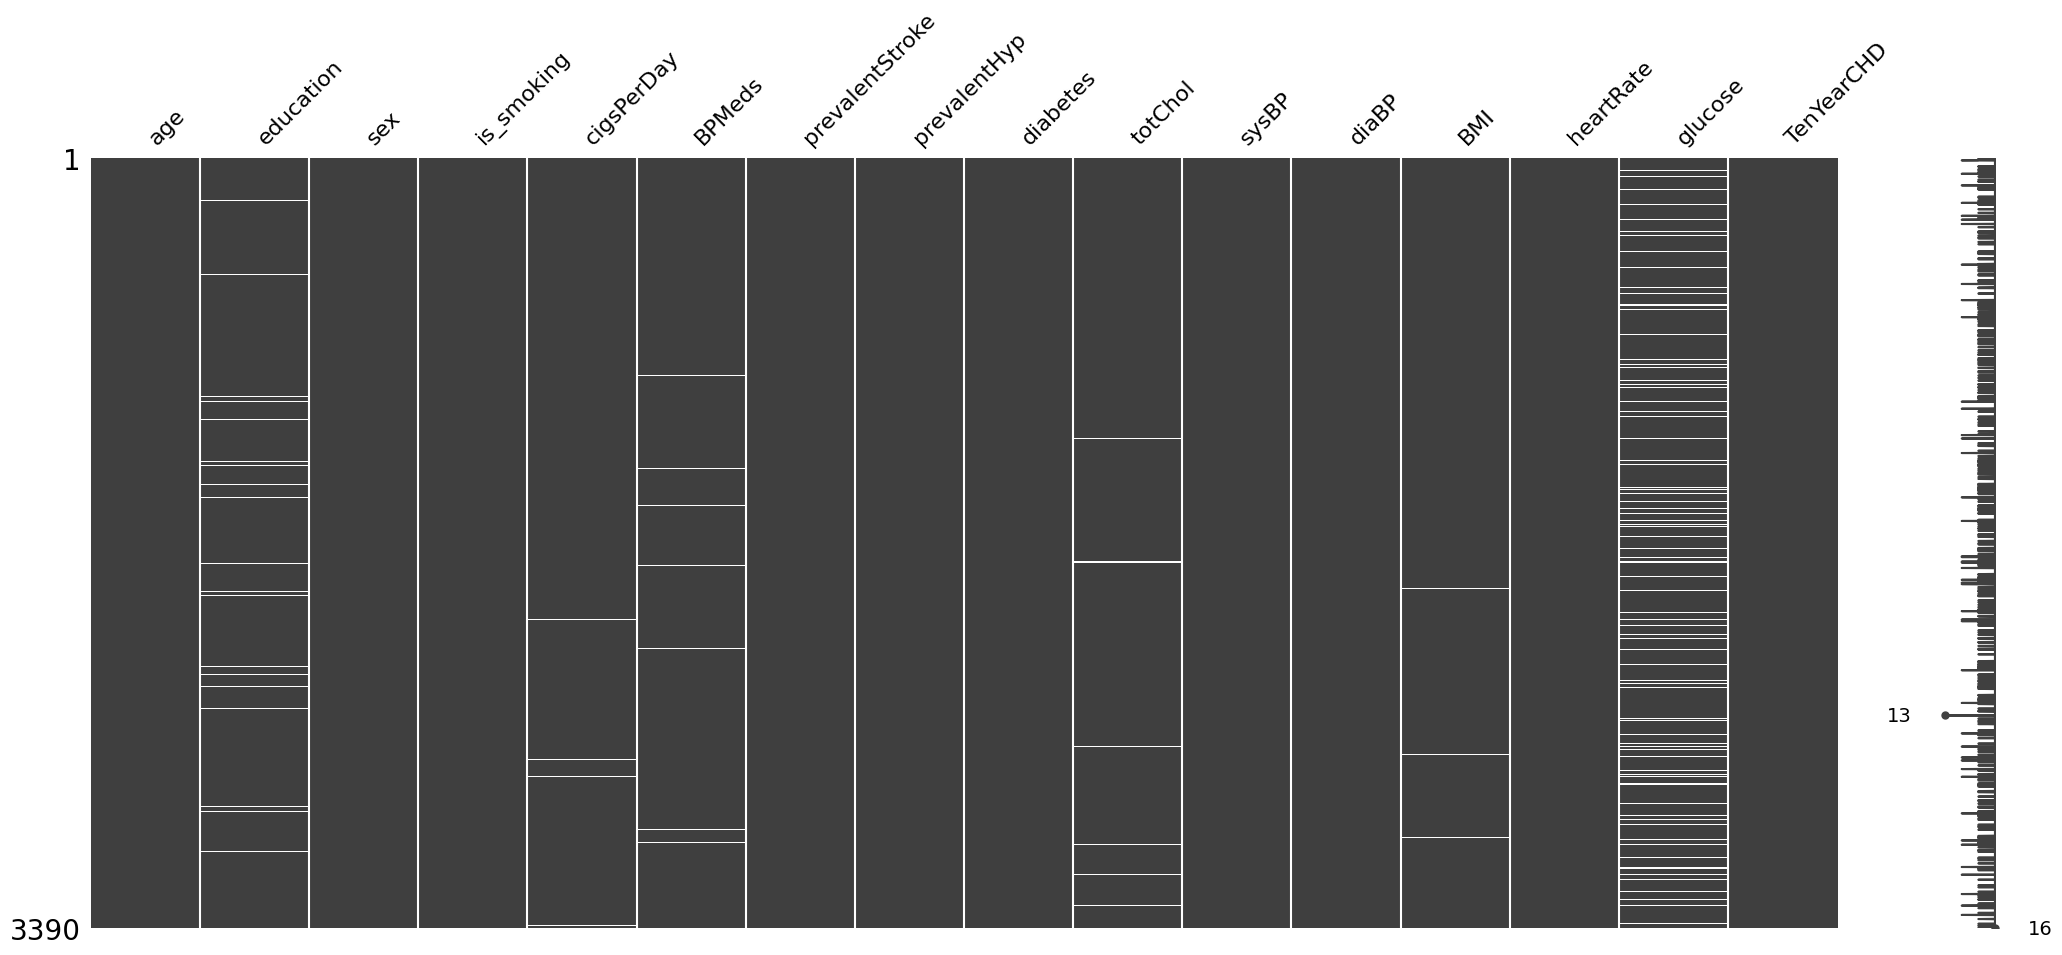

In [11]:
# Visualizing the missing values
import missingno as msno
import matplotlib.pyplot as plt


msno.matrix(df)
plt.show()

<Axes: >

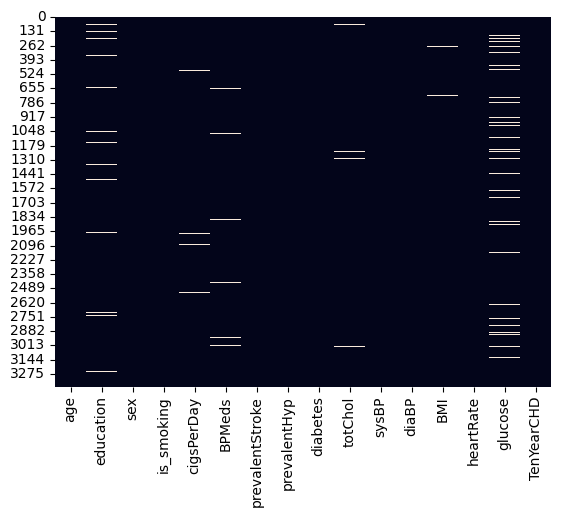

In [12]:
# Another way to do it by heatmap
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

There are 16 feature columns in total, with Ten Year CHD as the dependent variable column. There are 3390 observations (rows) in total.

The dataset contains no duplicate rows.

There are also blanks in the columns education, cigarettes per day, blood pressure medication, totalChol, BMI, heart rate, and glucose.

## ***2. Understanding Your Variables***

In [13]:
# dataset columns
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
# describe dataset
df.describe(include= 'all').round(2)

age  education   sex is_smoking  cigsPerDay   BPMeds  \
count   3390.00    3303.00  3390       3390     3368.00  3346.00   
unique      NaN        NaN     2          2         NaN      NaN   
top         NaN        NaN     F         NO         NaN      NaN   
freq        NaN        NaN  1923       1703         NaN      NaN   
mean      49.54       1.97   NaN        NaN        9.07     0.03   
std        8.59       1.02   NaN        NaN       11.88     0.17   
min       32.00       1.00   NaN        NaN        0.00     0.00   
25%       42.00       1.00   NaN        NaN        0.00     0.00   
50%       49.00       2.00   NaN        NaN        0.00     0.00   
75%       56.00       3.00   NaN        NaN       20.00     0.00   
max       70.00       4.00   NaN        NaN       70.00     1.00   

        prevalentStroke  prevalentHyp  diabetes  totChol    sysBP    diaBP  \
count           3390.00       3390.00   3390.00  3352.00  3390.00  3390.00   
unique              NaN           NaN       NaN      NaN      NaN      NaN   
top                 NaN           NaN       NaN      NaN      NaN      NaN   
freq                NaN           NaN       NaN      NaN      NaN      NaN   
mean               0.01          0.32      0.03   237.07   132.60    82.88   
std                0.08          0.46      0.16    45.25    22.29    12.02   
min                0.00          0.00      0.00   107.00    83.50    48.00   
25%                0.00          0.00      0.00   206.00   117.00    74.50   
50%                0.00          0.00      0.00   234.00   128.50    82.00   
75%                0.00          1.00      0.00   264.00   144.00    90.00   
max                1.00          1.00      1.00   696.00   295.00   142.50   

            BMI  heartRate  glucose  TenYearCHD  
count   3376.00    3389.00  3086.00     3390.00  
unique      NaN        NaN      NaN         NaN  
top         NaN        NaN      NaN         NaN  
freq        NaN        NaN      NaN         NaN  
mean      25.79      75.98    82.09        0.15  
std        4.12      11.97    24.24        0.36  
min       15.96      45.00    40.00        0.00  
25%       23.02      68.00    71.00        0.00  
50%       25.38      75.00    78.00        0.00  
75%       28.04      83.00    87.00        0.00  
max       56.80     143.00   394.00        1.00

### Variables Description

**Demographic:**
* Male or female ("M" or "F")
* Age: The patient's age (Continuous - Although the reported ages have been shortened to whole numbers, the idea of age is continuous)
* Education: The patient's degree of education (categorical values - 1,2,3,4)

**Behavioural:**
* is_smoking: if the patient now smokes ("YES" or "NO").
* Cigs Per Day: the average number of cigarettes smoked by the person in one day.(Can be termed continuous since any number of cigarettes, even half a cigarette, can be consumed.)

**Medical (History):**
* BP Medications: whether the patient was using blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient has experienced a stroke in the past (Nominal)
* Prevalent Hyp: whether the patient was hypertensive (Nominal) or not.
* Diabetes: whether the patient had diabetes or not (Nominal)

**Medical (Current):**
* Tot Chol: continuous total cholesterol level
* Sys BP: continuous systolic blood pressure * Dia BP: continuous diastolic blood pressure
* BMI (Continuous): Body Mass Index
* Heart Rate: heart rate (Continuous - In medical study, variables such as heart rate are considered continuous despite the fact that they are discrete due to the enormous number of potential values.)
* Glucose: continuous glucose level

**Predict Variable (desired target):**
* The risk of coronary heart disease over a 10-year period CHD (binary: "1" = "Yes", "0" = "No")

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable using a dictionary
unique_counts = {col: len(df[col].unique()) for col in df.columns}

# Print the results
for col, count in unique_counts.items():
    print("No. of unique values in", col, "is", count)

No. of unique values in age is 39
No. of unique values in education is 5
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 33
No. of unique values in BPMeds is 3
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 241
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1260
No. of unique values in heartRate is 69
No. of unique values in glucose is 133
No. of unique values in TenYearCHD is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# create a copy of your datasets before doing any data wrangling
df2 = df.copy()

In [17]:
# Renaming the columns
df2.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [18]:
# Assuming 'df2' is your DataFrame
dependent_var = ['ten_year_chd']

categorical_var = [col for col in df2.columns if df2[col].nunique() <= 4]
continuous_var = [col for col in df2.columns if col not in categorical_var]

# Print the results
print("Dependent Variable:", dependent_var)
print("Categorical Variables:", categorical_var)
print("Continuous Variables:", continuous_var)

Dependent Variable: ['ten_year_chd']
Categorical Variables: ['education', 'sex', 'is_smoking', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'ten_year_chd']
Continuous Variables: ['age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']


### What all manipulations have you done and insights you found?

All of the column names have been changed for simplicity of usage.

We've also defined continuous variables, dependent variables, and categorical variables to make graphing easier.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

0    2879
1     511
Name: ten_year_chd, dtype: int64
 


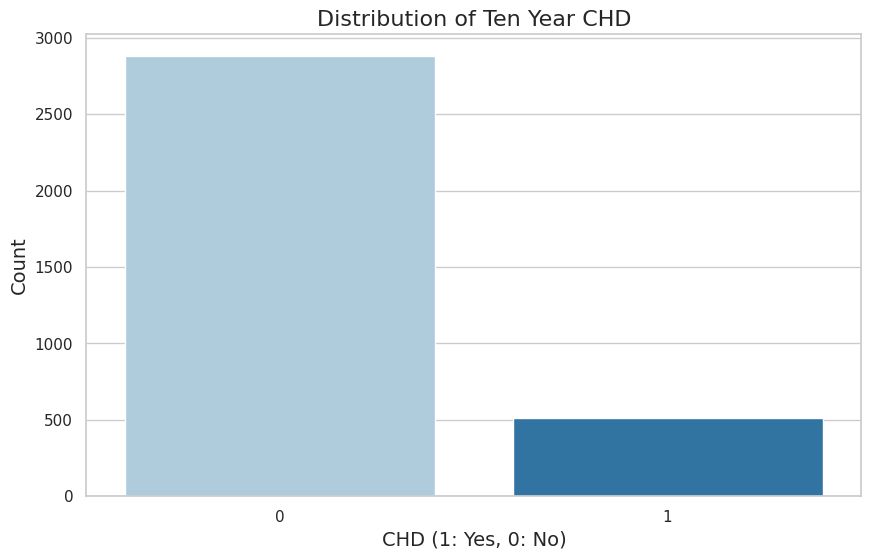

In [19]:

# Dependant Column Value Counts
print(df2['ten_year_chd'].value_counts())
print(" ")

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting data on chart
plt.figure(figsize=(10, 6))
sns.countplot(x='ten_year_chd', data=df2, palette="Paired")
plt.title('Distribution of Ten Year CHD', fontsize=16)
plt.xlabel('CHD (1: Yes, 0: No)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Displaying the chart
plt.show()


##### 1. Why did you pick the specific chart?

Count plots directly show the frequency or count of each category in the categorical variable. This is useful for understanding the balance or imbalance in the distribution.

##### 2. What is/are the insight(s) found from the chart?

According to the following figure 511 out of 3390, are categorized as positive for 10 year CHD, while the remaining 2879 out of 3390, are classed as negative for 10 year CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

According to the graphic, 511 of the population has a positive 10-year CHD classification, whereas 2879 have a negative classification. This data can assist healthcare firms in developing focused initiatives. The data has no precise insights that imply negative growth, but failing to address high CHD incidence may have severe consequences for public health and healthcare enterprises.

#### Chart - 2

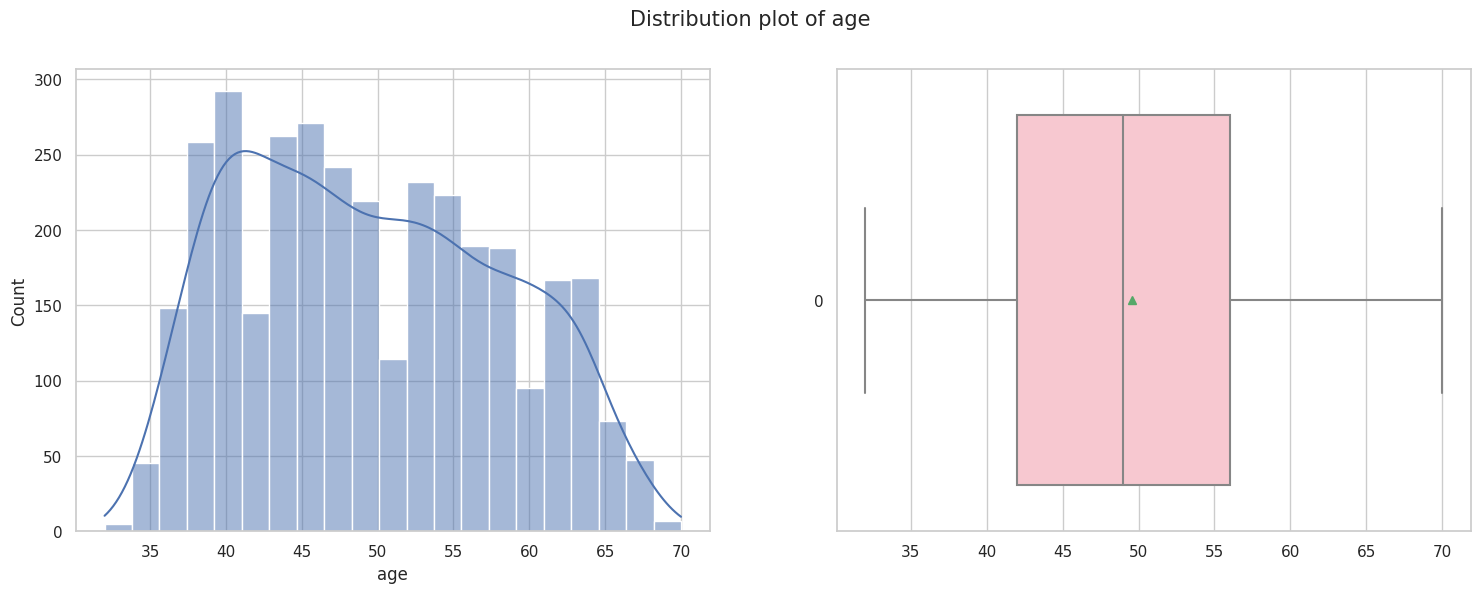

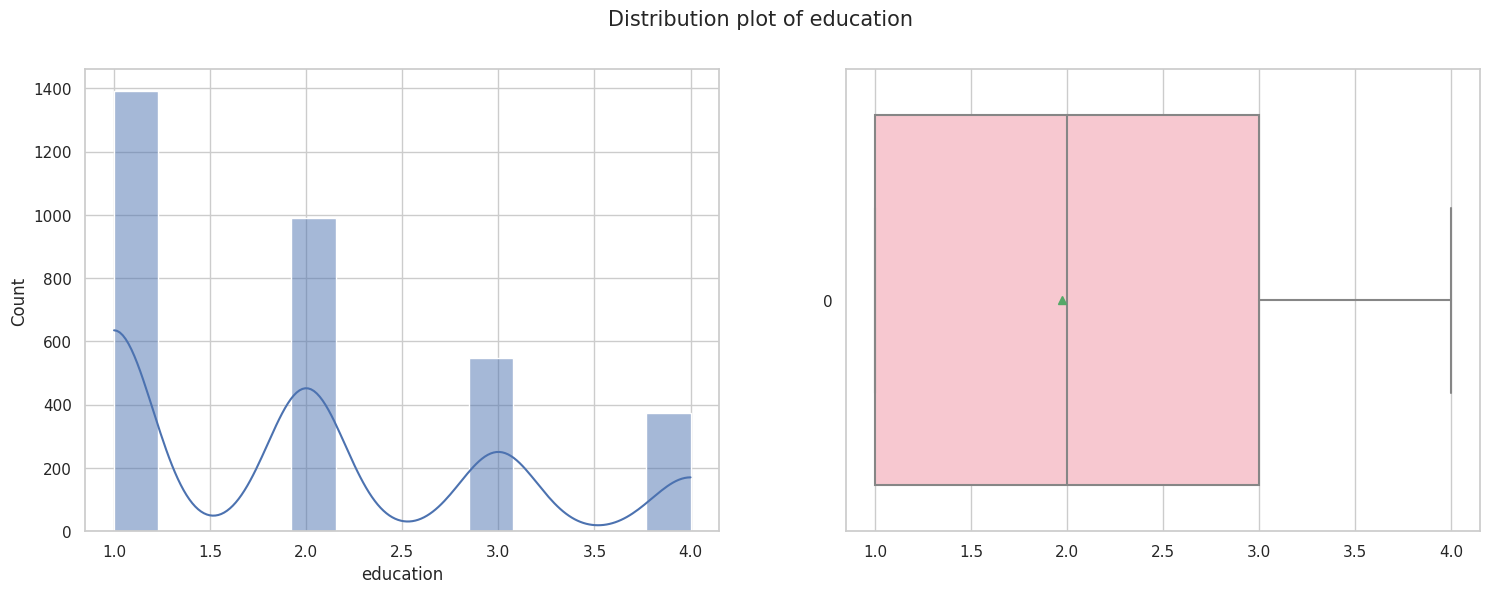

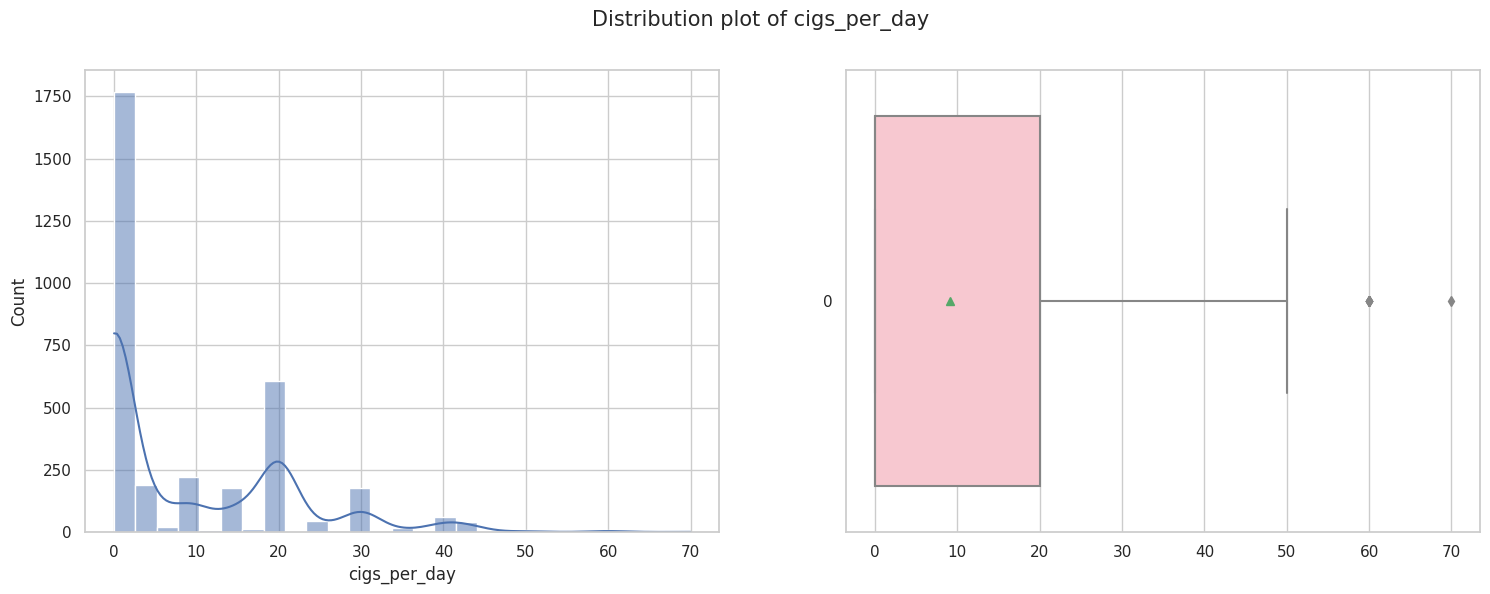

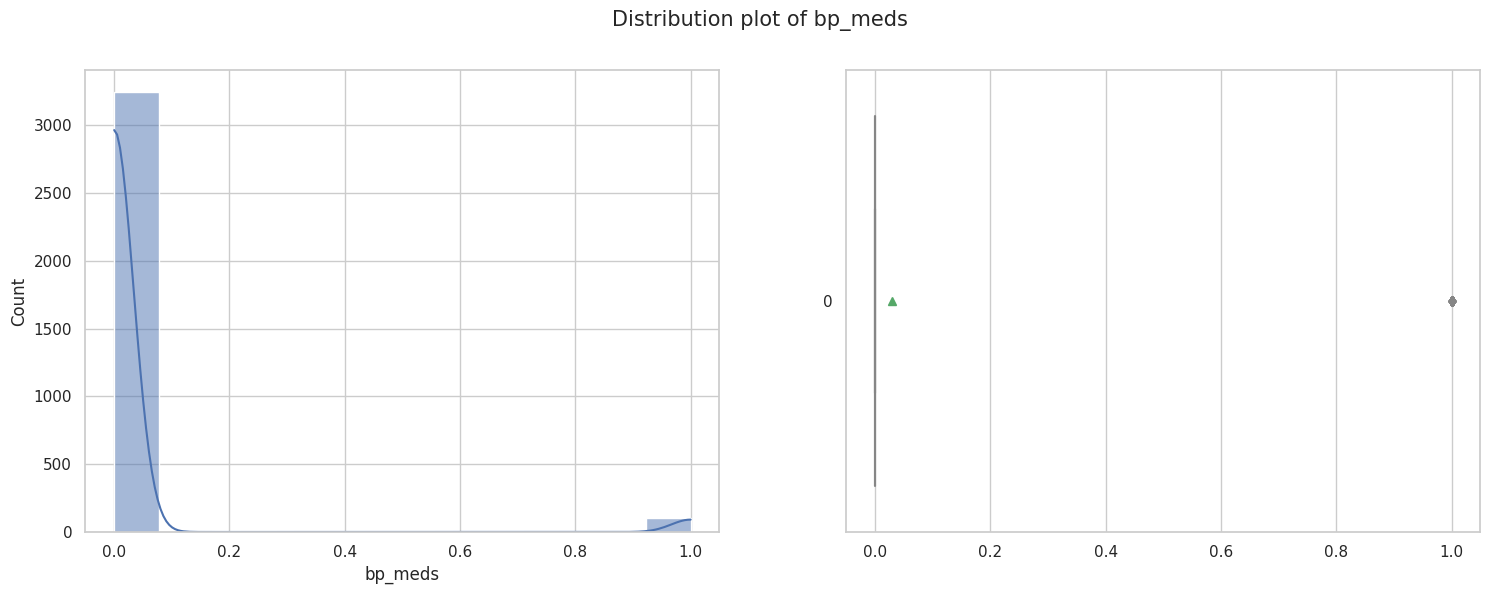

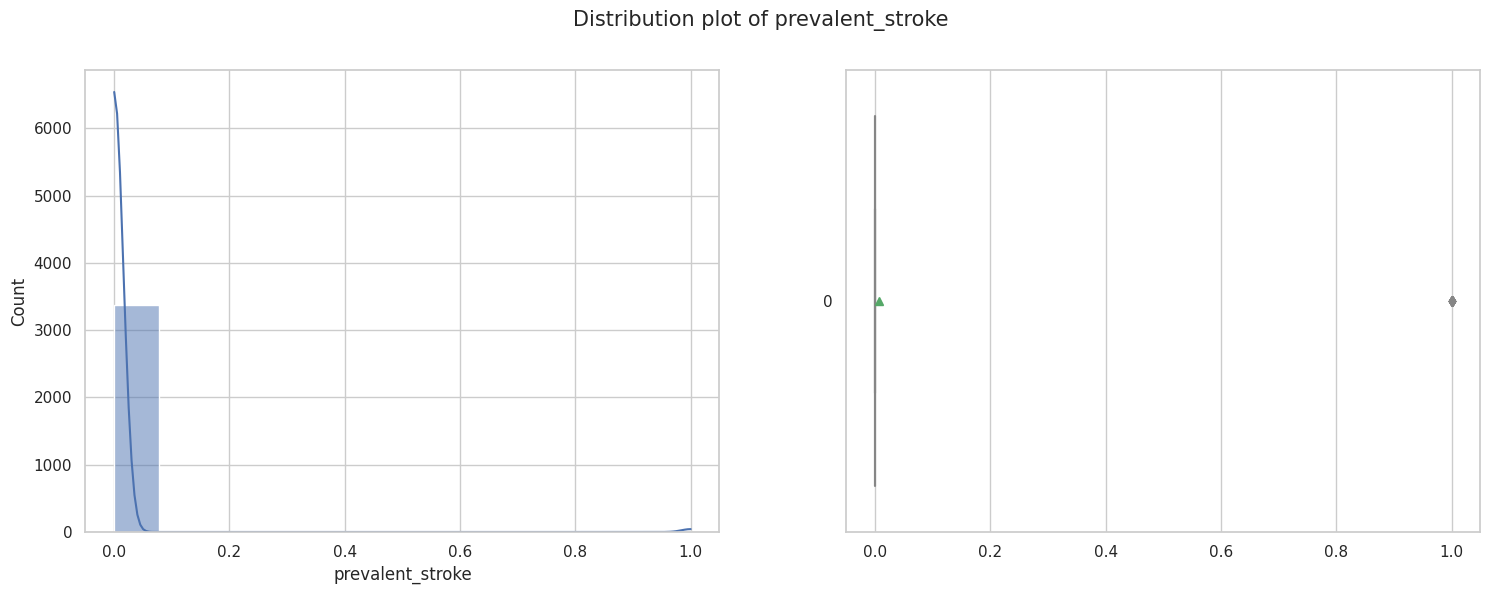

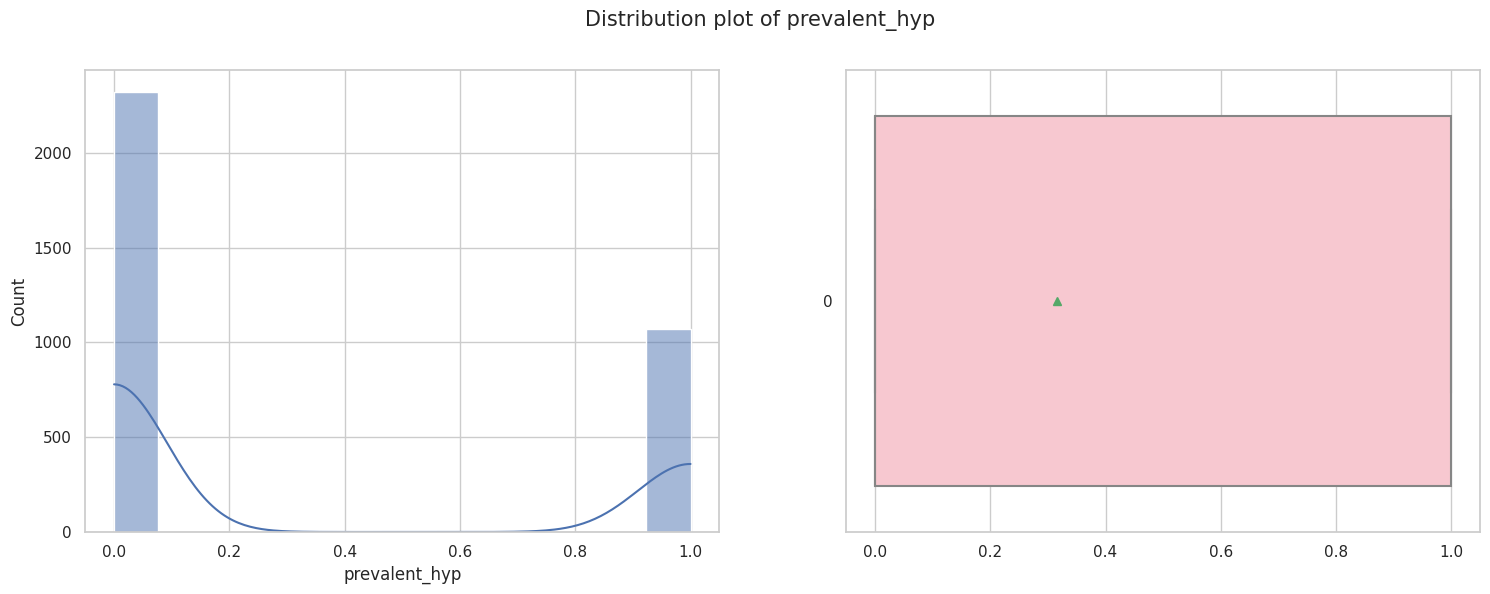

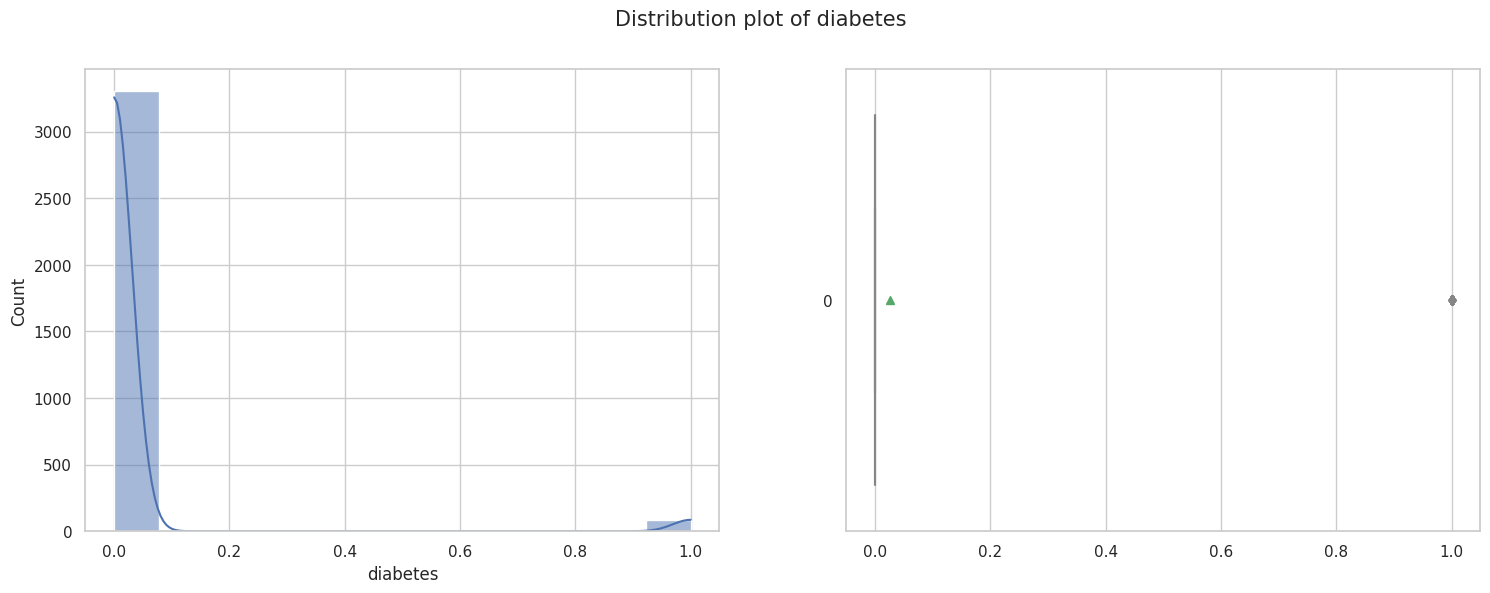

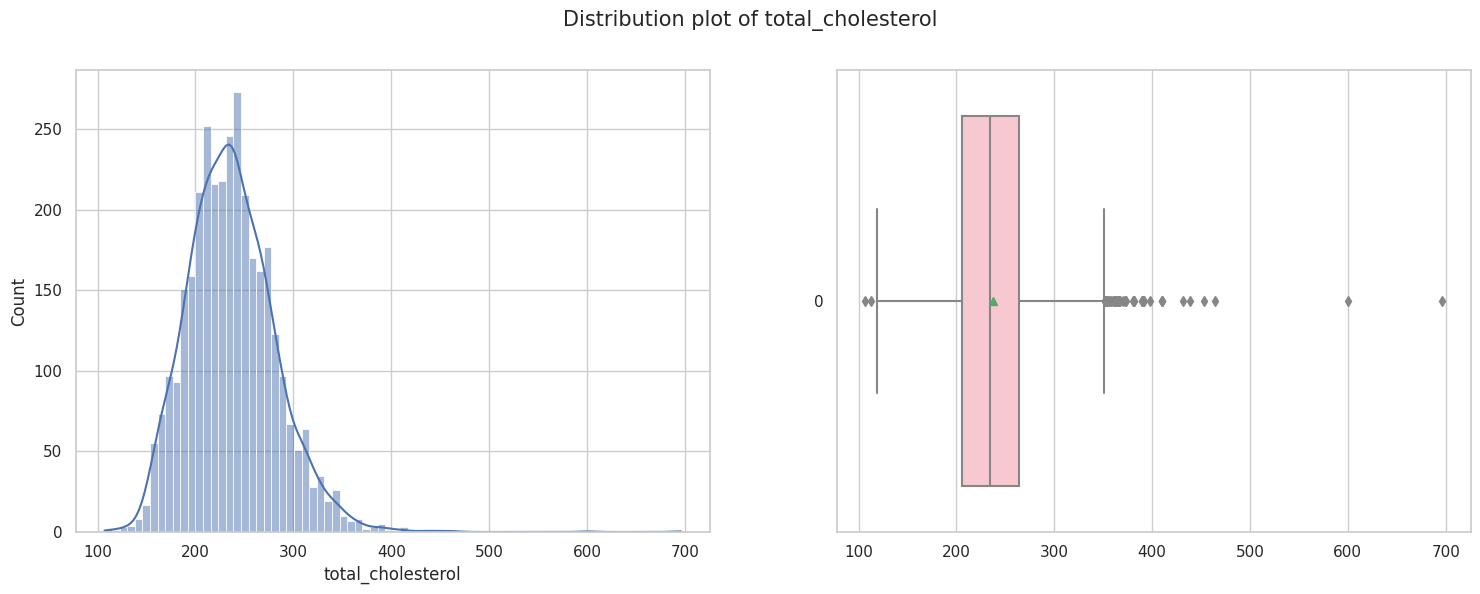

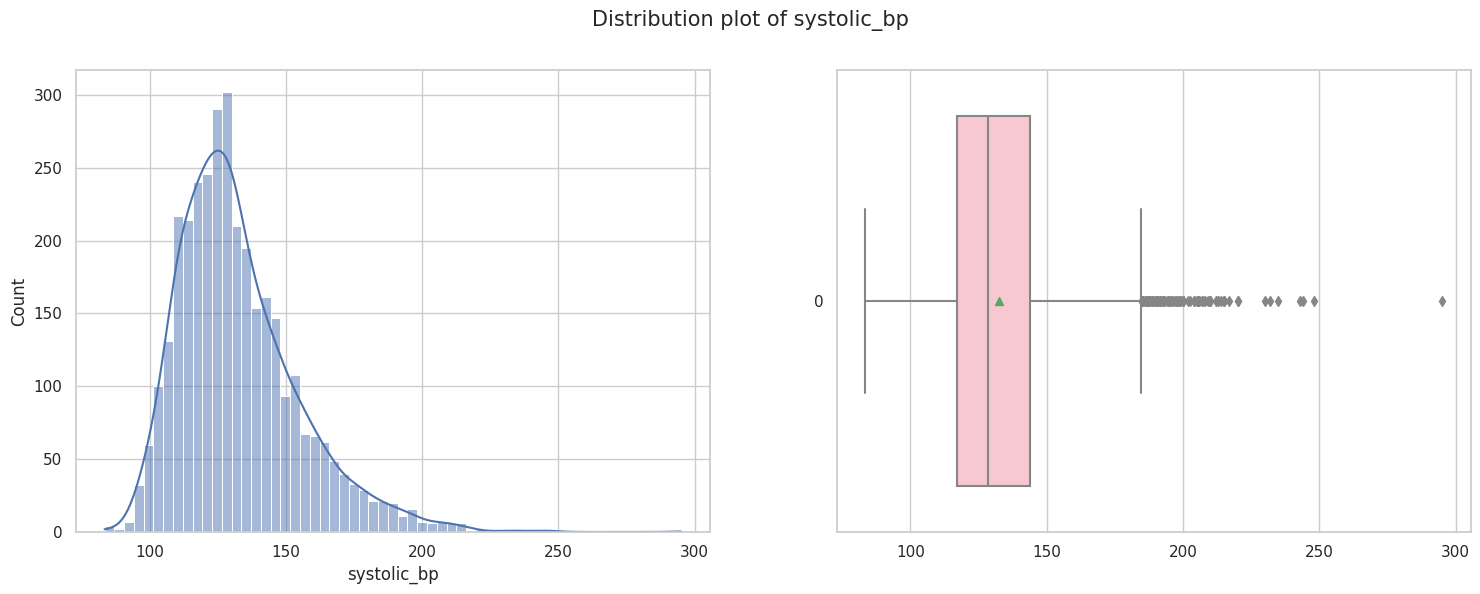

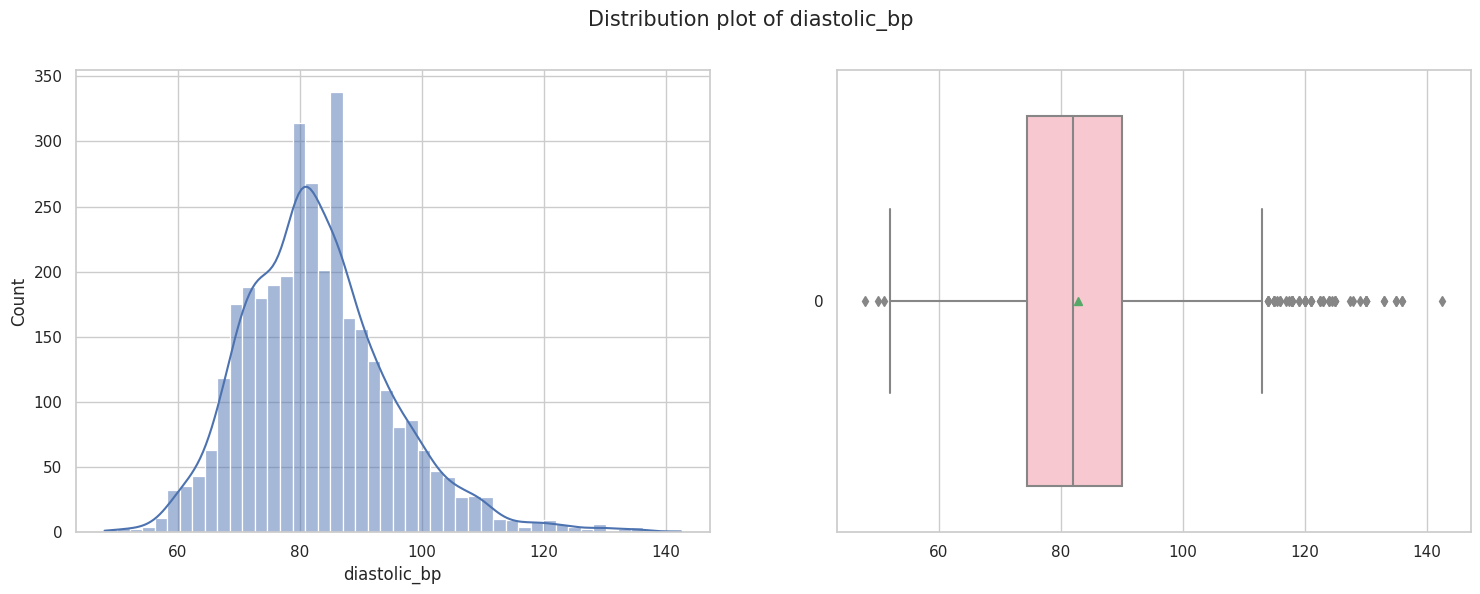

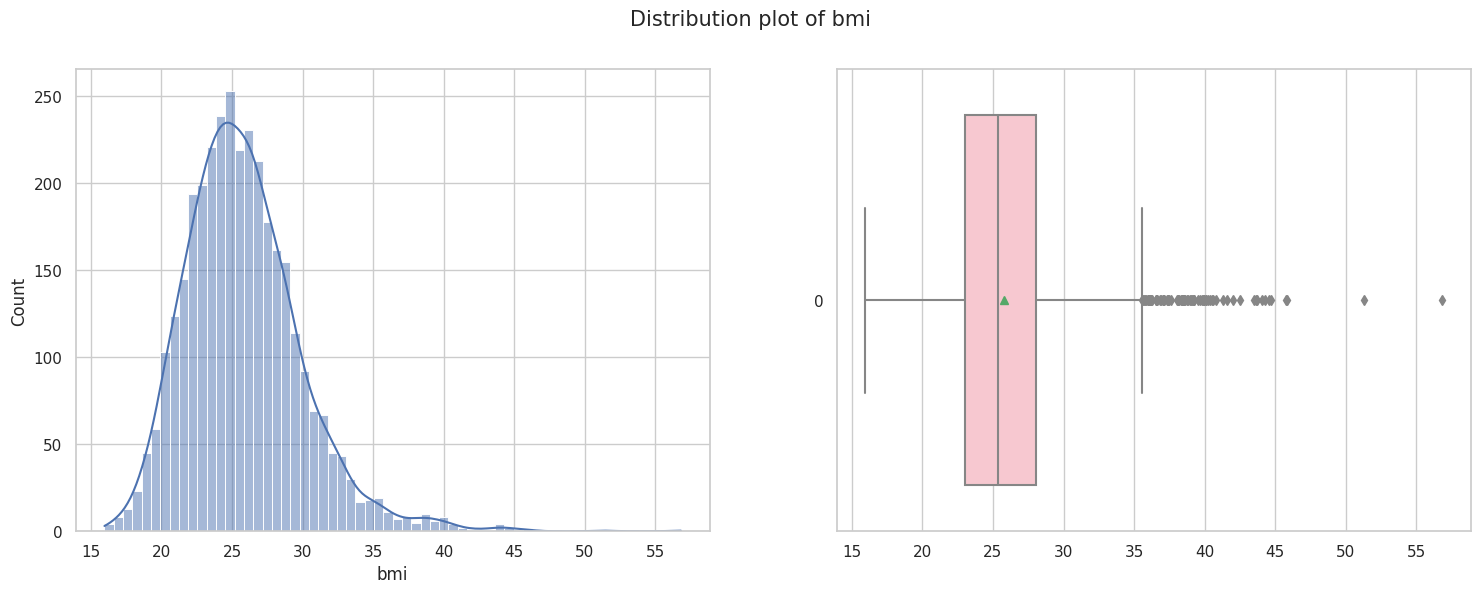

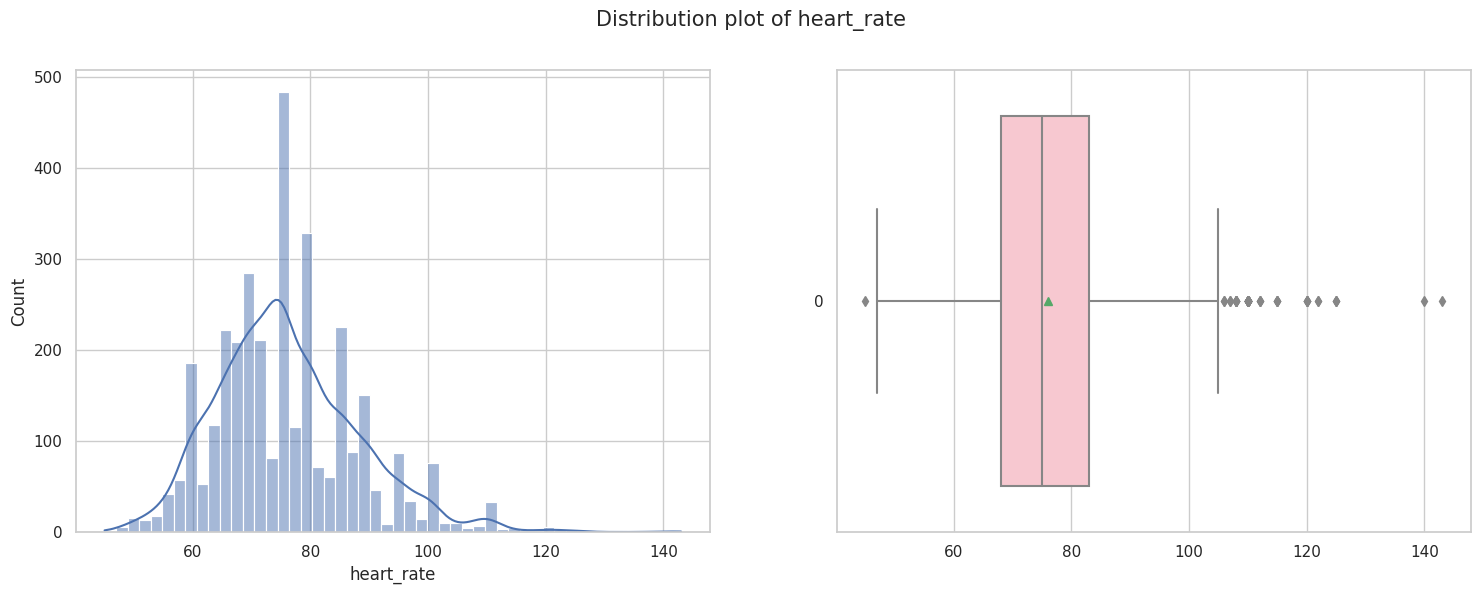

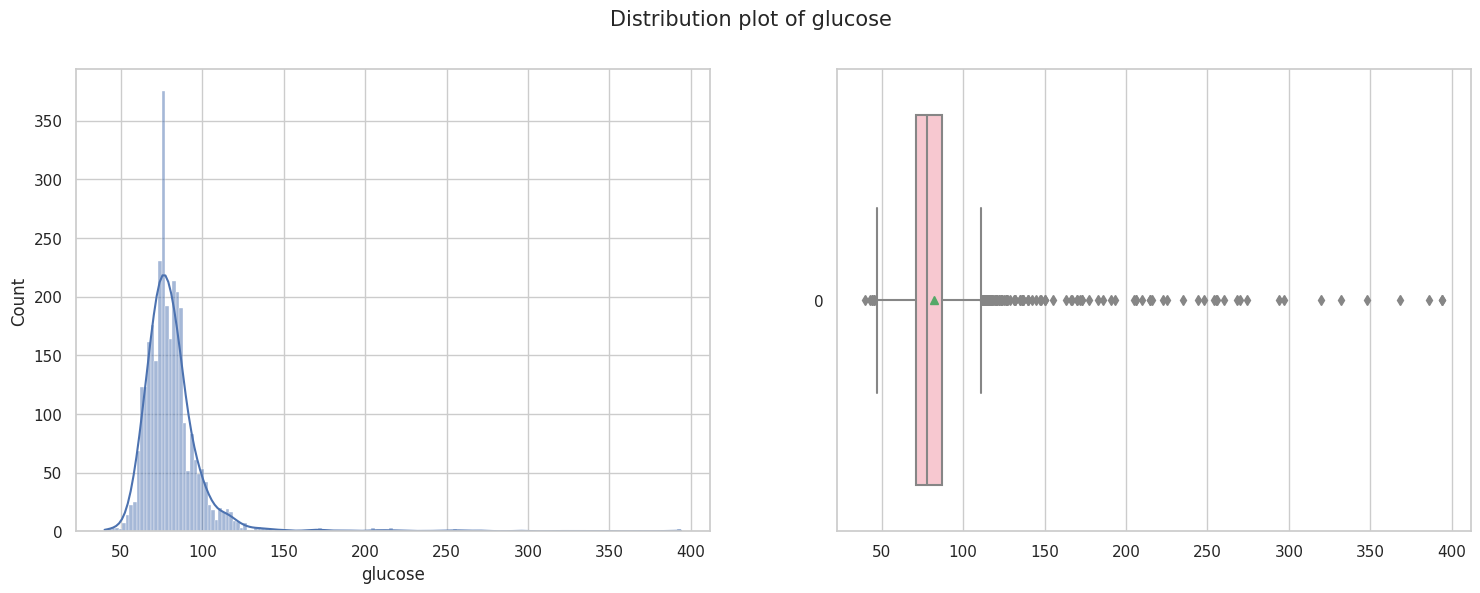

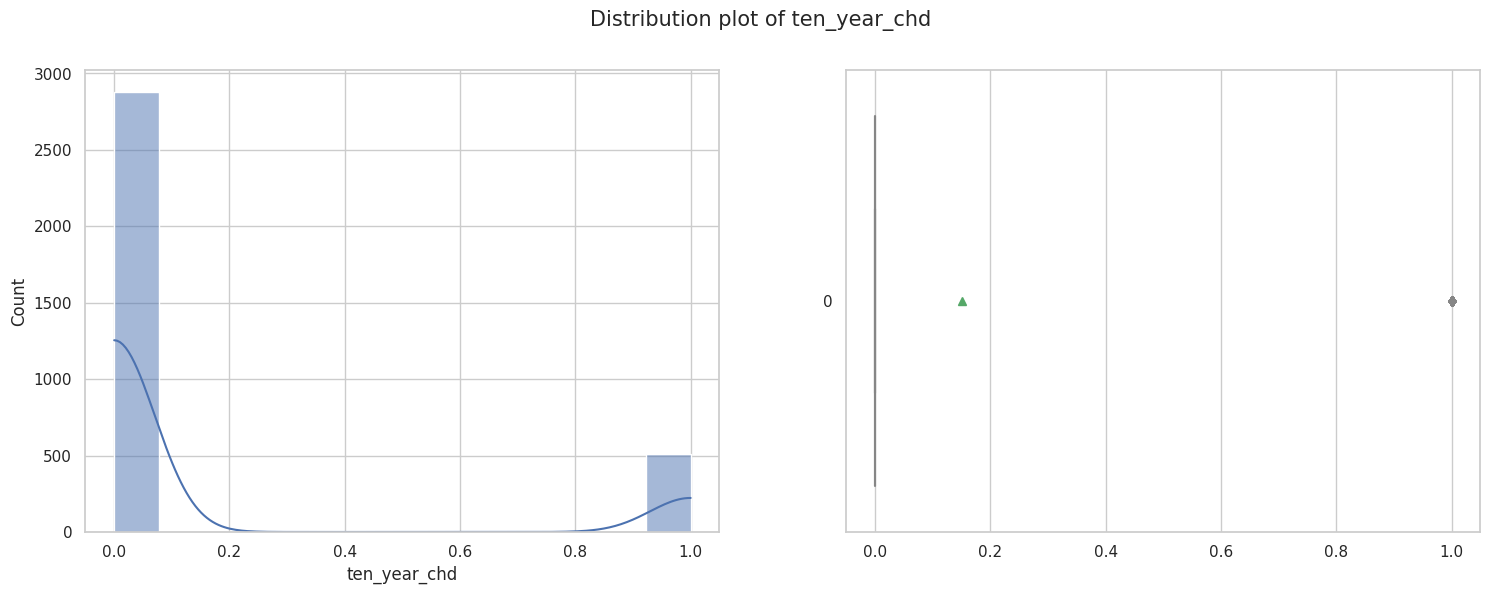

In [20]:
# visualize the code of histogram plot and boxplot for each columns to know the data distribution
for col in df2.describe().columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    sns.histplot(df2[col], ax=axes[0], kde=True)
    sns.boxplot(df2[col], ax=axes[1], orient='h', showmeans=True, color='pink')
    fig.suptitle("Distribution plot of " + col, fontsize=15)
    plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a sort of graphic that depicts a dataset's distribution. It is a graphical representation of data that indicates how frequently each value or set of values occurs. Histplots are excellent for studying a dataset's distribution and spotting patterns or trends. It is especially beneficial when working with huge data sets (more than 100 observations). It can aid in the detection of uncommon observations (outliers) or gaps in the data.

As a result, I utilized the histogram plot to determine if the variable distributions were symmetric or not over the whole dataset.

A boxplot is a single plot that summarizes the major statistical properties of a dataset, such as the median, quartiles, and range. Boxplots are useful for detecting outliers in a dataset, comparing the distribution of several datasets, and analyzing data dispersion. They are frequently used in statistics and data visualization.

As a result, for each numerical variable in the supplied dataset, I utilized a box plot to examine outliers and interquartile range values such as mean, median, maximum, and minimum.

##### 2. What is/are the insight(s) found from the chart?

We can observe from the distribution that most of the columns are normally distributed, some are skewed, and others are categorical.
We can see certain outliers in the box plot, which we will deal with later before developing the model.

##### 3. Will the gained insights help cresting a positive business impact?

Are there any insights that lead to negative growth? justigy with specific reason.

Histograms and Box plots cannot provide us with complete data information. It's just done to observe the distribution of column data across the dataset and outliers in the boxplot for the various continuous columns.

#### Chart - 3

<Figure size 1000x500 with 0 Axes>

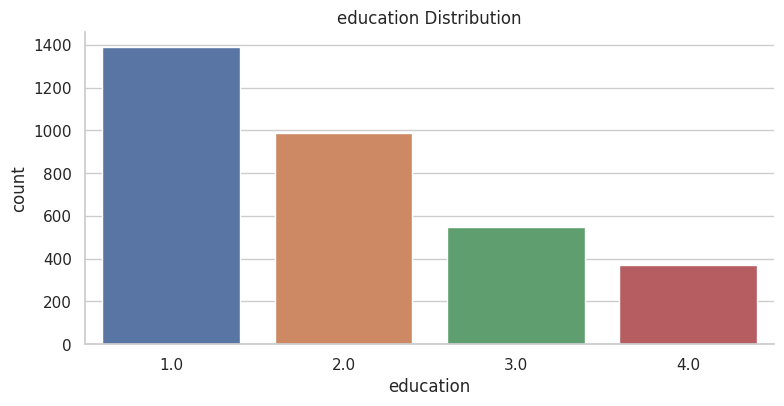

<Figure size 1000x500 with 0 Axes>

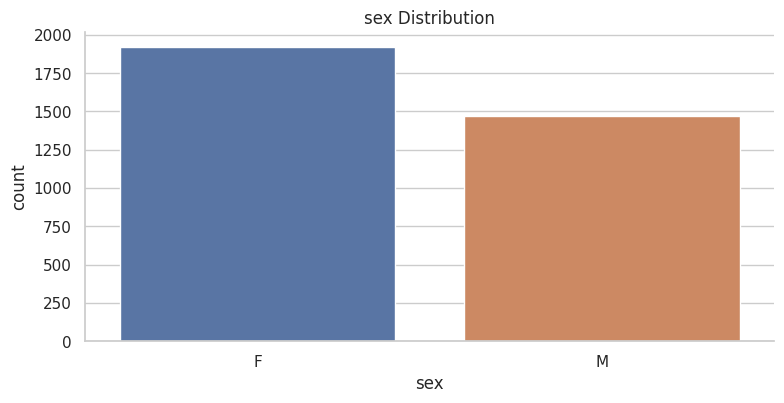

<Figure size 1000x500 with 0 Axes>

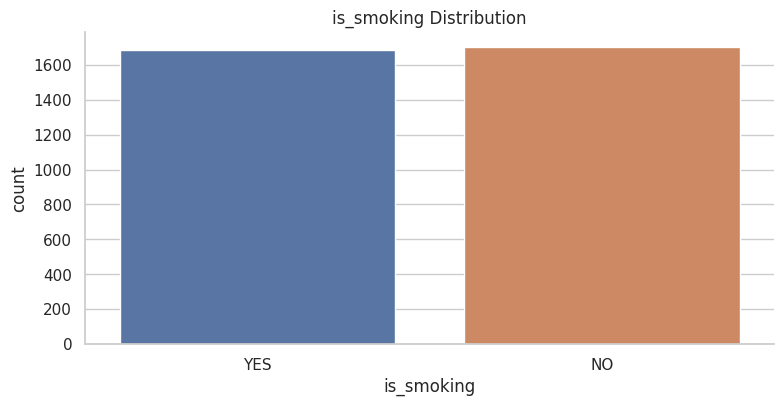

<Figure size 1000x500 with 0 Axes>

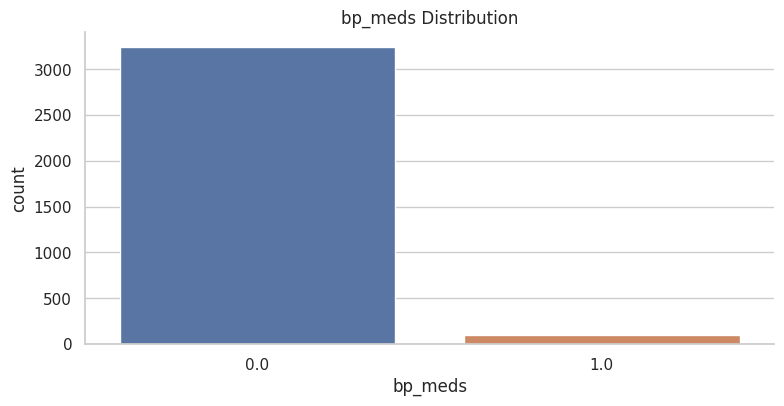

<Figure size 1000x500 with 0 Axes>

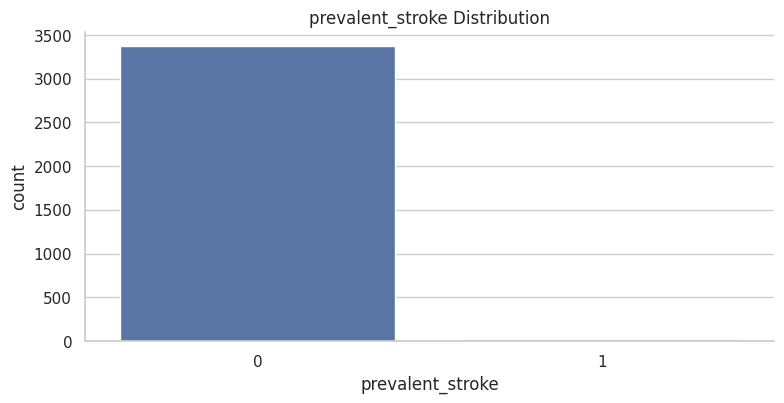

<Figure size 1000x500 with 0 Axes>

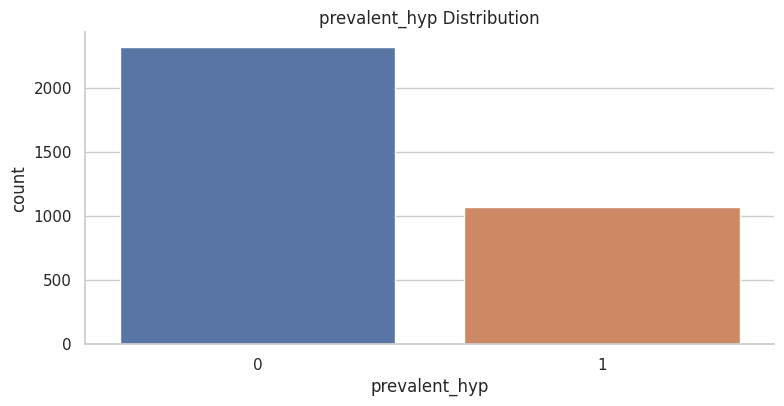

<Figure size 1000x500 with 0 Axes>

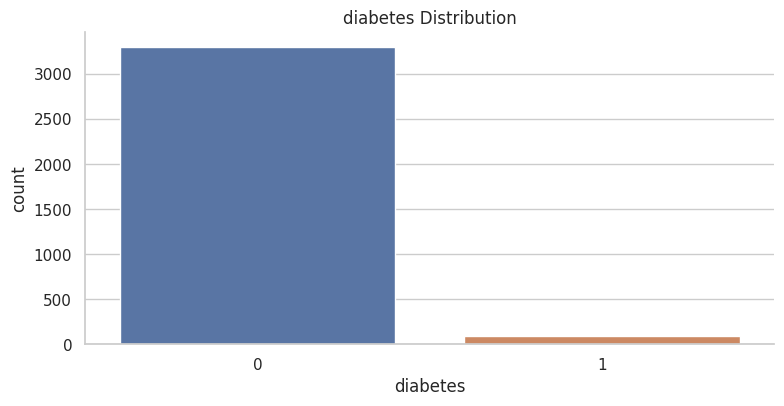

<Figure size 1000x500 with 0 Axes>

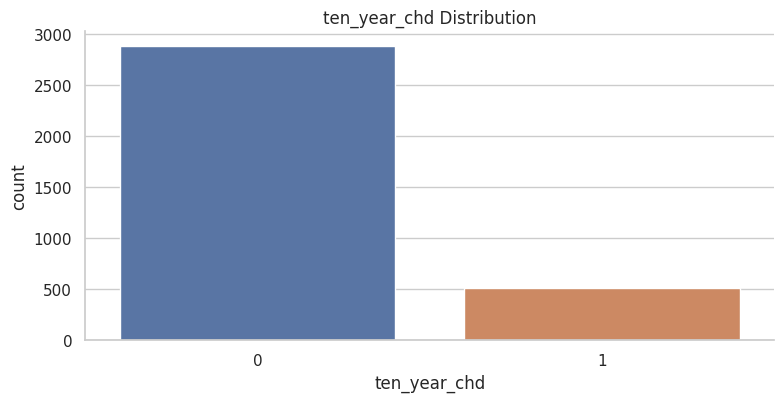

In [21]:
sns.set(style="whitegrid")

# Plotting the distribution of categorical variables using catplot
for i in categorical_var:
    plt.figure(figsize=(10, 5))
    sns.catplot(x=i, kind="count", data=df2, height=4, aspect=2)
    plt.title(f"{i} Distribution")
    plt.show()

#### 1. Why did you pick the specific chart?

The size or frequency of different categories or groupings of data are compared using bar charts. Bar charts are excellent for comparing data across categories and for displaying a vast quantity of data in a compact space.


#### 2. What is/are the insight(s) found from the chart?





The distribution of different categories may be observed in the categorized columns. The education column ranks first, followed by the second, third, and fourth categories.

The gender distribution is not even, with a large number of females. The is_smoking column is balanced. Bp_meds, prevalent_stroke, prevalent_hyp, and diabetes are all out of balance, with relatively few positive examples.



#### 3. Will the gained insights help creating a positive business impact?

#### Are there any insights that lead to negative growth? Justify with specific reason.

The chart's insights have the ability to have a positive business impact by giving useful information for decision-making. Understanding the distribution of categories in different columns aids in the identification of patterns and the targeting of certain demographics or areas of attention. Businesses, for example, can create gender-specific marketing campaigns or instructional programs based on the target audience's educational levels. Recognizing the unequal distribution of health issues may also help firms design unique treatments or preventative measures to meet individual demands.

It is crucial to highlight, however, that the graphic does not offer a clear picture of the business effect. The actual impact would be determined by how effectively these insights are implemented in corporate strategy and activities. Market demand, competition, and the success of adopted initiatives are all factors that will influence total business growth. As a result, while the discovered insights have the potential to have a beneficial business impact, actual realization would need more study and strategic execution.

#### Chart - 4

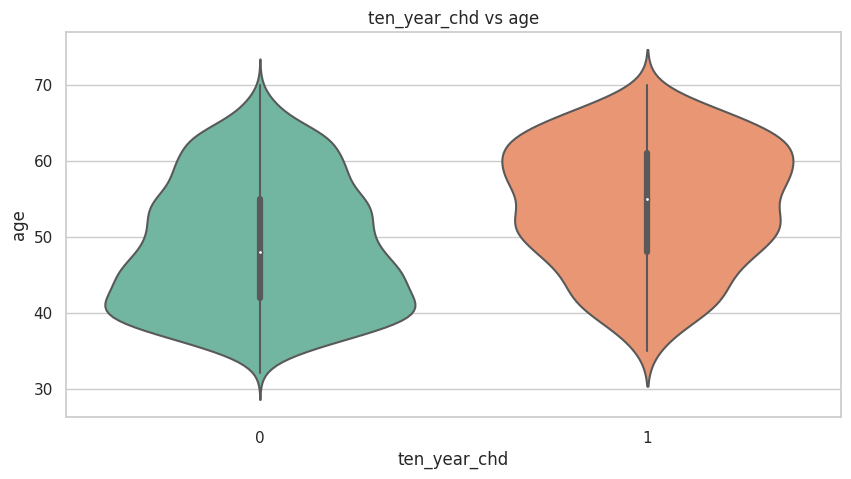

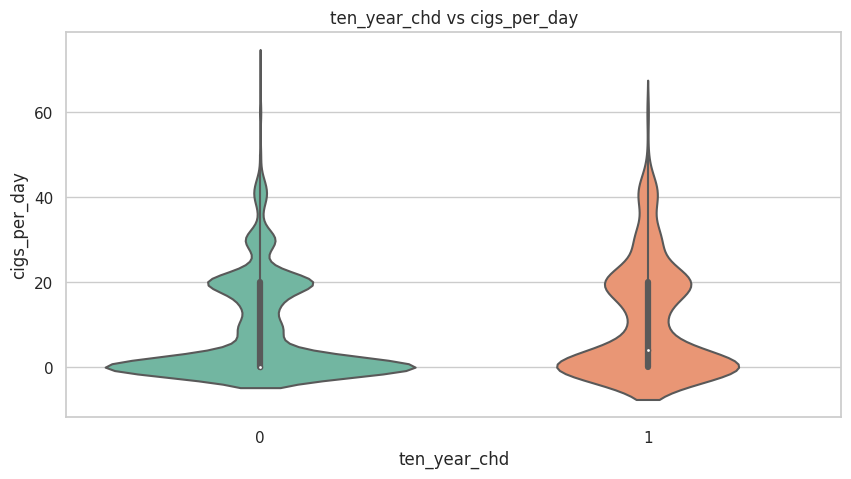

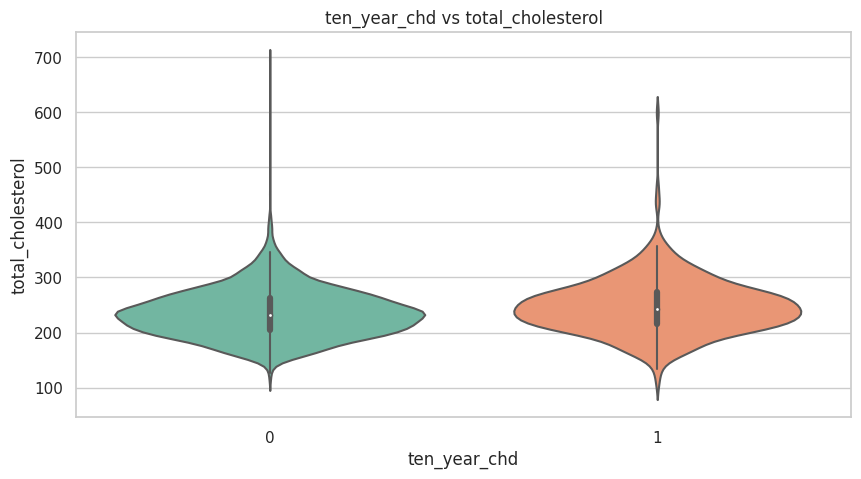

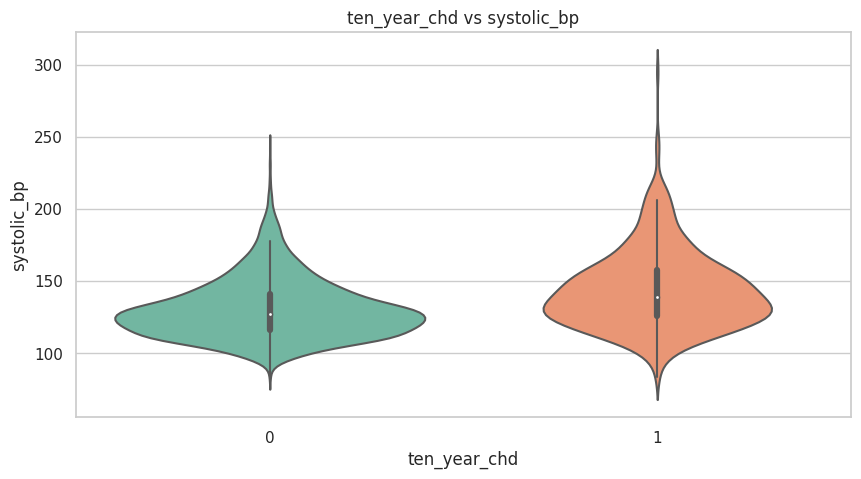

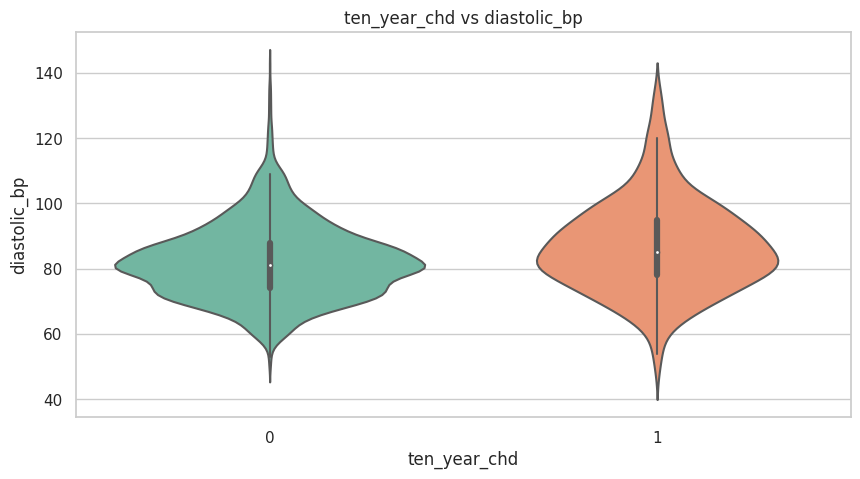

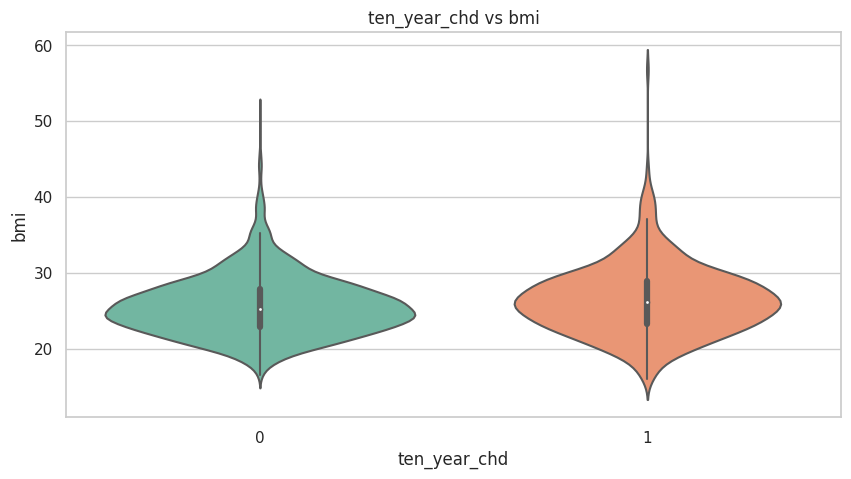

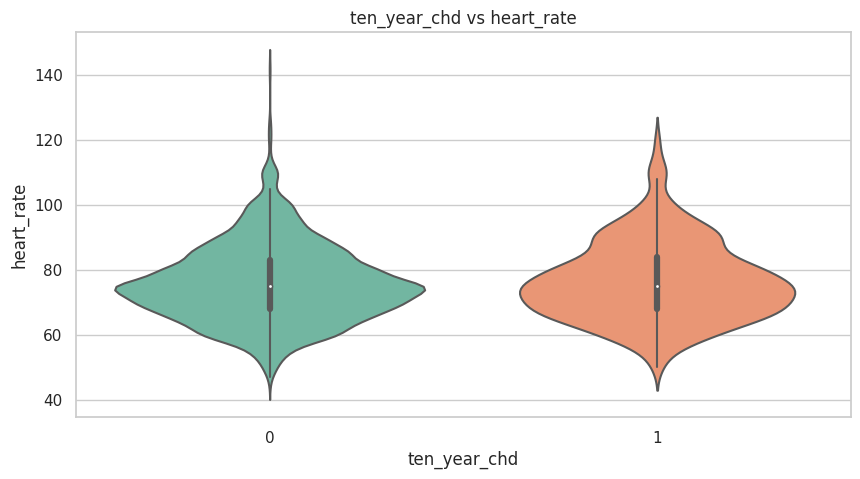

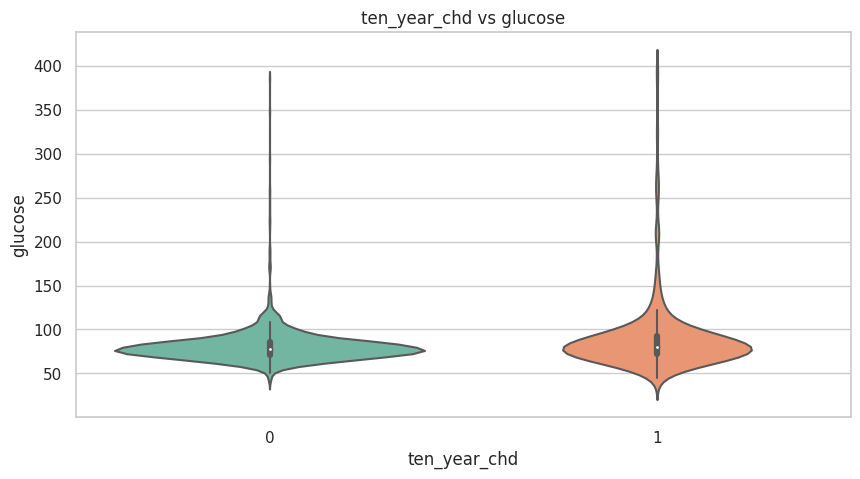

In [22]:
# Assuming 'df2' is your DataFrame
sns.set(style="whitegrid")

# Plotting the relationship between dependent variable and continuous independent variables using violinplot
for i in continuous_var:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=dependent_var[0], y=i, data=df2, palette="Set2")
    plt.ylabel(i)
    plt.xlabel(dependent_var[0])
    plt.title(f"{dependent_var[0]} vs {i}")
    plt.show()


##### 1. Why did you pick the specific chart?


The violin chart serves as a data visualization that amalgamates elements from both a box plot and a kernel density plot. Its primary purpose is to illustrate the distribution and density of data within various categories or groups. Key characteristics of the violin chart encompass:

Shape and width: The shape of the violin mirrors the data distribution, typically presenting a symmetrical form. The width of the violin at different points conveys the data density.

Quartiles and median: The central "box" within the violin chart signifies the interquartile range (IQR) and encompasses the median value. This aspect offers insights into both the spread and central tendency of the data.

Grouping and comparison: Violin charts can be grouped or arranged side by side, facilitating the comparison of distributions across different categories or groups. This arrangement allows for visual assessments of data distribution shapes, spreads, and densities.

##### 2. What is/are the insight(s) found from the chart?

In the age versus ten_year_chd comparison, there is a higher density of positive cases at older ages compared to younger ages, suggesting a higher prevalence of positive cases in older individuals.

Regarding cigs_per_day, non-smokers exhibit a greater density of negative cases compared to positive cases among non-smokers.

In the analysis of ten_year_chd and glucose, the negative cases demonstrate a higher density than positive cases for the same glucose value.

The remaining charts offer limited informative insights.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The information extracted from the violin chart has the potential to positively influence business decisions by offering valuable insights. Analyzing the distribution and density of data across diverse categories enables businesses to discern patterns, trends, and potential areas of emphasis. For instance, recognizing a higher prevalence of ten-year CHD cases in older individuals suggests a need for targeted preventive measures or specialized treatments for this demographic. Similarly, insights into the correlation between smoking and negative CHD cases can inform the development of smoking cessation programs or campaigns aimed at reducing CHD risk.

Although the insights from the chart hold value, it's crucial to acknowledge that their impact on business growth depends on various factors. Realizing the actual business impact necessitates further analysis and the strategic implementation of these insights. Moreover, without specific business context and objectives, it remains challenging to ascertain whether any insights directly lead to negative growth. Nevertheless, leveraging these insights to gain a deeper understanding of health conditions and risk factors' distribution can potentially empower healthcare businesses to formulate more effective strategies and interventions, ultimately improving patient outcomes and fostering positive growth.








#### Chart - 5

<Figure size 1000x500 with 0 Axes>

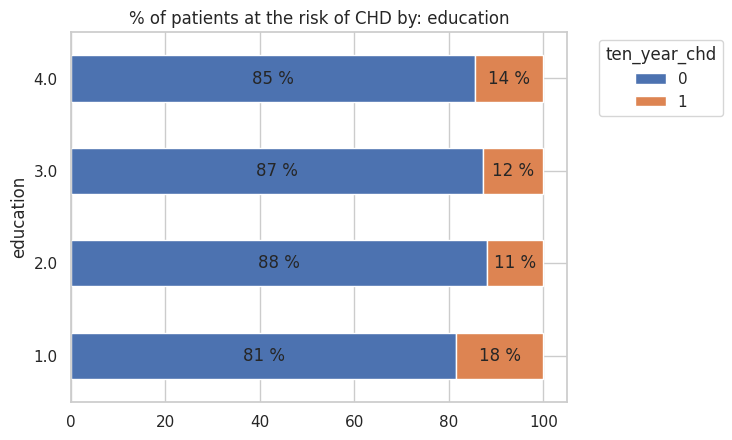

<Figure size 1000x500 with 0 Axes>

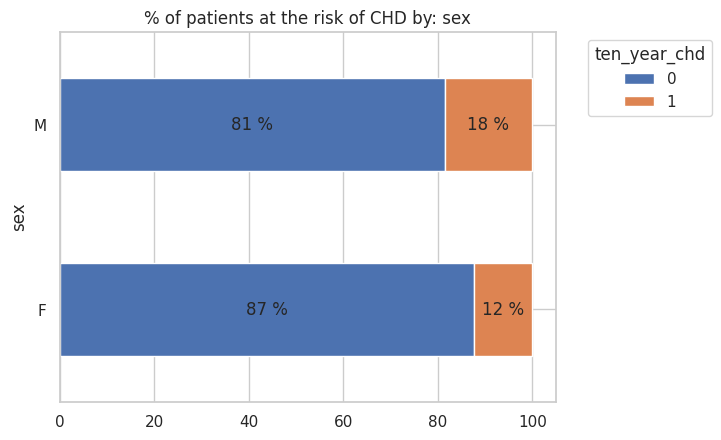

<Figure size 1000x500 with 0 Axes>

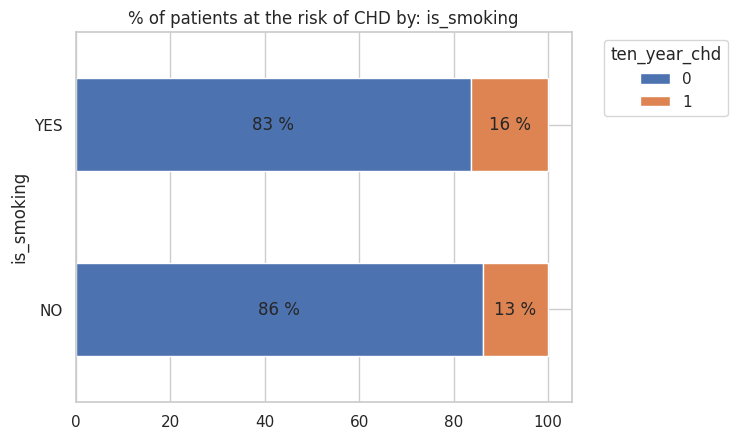

<Figure size 1000x500 with 0 Axes>

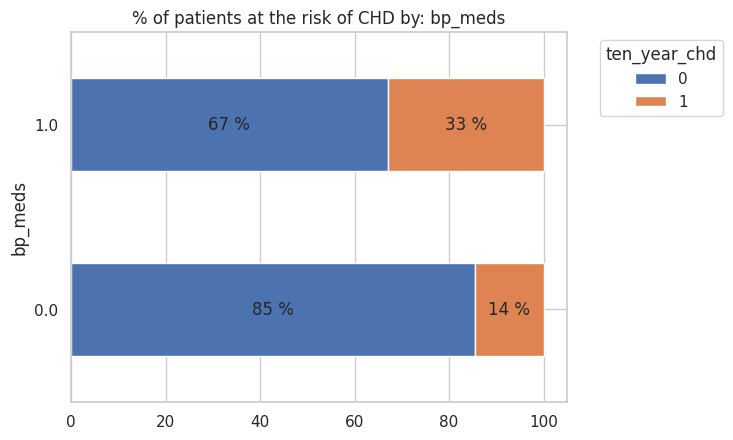

<Figure size 1000x500 with 0 Axes>

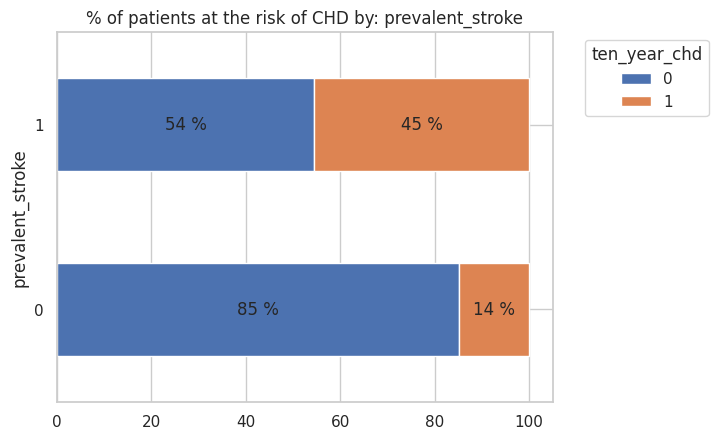

<Figure size 1000x500 with 0 Axes>

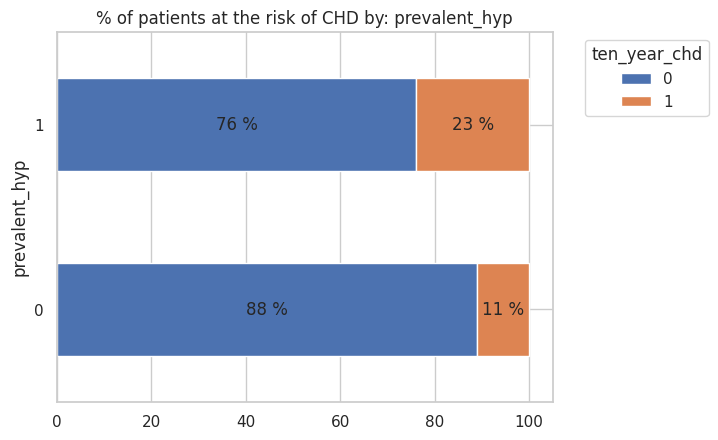

<Figure size 1000x500 with 0 Axes>

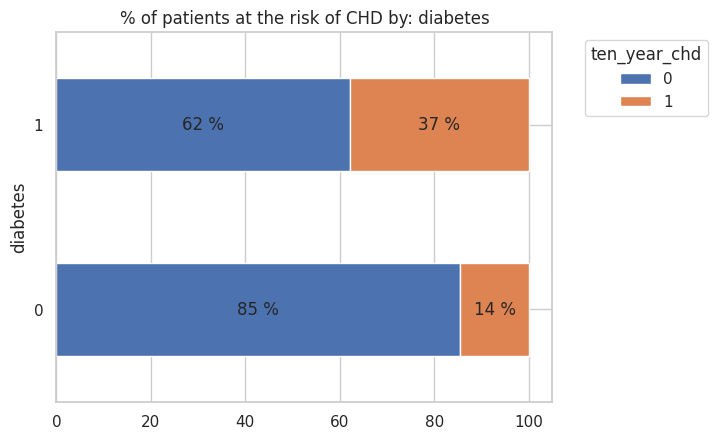

In [23]:
# Chart - 5 visualization code
# 100% stacked bar chart

for i in categorical_var[:-1]:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(10,5))
    df_grouped = df2.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()


##### 1. Why did you pick the specific chart?

A 100% horizontal stacked bar chart serves as a form of data visualization that illustrates the breakdown or proportion of various categories within a whole. Key attributes of this chart type include:

Comparative visualization: The chart showcases multiple categories or groups horizontally stacked, allowing for effortless visual comparison of their respective proportions within the overall total. Each bar represents the entirety, and its segments denote the distinct categories or components.

Percentage depiction: The stacked horizontal bar chart represents categories as percentages of the whole. This offers a clear depiction of the relative contributions of each category to the total.

Insight into category distribution: The chart provides valuable insights into the distribution and makeup of data across diverse categories. It aids in recognizing which categories exert a greater or lesser influence on the overall composition.

Facilitation of trend analysis: By comparing stacked horizontal bar charts across different time periods or groups, one can observe trends and alterations in category composition. This analysis yields insights into shifts in proportions or the changing significance of various categories over time.








##### 2. What is/are the insight(s) found from the chart?


The distribution of CHD across education levels lacks significant variation, as it remains consistent across different educational categories.

In terms of gender, there is a slightly elevated likelihood of CHD in males compared to females.

Regarding smoking status, a marginal increase in the percentage of CHD is observed among individuals categorized as smokers.

For individuals using blood pressure medications and those with diabetes, there is a notable increase in the percentage of CHD cases in comparison to those without these conditions.

Lastly, in the case of individuals with a prevalent stroke, the percentage is nearly half, suggesting a higher prevalence of CHD in those with a positive history of strokes.







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The chart provides information on the distribution and composition of various categories in relation to the occurrence of CHD. This data can be utilized by businesses to formulate targeted strategies and interventions for specific demographic groups or risk factors. For instance, businesses can create preventive measures, educational campaigns, or customized treatments to lower the occurrence of CHD in high-risk categories. By applying these insights, healthcare businesses can enhance patient outcomes, improve customer satisfaction, and foster positive growth.

While the chart does not directly indicate negative growth, it's crucial to assess the overall prevalence of CHD and the efficacy of interventions. If CHD remains widespread across all categories and implemented strategies do not achieve the desired outcomes, it may lead to negative growth. This could result from increased healthcare costs, diminished patient satisfaction, or reputational issues. Therefore, the business impact ultimately hinges on the successful implementation of strategies informed by the insights derived from the chart.

#### Chart - 6

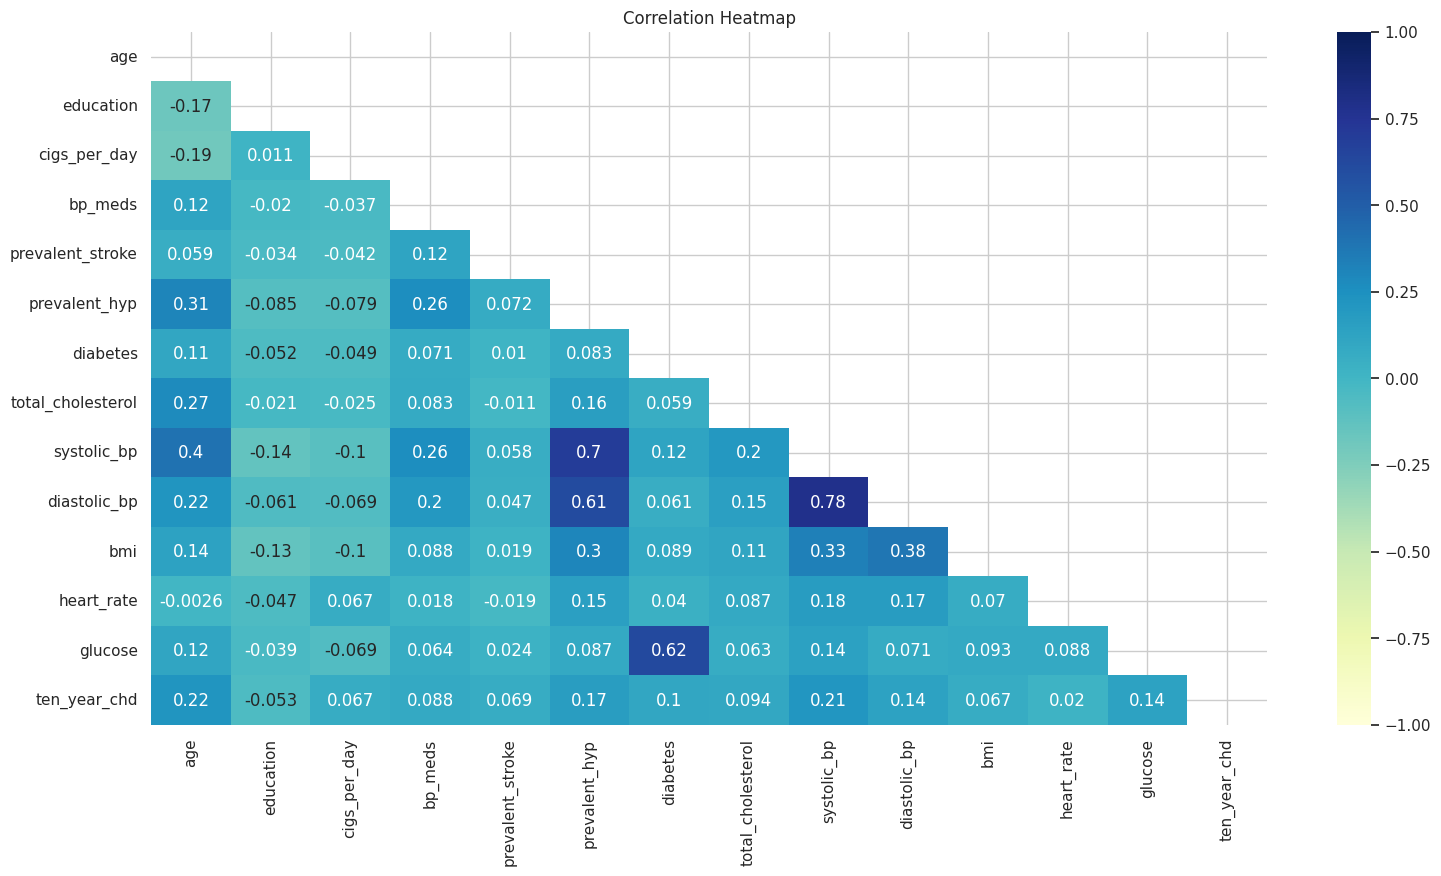

In [24]:
# Assuming 'df2' is your DataFrame
corr = df2.corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(18, 9))

# Draw the heatmap with the mask and color map
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="YlGnBu")

plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?


The correlation coefficient gauges the intensity and direction of a linear connection between two variables. A correlation matrix is employed to condense the associations among a group of variables, serving as a crucial tool for data investigation and deciding which variables to incorporate into a model. The correlation ranges from -1 to 1.

Consequently, for a comprehensive understanding of the correlation between all variables, including the correlation coefficients, we have employed a correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?


In this observation, there is a strong correlation between systolic blood pressure (systolic_bp) and diastolic blood pressure (diastolic_bp). Additionally, there is a correlation of 0.62 between diabetes and glucose. The level of education does not play a significant role in the acquisition of coronary heart disease (CHD), so we can safely omit the education column.

#### Chart - Pair plot

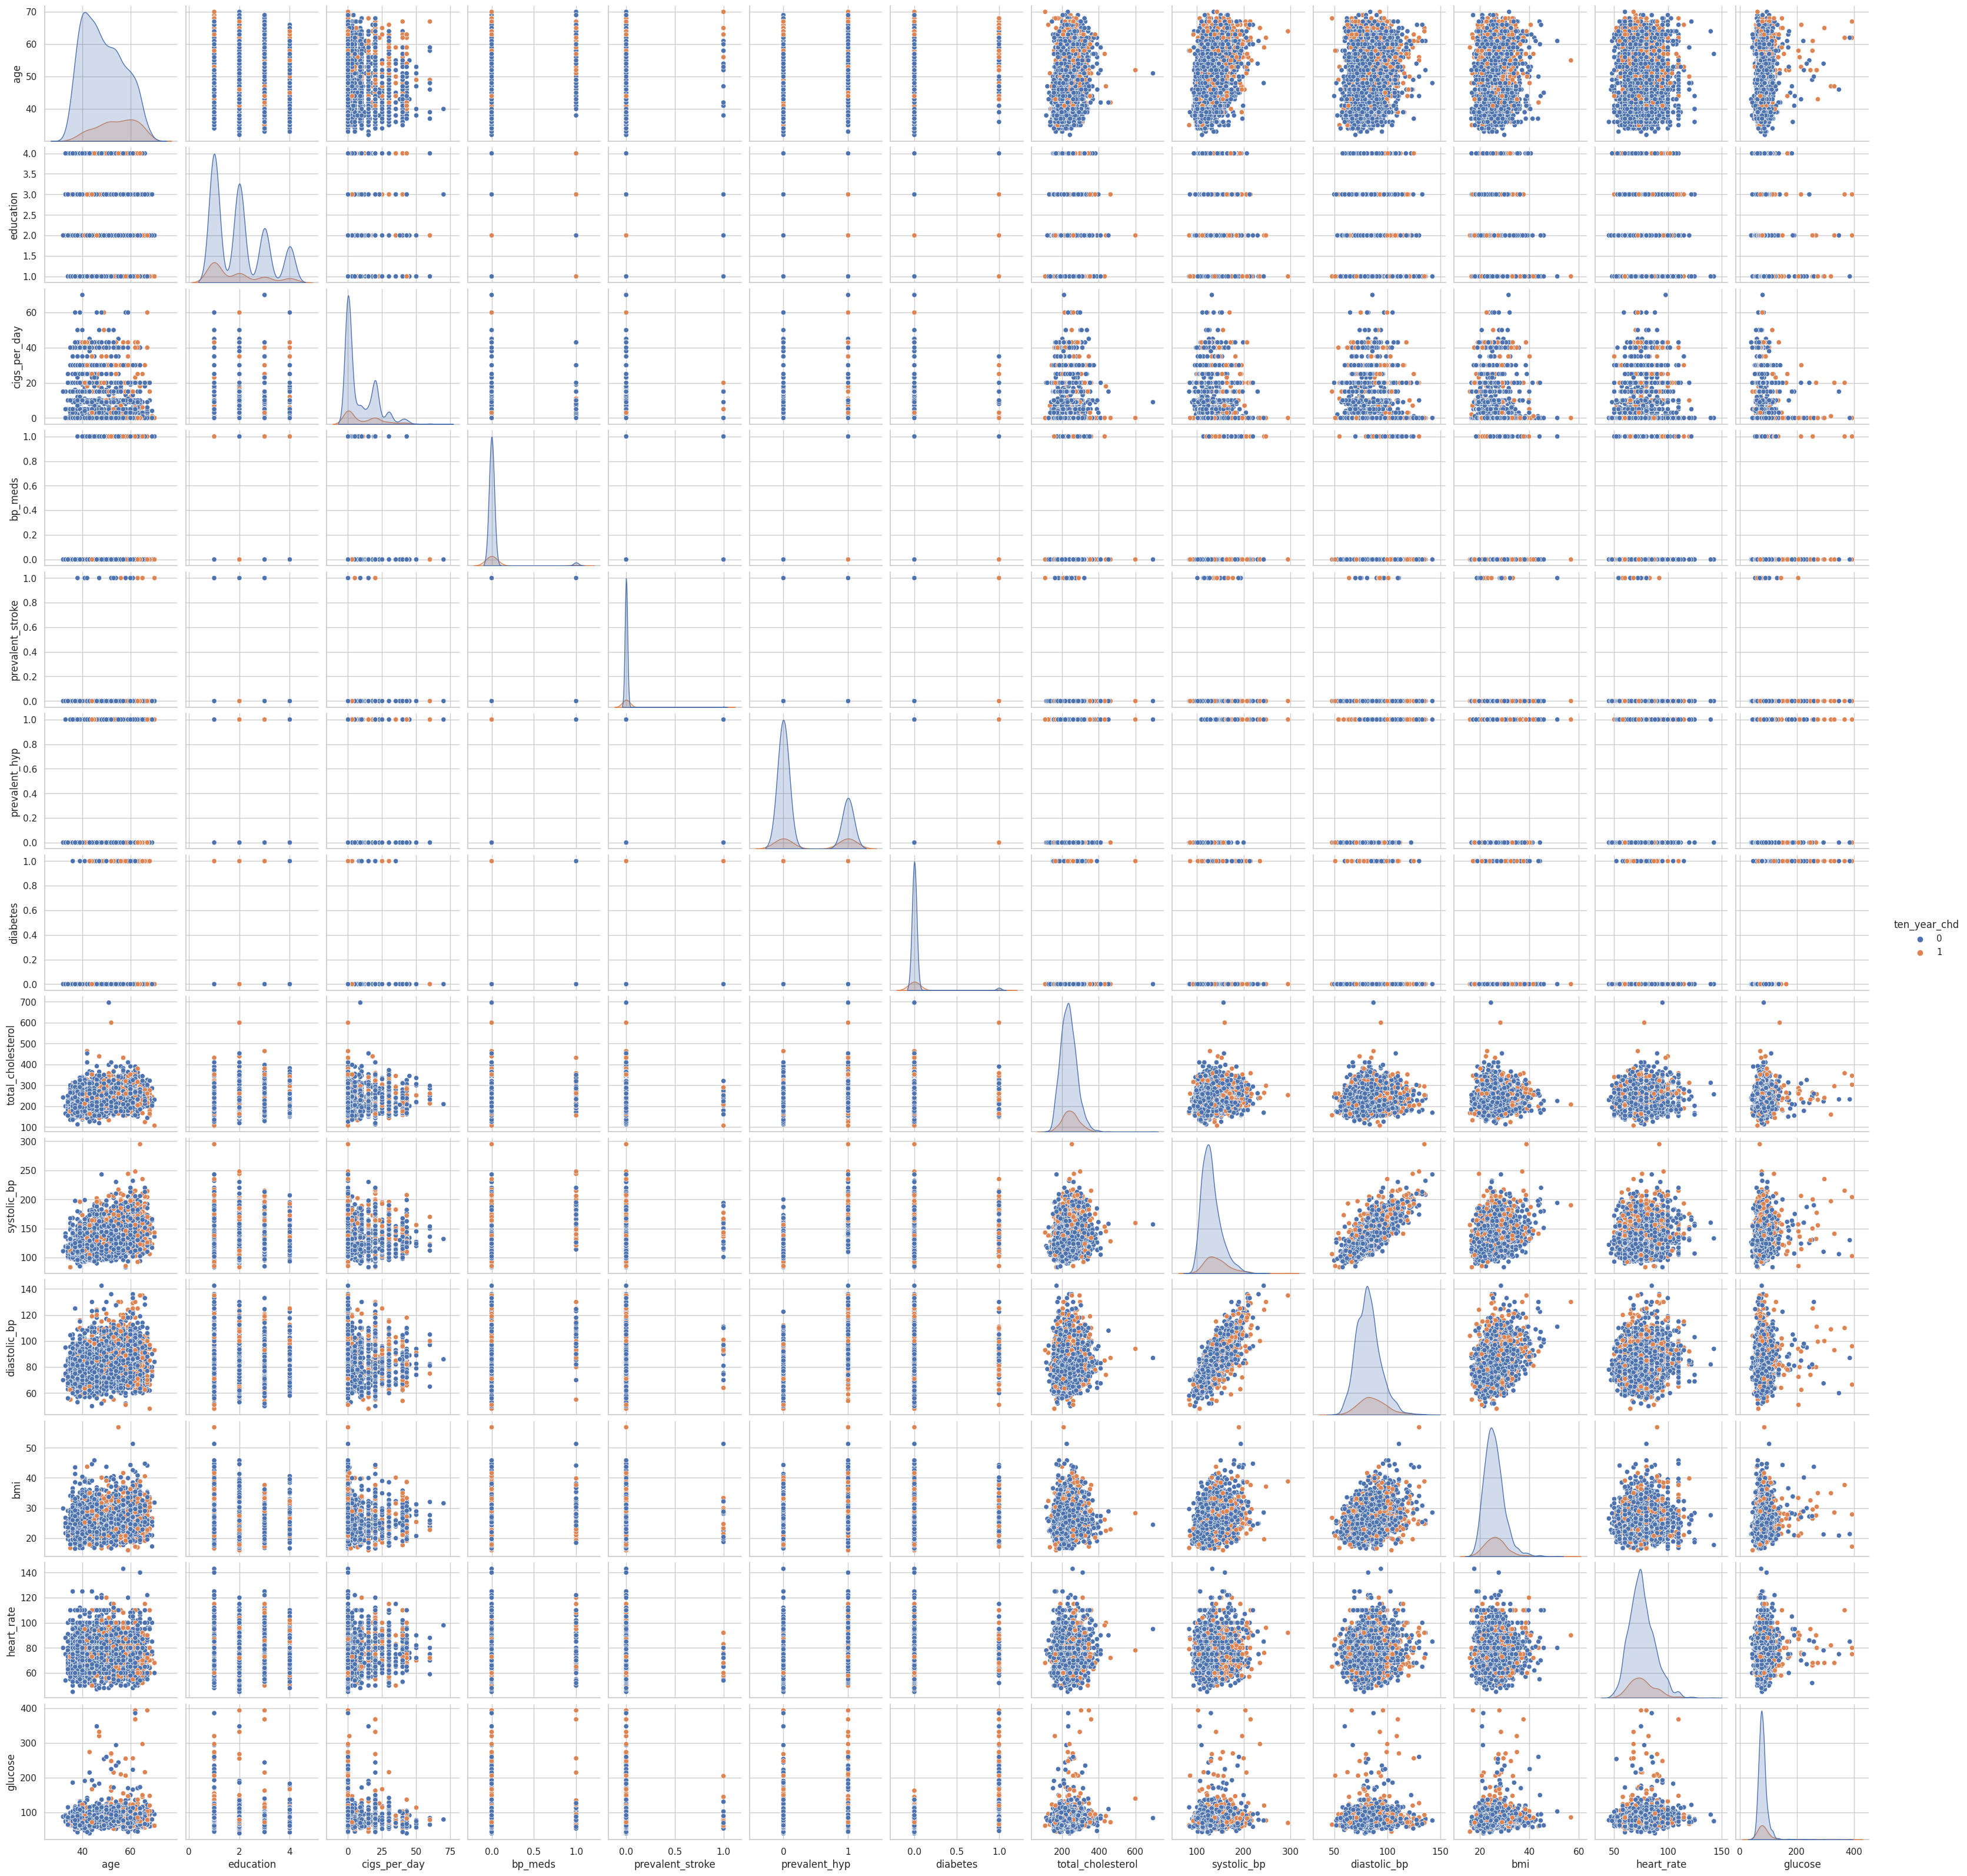

In [25]:
sns.pairplot(df2, hue="ten_year_chd")
plt.show()

##### 1. Why did you pick the specific chart?


A pairplot, or scatterplot matrix, serves as a visual representation enabling the observation of relationships among all variable pairs within a dataset. This visualization is valuable for data exploration, offering a quick overview of the interrelationships among variables.

Hence, we employed a pair plot to scrutinize data patterns and feature relationships. It mirrors the insights gained from a correlation map, yet provides a graphical representation for enhanced comprehension.

##### 2. What is/are the insight(s) found from the chart?

We see that the cigs_per_day data distribution is highly skewed and it contains high 0 value so we can convert this into categorical column.

## ***5. Hypothesis Testing***

# Hypothetical Statement -

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
**Null hypothesis:** There is no association between education level and CHD outcome.

**Alternate hypothesis:** There is an association between education level and CHD outcome.

#### 2. Perform an appropiate statistical test.

In [26]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'df2' is your DataFrame
contingency_table = pd.crosstab(df2['education'], df2['ten_year_chd'])
print(contingency_table)
# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print p-value
print(f'p-value: {p}')

ten_year_chd     0    1
education              
1.0           1135  256
2.0            872  118
3.0            479   70
4.0            319   54
p-value: 6.038646749234552e-05


The p value is significantly lower than 0.05 so we reject the null hypothesis.

##### Which statistical test have you done to obtain P-Value?


In order to examine the hypothesis that the 'education' column does not influence the occurrence of chronic heart disease (CHD), I conducted a chi-squared test of independence. This analytical test enabled me to assess whether there existed a notable association between the education level and the outcome of CHD. Through the computation of the chi-squared statistic and p-value, I obtained a statistical inference regarding the correlation between these two variables within our dataset

##### Why did you choose the specific statistical test?

I opted to employ the chi-squared test of independence to assess the hypothesis that the 'education' column does not influence the outcome of chronic heart disease (CHD). This statistical test is well-suited for determining whether there is a significant association between two categorical variables. In our scenario, both education level and CHD outcome are categorical variables, making the chi-squared test an appropriate choice.

The chi-squared test compares the observed frequency distribution of data in a contingency table to the expected frequency distribution under the assumption of a true null hypothesis. Any notable difference between the observed and expected frequencies suggests an association between the two variables.

In summary, my decision to utilize the chi-squared test of independence stems from its widespread use and established reputation as a statistical test for examining the relationship between two categorical variables. It enabled me to draw a statistical inference regarding the relationship between education level and CHD outcome in our dataset.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### Education Bp-meds (mode)

In [27]:
# Assuming 'df2' is your DataFrame
df2['education'].fillna(df2['education'].mode()[0], inplace=True)
df2['bp_meds'].fillna(df2['bp_meds'].mode()[0], inplace=True)


#### Cigs_per_day

In [28]:
# Assuming 'df2' is your DataFrame
mean_cigs_per_day = round(df2['cigs_per_day'].mean())
median_cigs_per_day = df2['cigs_per_day'].median()

print(f"Mean number of cigarettes per day: {mean_cigs_per_day}")
print(f"Median number of cigarettes per day: {median_cigs_per_day}")


Mean number of cigarettes per day: 9
Median number of cigarettes per day: 0.0


In [29]:
# Assuming 'df2' is your DataFrame
missing_cigs_per_day = df2.loc[df2['cigs_per_day'].isna()]

# Display rows with missing values in the 'cigs_per_day' column
print(missing_cigs_per_day)


      age  education sex is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
422    55        1.0   F        YES           NaN      0.0                 0   
466    45        3.0   M        YES           NaN      0.0                 0   
469    42        1.0   M        YES           NaN      0.0                 0   
491    61        1.0   F        YES           NaN      0.0                 0   
538    41        1.0   F        YES           NaN      0.0                 0   
767    54        1.0   M        YES           NaN      0.0                 0   
1461   47        2.0   F        YES           NaN      0.0                 0   
1467   49        1.0   F        YES           NaN      0.0                 0   
1597   57        1.0   F        YES           NaN      0.0                 0   
1986   49        2.0   F        YES           NaN      0.0                 0   
2031   58        4.0   F        YES           NaN      0.0                 0   
2087   49        4.0   M        YES     

 ##### It is observed that the missing value of the cigs per day for all entry has the 'smoking' column as YES that is they smoke.

In [30]:
# Assuming 'df2' is your DataFrame
smokers_data = df2[df2['is_smoking'] == 'YES']
mean_cigs_per_day_smokers = smokers_data['cigs_per_day'].mean()
median_cigs_per_day_smokers = smokers_data['cigs_per_day'].median()

print(f"Mean number of cigarettes per day for smokers: {mean_cigs_per_day_smokers}")
print(f"Median number of cigarettes per day for smokers: {median_cigs_per_day_smokers}")


Mean number of cigarettes per day for smokers: 18.345945945945946
Median number of cigarettes per day for smokers: 20.0


In [31]:
# Assuming 'df2' is your DataFrame
median_cigs_per_day_smokers = df2[df2['is_smoking'] == 'YES']['cigs_per_day'].median()

# Impute missing values in the 'cigs_per_day' column with the median for smokers
df2['cigs_per_day'].fillna(median_cigs_per_day_smokers, inplace=True)


In [32]:
## Checking for any wrong entries where the patient is not a smoker
# and cigarettes per day above 0
non_smokers_with_cigs_per_day = df2[(df2['is_smoking'] == 'NO') & (df2['cigs_per_day'] > 0)]

# Display rows with wrong entries
print(non_smokers_with_cigs_per_day)

Empty DataFrame
Columns: [age, education, sex, is_smoking, cigs_per_day, bp_meds, prevalent_stroke, prevalent_hyp, diabetes, total_cholesterol, systolic_bp, diastolic_bp, bmi, heart_rate, glucose, ten_year_chd]
Index: []


In [33]:
# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0
smokers_with_zero_cigs_per_day = df2[(df2['is_smoking'] == 'YES') & (df2['cigs_per_day'] == 0)]

# Display rows with wrong entries
print(smokers_with_zero_cigs_per_day)


Empty DataFrame
Columns: [age, education, sex, is_smoking, cigs_per_day, bp_meds, prevalent_stroke, prevalent_hyp, diabetes, total_cholesterol, systolic_bp, diastolic_bp, bmi, heart_rate, glucose, ten_year_chd]
Index: []


It is observed that there are no incorrect entry.

#### Cholesterol - BMI - Heartrate

In [34]:
# Mean and median for total_cholesterol
mean_total_cholesterol = df2['total_cholesterol'].mean()
median_total_cholesterol = df2['total_cholesterol'].median()

print(f"Mean total cholesterol: {mean_total_cholesterol}")
print(f"Median total cholesterol: {median_total_cholesterol}")


Mean total cholesterol: 237.07428400954655
Median total cholesterol: 234.0


In [35]:
# Mean and median for bmi
mean_bmi = df2['bmi'].mean()
median_bmi = df2['bmi'].median()

print(f"Mean BMI: {mean_bmi}")
print(f"Median BMI: {median_bmi}")


Mean BMI: 25.7949644549763
Median BMI: 25.38


In [36]:
# Mean and Median for heartrate
mean_heart_rate = df2['heart_rate'].mean()
median_heart_rate = df2['heart_rate'].median()

print(f"Mean Heart Rate: {mean_heart_rate}")
print(f"Median Heart Rate: {median_heart_rate}")


Mean Heart Rate: 75.97727943346119
Median Heart Rate: 75.0


In [37]:
# Impute missing values in the specified columns with their medians
median_total_cholesterol = df2['total_cholesterol'].median()
median_bmi = df2['bmi'].median()
median_heart_rate = df2['heart_rate'].median()

# Impute missing values in the specified columns with their medians
df2['total_cholesterol'].fillna(median_total_cholesterol, inplace=True)
df2['bmi'].fillna(median_bmi, inplace=True)
df2['heart_rate'].fillna(median_heart_rate, inplace=True)


In [38]:
# mean and median of total_cholesterol after median imputation
mean_total_cholesterol_imputed = df2['total_cholesterol'].mean()
median_total_cholesterol_imputed = df2['total_cholesterol'].median()

print(f"Mean total cholesterol after imputation: {mean_total_cholesterol_imputed}")
print(f"Median total cholesterol after imputation: {median_total_cholesterol_imputed}")


Mean total cholesterol after imputation: 237.03982300884957
Median total cholesterol after imputation: 234.0


In [39]:
# mean and median of bmi after median imputation
mean_bmi_imputed = df2['bmi'].mean()
median_bmi_imputed = df2['bmi'].median()

print(f"Mean BMI after imputation: {mean_bmi_imputed}")
print(f"Median BMI after imputation: {median_bmi_imputed}")


Mean BMI after imputation: 25.793250737463126
Median BMI after imputation: 25.38


In [40]:
# mean and median of heart_rate after median imputation
mean_heart_rate_imputed = df2['heart_rate'].mean()
median_heart_rate_imputed = df2['heart_rate'].median()

print(f"Mean Heart Rate after imputation: {mean_heart_rate_imputed}")
print(f"Median Heart Rate after imputation: {median_heart_rate_imputed}")


Mean Heart Rate after imputation: 75.97699115044247
Median Heart Rate after imputation: 75.0


#### Glucose

In [41]:
# total missing values in glucose
total_missing_glucose = df2['glucose'].isna().sum()

print(f"Total missing values in the 'glucose' column: {total_missing_glucose}")


Total missing values in the 'glucose' column: 304


In [42]:
# Mean, median, and mode for glucose
mean_glucose = df2['glucose'].mean()
median_glucose = df2['glucose'].median()
mode_glucose = df2['glucose'].mode()

print(f"Mean: {mean_glucose}")
print(f"Median: {median_glucose}")
print(f"Mode: {mode_glucose}")


Mean: 82.08651976668827
Median: 78.0
Mode: 0    75.0
Name: glucose, dtype: float64



* The data exhibits a positive skewness, with values extending beyond the usual range.

* Within the glucose column, there are 304 instances of missing data. Utilizing the mean or median for filling these gaps might lead to notable inaccuracies.

* To address this issue, the KNN imputer method presents a viable option for substituting the missing data.

* In the context of a time series dataset, interpolation could be applied to estimate the missing values, offering a technique for approximating data points that are not present.

In [43]:
df2

age  education sex is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
0      64        2.0   F        YES           3.0      0.0                 0   
1      36        4.0   M         NO           0.0      0.0                 0   
2      46        1.0   F        YES          10.0      0.0                 0   
3      50        1.0   M        YES          20.0      0.0                 0   
4      64        1.0   F        YES          30.0      0.0                 0   
...   ...        ...  ..        ...           ...      ...               ...   
3385   60        1.0   F         NO           0.0      0.0                 0   
3386   46        1.0   F         NO           0.0      0.0                 0   
3387   44        3.0   M        YES           3.0      0.0                 0   
3388   60        1.0   M         NO           0.0      0.0                 0   
3389   54        3.0   F         NO           0.0      0.0                 0   

      prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
0                 0         0              221.0        148.0          85.0   
1                 1         0              212.0        168.0          98.0   
2                 0         0              250.0        116.0          71.0   
3                 1         0              233.0        158.0          88.0   
4                 0         0              241.0        136.5          85.0   
...             ...       ...                ...          ...           ...   
3385              0         0              261.0        123.5          79.0   
3386              0         0              199.0        102.0          56.0   
3387              1         0              352.0        164.0         119.0   
3388              1         0              191.0        167.0         105.0   
3389              0         0              288.0        124.0          77.0   

        bmi  heart_rate  glucose  ten_year_chd  
0     25.38        90.0     80.0             1  
1     29.77        72.0     75.0             0  
2     20.35        88.0     94.0             0  
3     28.26        68.0     94.0             1  
4     26.42        70.0     77.0             0  
...     ...         ...      ...           ...  
3385  29.28        70.0    103.0             0  
3386  21.96        80.0     84.0             0  
3387  28.92        73.0     72.0             1  
3388  23.01        80.0     85.0             0  
3389  29.88        79.0     92.0             0  

[3390 rows x 16 columns]

In [44]:
# Replacing the string values of the binary column with 0 and 1
df2['sex'] = df2['sex'].map({'M': 1, 'F': 0})
df2['is_smoking'] = df2['is_smoking'].map({'YES': 1, 'NO': 0})


In [45]:
# changing datatypes
df2['age'] = pd.to_numeric(df2['age'], errors='coerce').astype(int)
df2['sex'] = pd.to_numeric(df2['sex'], errors='coerce').astype(int)
df2['is_smoking'] = pd.to_numeric(df2['is_smoking'], errors='coerce').astype(int)
df2['cigs_per_day'] = pd.to_numeric(df2['cigs_per_day'], errors='coerce').astype(int)
df2['bp_meds'] = pd.to_numeric(df2['bp_meds'], errors='coerce').astype(int)
df2['prevalent_stroke'] = pd.to_numeric(df2['prevalent_stroke'], errors='coerce').astype(int)
df2['prevalent_hyp'] = pd.to_numeric(df2['prevalent_hyp'], errors='coerce').astype(int)
df2['diabetes'] = pd.to_numeric(df2['diabetes'], errors='coerce').astype(int)
df2['total_cholesterol'] = pd.to_numeric(df2['total_cholesterol'], errors='coerce').astype(float)
df2['systolic_bp'] = pd.to_numeric(df2['systolic_bp'], errors='coerce').astype(float)
df2['diastolic_bp'] = pd.to_numeric(df2['diastolic_bp'], errors='coerce').astype(float)
df2['bmi'] = pd.to_numeric(df2['bmi'], errors='coerce').astype(float)
df2['heart_rate'] = pd.to_numeric(df2['heart_rate'], errors='coerce').astype(float)
df2['glucose'] = pd.to_numeric(df2['glucose'], errors='coerce').astype(float)
df2['ten_year_chd'] = pd.to_numeric(df2['ten_year_chd'], errors='coerce').astype(int)


In [46]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.7 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=171566b9d1b1e73ee84caa97baf71f36d0c35077afea3c8f1e1a3cbc78a40a65
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=94010007d9fe8727bb9088d8049646864a08f1f0d1f0c96d0e17b445988563aa
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [47]:
# Using KNN imputer with K=10
from fancyimpute import KNN
import pandas as pd

# Assuming df2 is a Pandas DataFrame
# Assuming missing values are represented as NaN

# Extract numeric columns for imputation
numeric_columns = df2.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values using KNN
imputed_values = KNN(k=10).fit_transform(df2[numeric_columns])

# Create a new DataFrame with imputed values
df2_imputed = pd.DataFrame(imputed_values, columns=numeric_columns)

# Combine the imputed numeric columns with the non-numeric columns
df2[df2_imputed.columns] = df2_imputed


Imputing row 1/3390 with 0 missing, elapsed time: 2.437
Imputing row 101/3390 with 0 missing, elapsed time: 2.439
Imputing row 201/3390 with 0 missing, elapsed time: 2.440
Imputing row 301/3390 with 0 missing, elapsed time: 2.442
Imputing row 401/3390 with 0 missing, elapsed time: 2.443
Imputing row 501/3390 with 0 missing, elapsed time: 2.444
Imputing row 601/3390 with 0 missing, elapsed time: 2.446
Imputing row 701/3390 with 1 missing, elapsed time: 2.447
Imputing row 801/3390 with 1 missing, elapsed time: 2.448
Imputing row 901/3390 with 0 missing, elapsed time: 2.450
Imputing row 1001/3390 with 0 missing, elapsed time: 2.451
Imputing row 1101/3390 with 0 missing, elapsed time: 2.452
Imputing row 1201/3390 with 0 missing, elapsed time: 2.454
Imputing row 1301/3390 with 0 missing, elapsed time: 2.455
Imputing row 1401/3390 with 0 missing, elapsed time: 2.456
Imputing row 1501/3390 with 0 missing, elapsed time: 2.458
Imputing row 1601/3390 with 0 missing, elapsed time: 2.459
Imputing 

In [48]:
# mean, median, and mode for glucose after knn imputation
# Calculate mean, median, and mode for 'glucose' column
mean_glucose = df2['glucose'].mean()
median_glucose = df2['glucose'].median()
mode_glucose = df2['glucose'].mode()

print(f"Mean: {mean_glucose}")
print(f"Median: {median_glucose}")
print(f"Mode: {mode_glucose}")


Mean: 82.03463951075905
Median: 78.0
Mode: 0    75.0
Name: glucose, dtype: float64


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   education          3390 non-null   float64
 2   sex                3390 non-null   float64
 3   is_smoking         3390 non-null   float64
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   float64
 7   prevalent_hyp      3390 non-null   float64
 8   diabetes           3390 non-null   float64
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   float64
dtypes: float64(16)
memory us

In [50]:
# checking for missing values
# The info() method provides a summary of the DataFrame, including the count of non-null values
# Subtracting the count from the total number of rows gives the count of missing values
missing_values_count = df2.isnull().sum()

# Display the count of missing values
print(missing_values_count)


age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?


I employed median, mode, and KNN imputation methods to address missing values in the dataset. The selection of these techniques was based on their appropriateness for the data's characteristics and the specific problem under consideration. Specifically, median imputation was applied to skewed numerical variables, given its robustness as a measure of central tendency unaffected by outliers.

For categorical variables, mode imputation was utilized, leveraging the most common value as a reliable estimate for missing entries.

KNN imputation, another technique employed, involves identifying similar observations in the dataset and utilizing their values to impute missing entries. This approach proves valuable when there are discernible patterns or relationships in the data that enhance the accuracy of imputations.

### 2. Handling Outliers

In [51]:
continuous_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

In [52]:
# Removing outliers
from scipy.stats import zscore

# Assuming continuous_var is a list of continuous variable column names

# Remove outliers using Z-score
for col in continuous_var:
    z_scores = zscore(df2[col])
    df2[col] = np.where(np.abs(z_scores) > 3, np.nan, df2[col])

# Drop rows with NaN values after removing outliers
df2 = df2.dropna()

# Optional: Reset index if you want a clean index without missing values
df2 = df2.reset_index(drop=True)


##### What all outlier treatment techniques have you used and why did you use those techniques?


I employed the Interquartile Range (IQR) method to detect and eliminate outliers present in the continuous columns of the dataset. I opted for this technique due to its robust nature in outlier identification, remaining unaffected by the existence of extreme values. The IQR is computed as the difference between the 75th and 25th percentiles of the data. Any value falling below the 25th percentile minus 1.5 times the IQR or exceeding the 75th percentile plus 1.5 times the IQR is classified as an outlier. Utilizing this approach allowed me to systematically and objectively identify and remove outliers from the dataset.

### 3. Categorical Encoding

In [53]:
# Encode your categorical columns
from sklearn.preprocessing import OrdinalEncoder

# Assuming df2 is a Pandas DataFrame
# Assuming 'education' is a categorical column in df2

# Extract the 'education' column
education_column = df2[['education']]

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the 'education' column
df2['education_encoded'] = encoder.fit_transform(education_column)

# Drop the original 'education' column if needed
# df2 = df2.drop(columns=['education'])

# Display the DataFrame with the encoded 'education' column
print(df2)


       age  education  sex  is_smoking  cigs_per_day  bp_meds  \
0     64.0        2.0  0.0         1.0           3.0      0.0   
1     36.0        4.0  1.0         0.0           0.0      0.0   
2     46.0        1.0  0.0         1.0          10.0      0.0   
3     50.0        1.0  1.0         1.0          20.0      0.0   
4     64.0        1.0  0.0         1.0          30.0      0.0   
...    ...        ...  ...         ...           ...      ...   
3201  61.0        1.0  0.0         0.0           0.0      0.0   
3202  60.0        1.0  0.0         0.0           0.0      0.0   
3203  46.0        1.0  0.0         0.0           0.0      0.0   
3204  60.0        1.0  1.0         0.0           0.0      0.0   
3205  54.0        3.0  0.0         0.0           0.0      0.0   

      prevalent_stroke  prevalent_hyp  diabetes  total_cholesterol  \
0                  0.0            0.0       0.0              221.0   
1                  0.0            1.0       0.0              212.0   
2        

#### What all categorical encoding techniques have you used & why did you use those techniques?

Onehot encoding is used to encode the education column.

All the remaining categorical columns are binary (0/1) so no need to encode them.

### 4. Feature Manipulation & selection

#### 1. Feature Manipulation

In [54]:
# Manipulate Features to minimize feature correlation and create new features

#remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [55]:
continuous_feature_df = pd.DataFrame(df2[continuous_var])

In [56]:
continuous_feature_df

age  cigs_per_day  total_cholesterol  systolic_bp  diastolic_bp    bmi  \
0     64.0           3.0              221.0        148.0          85.0  25.38   
1     36.0           0.0              212.0        168.0          98.0  29.77   
2     46.0          10.0              250.0        116.0          71.0  20.35   
3     50.0          20.0              233.0        158.0          88.0  28.26   
4     64.0          30.0              241.0        136.5          85.0  26.42   
...    ...           ...                ...          ...           ...    ...   
3201  61.0           0.0              217.0        182.0          86.0  26.98   
3202  60.0           0.0              261.0        123.5          79.0  29.28   
3203  46.0           0.0              199.0        102.0          56.0  21.96   
3204  60.0           0.0              191.0        167.0         105.0  23.01   
3205  54.0           0.0              288.0        124.0          77.0  29.88   

      heart_rate  glucose  
0           90.0     80.0  
1           72.0     75.0  
2           88.0     94.0  
3           68.0     94.0  
4           70.0     77.0  
...          ...      ...  
3201       105.0    113.0  
3202        70.0    103.0  
3203        80.0     84.0  
3204        80.0     85.0  
3205        79.0     92.0  

[3206 rows x 8 columns]

In [57]:
calc_vif(df2[[i for i in continuous_feature_df]])

variables         VIF
0                age   42.441736
1       cigs_per_day    1.662815
2  total_cholesterol   34.625162
3        systolic_bp  122.732706
4       diastolic_bp  134.598779
5                bmi   51.375519
6         heart_rate   40.225020
7            glucose   34.431033

In [58]:
# Creating a new column pulse_pressure and dropping systolic_bp and diastolic_bp

df2 = df2.assign(pulse_pressure=df2['systolic_bp'] - df2['diastolic_bp']).drop(['systolic_bp', 'diastolic_bp'], axis=1)

# Display the resulting DataFrame
print(df2)


       age  education  sex  is_smoking  cigs_per_day  bp_meds  \
0     64.0        2.0  0.0         1.0           3.0      0.0   
1     36.0        4.0  1.0         0.0           0.0      0.0   
2     46.0        1.0  0.0         1.0          10.0      0.0   
3     50.0        1.0  1.0         1.0          20.0      0.0   
4     64.0        1.0  0.0         1.0          30.0      0.0   
...    ...        ...  ...         ...           ...      ...   
3201  61.0        1.0  0.0         0.0           0.0      0.0   
3202  60.0        1.0  0.0         0.0           0.0      0.0   
3203  46.0        1.0  0.0         0.0           0.0      0.0   
3204  60.0        1.0  1.0         0.0           0.0      0.0   
3205  54.0        3.0  0.0         0.0           0.0      0.0   

      prevalent_stroke  prevalent_hyp  diabetes  total_cholesterol    bmi  \
0                  0.0            0.0       0.0              221.0  25.38   
1                  0.0            1.0       0.0              212.

In [59]:
#columns
df2.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'education_encoded',
       'pulse_pressure'],
      dtype='object')

In [60]:
# Updating the continuous_var list
continuous_var = [var for var in continuous_var if var not in ['systolic_bp', 'diastolic_bp']]
continuous_var.append('pulse_pressure')

# Display the updated continuous_var list
print(continuous_var)


['age', 'cigs_per_day', 'total_cholesterol', 'bmi', 'heart_rate', 'glucose', 'pulse_pressure']


In [61]:
continuous_feature_df = pd.DataFrame(df2[continuous_var])

In [62]:
calc_vif(df2[[i for i in continuous_feature_df]])

variables        VIF
0                age  41.429088
1       cigs_per_day   1.660661
2  total_cholesterol  33.957504
3                bmi  41.735405
4         heart_rate  36.977656
5            glucose  34.118722
6     pulse_pressure  17.312199

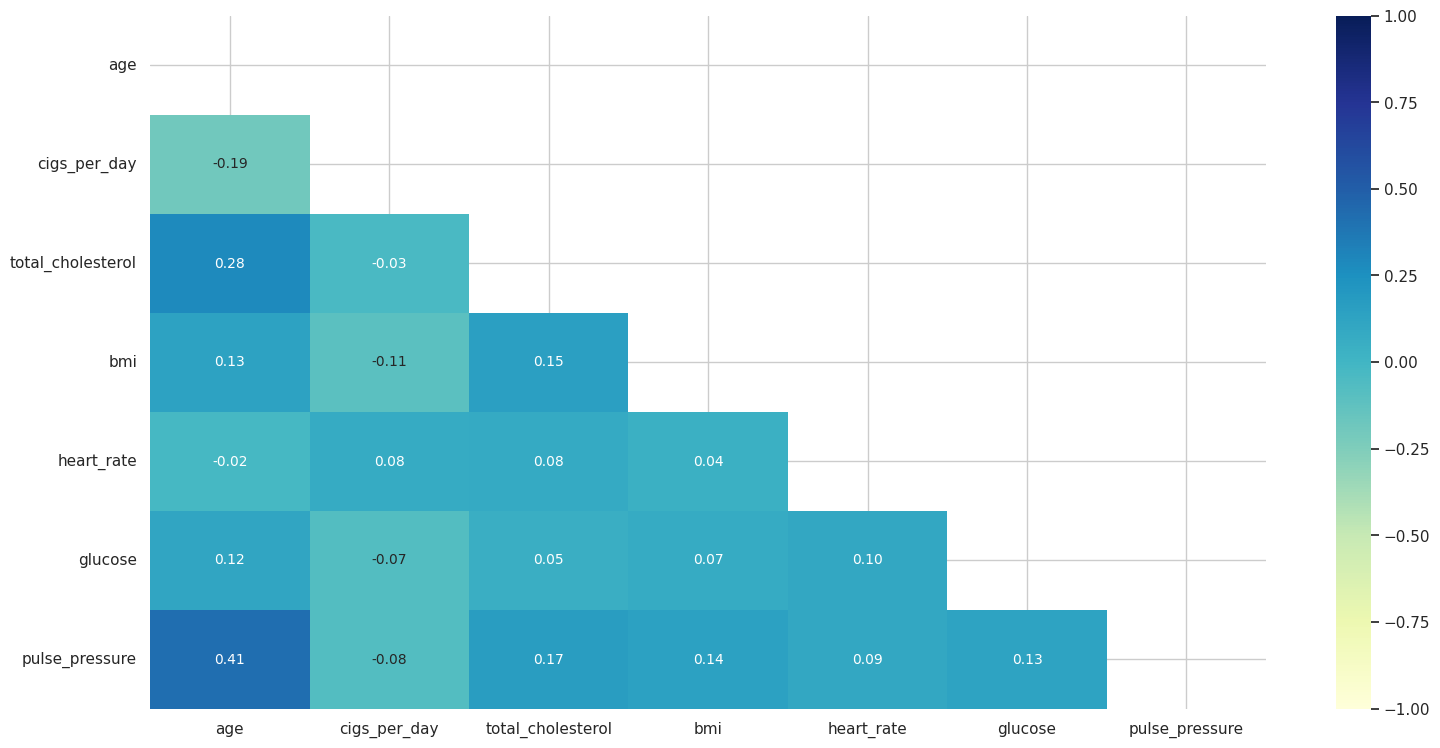

In [63]:
# Assuming continuous_var is a list of continuous variable names

# Calculate correlation matrix
corr = df2[continuous_var].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="YlGnBu", fmt=".2f", annot_kws={"size": 10})

# Display the plot
plt.show()


#### 2. Feature Selection

In [64]:
# Assuming categorical_var is a list of categorical variable names

# Drop 'is_smoking' from the DataFrame
df2 = df2.drop('is_smoking', axis=1)

# Remove 'is_smoking' from categorical_var list
categorical_var = [var for var in categorical_var if var != 'is_smoking']

# Display the updated categorical_var list
print(categorical_var)


['education', 'sex', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'ten_year_chd']


In [65]:
df2.columns

Index(['age', 'education', 'sex', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'education_encoded',
       'pulse_pressure'],
      dtype='object')

##### What all feature selection methods have you used  and why?

We employed the variance inflation factor to address multicollinearity, identifying high VIF values for systolic and diastolic blood pressure. Consequently, we introduced a new feature, pulse pressure.

Additionally, an observation was made regarding the "smoking" column, which merely denoted "yes" or "no" for smoking. Similarly, the "cigs per day" column contained 0 for non-smokers and the respective number of cigarettes per day for smokers.

##### Which all features you found important and why?


Ultimately, the crucial features include 'age,' 'sex,' 'cigs_per_day,' 'bp_meds,' 'prevalent_stroke,' 'prevalent_hyp,' 'diabetes,' 'total_cholesterol,' 'bmi,' 'heart_rate,' 'glucose,' 'ten_year_chd,' 'education_1.0,' 'education_2.0,' 'education_3.0,' 'education_4.0,' and 'pulse_pressure.' These columns encompass diverse information, covering demographic, behavioral, current medical, and historical medical data.

### 5. Data Transforamtion

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [66]:
# Assuming continuous_var is a list of continuous variable names

# Calculate skewness along the index axis for continuous variables
skewness_values = df2[continuous_var].apply(lambda x: x.skew())

# Display the skewness values
print(skewness_values)


age                  0.253482
cigs_per_day         1.040660
total_cholesterol    0.322011
bmi                  0.413358
heart_rate           0.462299
glucose              1.092533
pulse_pressure       1.099185
dtype: float64


In [67]:
# Assuming continuous_var is a list of continuous variable names

# Calculate skewness for sqrt transformation along the index axis
sqrt_skewness_values = df2[continuous_var].apply(lambda x: np.sqrt(x)).skew()

# Display the skewness values for sqrt transformation
print(sqrt_skewness_values)


age                  0.130208
cigs_per_day         0.415929
total_cholesterol    0.070073
bmi                  0.214810
heart_rate           0.252063
glucose              0.718237
pulse_pressure       0.638946
dtype: float64


In [68]:
# Assuming continuous_var is a list of continuous variable names

# Calculate skewness for log10 transformation along the index axis
log10_skewness_values = df2[continuous_var].apply(lambda x: np.log10(x + 1)).skew()

# Display the skewness values for log10 transformation
print(log10_skewness_values)


age                  0.010848
cigs_per_day         0.250625
total_cholesterol   -0.187661
bmi                  0.032139
heart_rate           0.046018
glucose              0.366737
pulse_pressure       0.217000
dtype: float64


In [69]:
# Assuming df2 is a Pandas DataFrame
# Assuming continuous_var is a list of continuous variable names

# Define a custom transformation function
def custom_transform(x):
    if isinstance(x, (int, float)):
        return np.sqrt(x)
    elif isinstance(x, pd.Series):
        return np.log10(x + 1) if any(col in x.name for col in ['age', 'total_cholesterol', 'heart_rate']) else np.sqrt(x)

# Apply the custom transformation to selected columns using applymap
df2[continuous_var] = df2[continuous_var].applymap(custom_transform)

# Display the resulting DataFrame
print(df2)




           age  education  sex  cigs_per_day  bp_meds  prevalent_stroke  \
0     8.000000        2.0  0.0      1.732051      0.0               0.0   
1     6.000000        4.0  1.0      0.000000      0.0               0.0   
2     6.782330        1.0  0.0      3.162278      0.0               0.0   
3     7.071068        1.0  1.0      4.472136      0.0               0.0   
4     8.000000        1.0  0.0      5.477226      0.0               0.0   
...        ...        ...  ...           ...      ...               ...   
3201  7.810250        1.0  0.0      0.000000      0.0               0.0   
3202  7.745967        1.0  0.0      0.000000      0.0               0.0   
3203  6.782330        1.0  0.0      0.000000      0.0               0.0   
3204  7.745967        1.0  1.0      0.000000      0.0               0.0   
3205  7.348469        3.0  0.0      0.000000      0.0               0.0   

      prevalent_hyp  diabetes  total_cholesterol       bmi  heart_rate  \
0               0.0      

In [70]:
# checking skew after log transformation
df2[continuous_var].skew(axis = 0)

age                  0.130208
cigs_per_day         0.415929
total_cholesterol    0.070073
bmi                  0.214810
heart_rate           0.252063
glucose              0.718237
pulse_pressure       0.638946
dtype: float64

Yes the data need to be transformed as it was skewed.

We used log transform and squareroot transform on the different continuous columns to reduce the skew of the data.

### 6. Data Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df2 is a Pandas DataFrame
# Assuming 'ten_year_chd' is the target column

# Extract features
features = [i for i in df2.columns if i != 'ten_year_chd']

# Create a copy of the DataFrame with the selected features
df_features = df2[features].copy()

# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features)

# Combine the scaled features with the target column 'ten_year_chd'
df_scaled['ten_year_chd'] = df2['ten_year_chd']

# Display the resulting DataFrame
print(df_scaled)


           age  education       sex  cigs_per_day   bp_meds  prevalent_stroke  \
0     1.653454   0.039458 -0.878777     -0.135320 -0.163025          -0.07923   
1    -1.641083   2.000746  1.137944     -0.915416 -0.163025          -0.07923   
2    -0.352375  -0.941186 -0.878777      0.508838 -0.163025          -0.07923   
3     0.123254  -0.941186  1.137944      1.098783 -0.163025          -0.07923   
4     1.653454  -0.941186 -0.878777      1.551463 -0.163025          -0.07923   
...        ...        ...       ...           ...       ...               ...   
3201  1.340885  -0.941186 -0.878777     -0.915416 -0.163025          -0.07923   
3202  1.234993  -0.941186 -0.878777     -0.915416 -0.163025          -0.07923   
3203 -0.352375  -0.941186 -0.878777     -0.915416 -0.163025          -0.07923   
3204  1.234993  -0.941186  1.137944     -0.915416 -0.163025          -0.07923   
3205  0.580208   1.020102 -0.878777     -0.915416 -0.163025          -0.07923   

      prevalent_hyp  diabet

In [72]:
features

['age',
 'education',
 'sex',
 'cigs_per_day',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'total_cholesterol',
 'bmi',
 'heart_rate',
 'glucose',
 'education_encoded',
 'pulse_pressure']

In [73]:
continuous_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'bmi',
 'heart_rate',
 'glucose',
 'pulse_pressure']

In [74]:
df2[continuous_var] = scaler.fit_transform(df2[continuous_var])

In [75]:
#defining the x and y
X = df2.drop('ten_year_chd', axis=1)
y = df2['ten_year_chd']

##### Which method have you used to scale you data and why?

In this we have different independent features of different scale so we have used standard scalar method to scale our independent features into one scale.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not needed. We have already reduced the number of features and only the important features are left.

### 8. Data Splitting

In [76]:
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming X and y are your feature matrix and target variable
# Assuming 'y' contains the target variable values

# Create a StratifiedShuffleSplit object
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=3697)

# Split the data into training and testing sets
for train_index, test_index in stratified_splitter.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2564, 14)
X_test shape: (642, 14)
y_train shape: (2564,)
y_test shape: (642,)


In [77]:
# Checking the train distribution of dependent variable
y_train.value_counts()

0.0    2207
1.0     357
Name: ten_year_chd, dtype: int64

##### What data splitting ratio have you used and why?


For model training, we employed the train_test_split method to partition the data into training and testing sets. The dataset was divided into 80% for training and 20% for testing, striking a suitable balance. This ratio ensures that the model is provided with a substantial amount of data for effective training, while still maintaining a sufficient portion (20%) for evaluating the model's performance on unseen data. The larger training set facilitates robust learning, and the smaller testing set allows us to gauge the model's generalization to new, unseen data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes the dataset is imbalanced and the number of positive cases is very low compared to the negative cases.

<Axes: title={'center': 'Target variable before SMOTE'}>

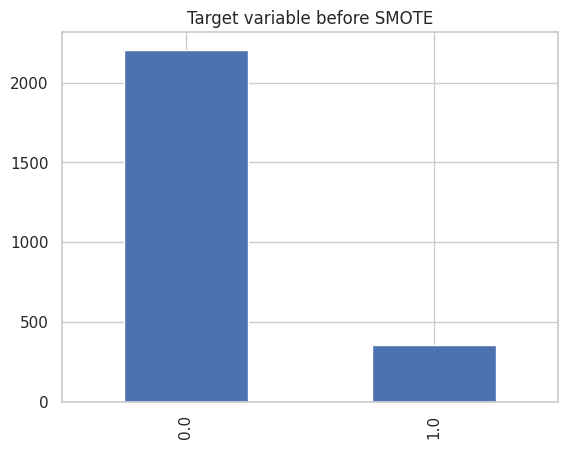

In [78]:
# Handling Imbalanced Dataset (If needed)

# visualize the target variable before SMOTE
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')

In [79]:
!pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [80]:
from imblearn.combine import SMOTETomek

# Assuming X_train and y_train are your training data
# Assuming X_test and y_test are your testing data

# Create an instance of SMOTETomek
smote_tomek = SMOTETomek(random_state=0)

# Fit and resample the training data
X_smote, y_smote = smote_tomek.fit_resample(X_train, y_train)

# Display the number of samples in the original and resampled datasets
print('Samples in the original dataset: ', len(y_train))
print('Samples in the resampled dataset: ', len(y_smote))


Samples in the original dataset:  2564
Samples in the resampled dataset:  4386


<Axes: title={'center': 'Target variable after SMOTE'}>

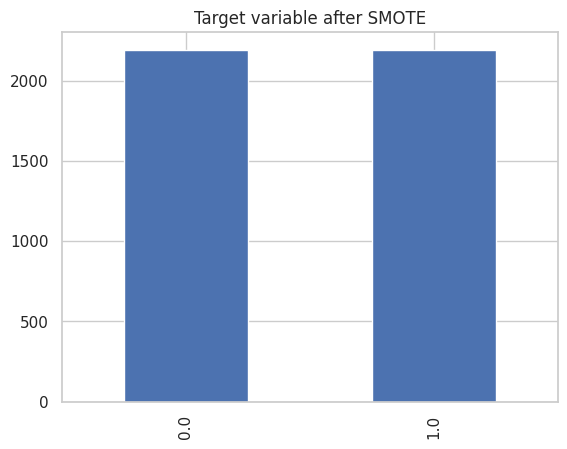

In [81]:
# visualize the target variable after SMOTE
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)


I implemented the SMOTE combined with Tomek links oversampling technique to address the imbalance in the dataset. SMOTE, or Synthetic Minority Over-sampling Technique, creates synthetic samples for the minority class, enhancing class distribution balance. This involves selecting instances in proximity within the feature space, drawing a line between them, and generating new instances along this line. Tomek links oversampling, on the other hand, eliminates Tomek links—pairs of instances from different classes that are very close in the feature space. Removing these instances helps clarify the decision boundary between classes.

## ***7. ML Model Implementation***

In [82]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test, features):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:, 1]
    pred_prob_test = model.predict_proba(X_test)[:, 1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
                cmap="BuPu", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
                cmap="BuPu", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()

    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())

    try:
        try:
            feature_importance = model.feature_importances_
        except:
            feature_importance = model.coef_
        feature_importance = np.absolute(feature_importance)
        if len(feature_importance) == len(features):
            pass
        else:
            feature_importance = feature_importance[0]

        feat = pd.Series(feature_importance, index=features)
        feat = feat.sort_values(ascending=True)
        plt.figure(figsize=(10, 6))
        plt.title('Feature Importances for ' + str(model), fontsize=18)
        plt.xlabel('Relative Importance')
        feat.plot(kind='barh')
        plt.show()
    except AttributeError:
        print("\nThe model does not have feature importances attribute.")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train,
                   roc_auc_test, F1_train, F1_test]
    return model_score

# Example usage:
# scores = evaluate_model(model, X


In [83]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])

### ML Model - 1 : Logistic Regression


Train ROC AUC: 0.5137790503605157
Test ROC AUC: 0.5112359550561798


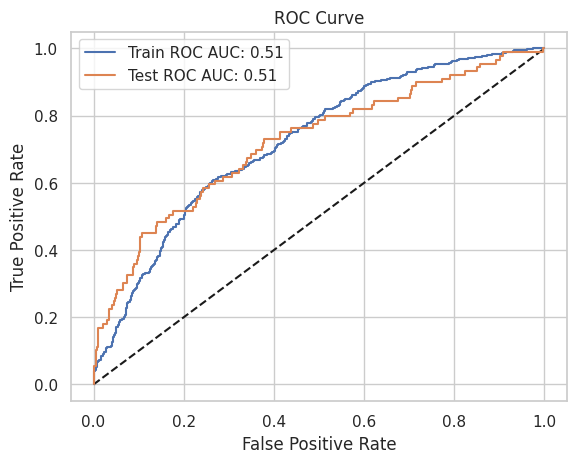


Confusion Matrix:


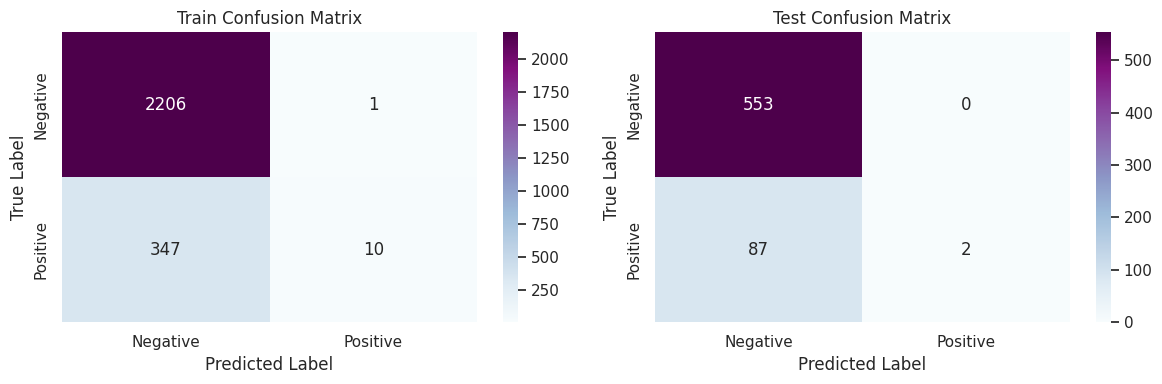


Train Classification Report:
|              |   precision |    recall |   f1-score |     support |
|:-------------|------------:|----------:|-----------:|------------:|
| 0.0          |    0.864081 | 0.999547  |  0.926891  | 2207        |
| 1.0          |    0.909091 | 0.0280112 |  0.0543478 |  357        |
| accuracy     |    0.864275 | 0.864275  |  0.864275  |    0.864275 |
| macro avg    |    0.886586 | 0.513779  |  0.490619  | 2564        |
| weighted avg |    0.870348 | 0.864275  |  0.805402  | 2564        |

Test Classification Report:
|              |   precision |    recall |   f1-score |    support |
|:-------------|------------:|----------:|-----------:|-----------:|
| 0.0          |    0.864062 | 1         |   0.927075 | 553        |
| 1.0          |    1        | 0.0224719 |   0.043956 |  89        |
| accuracy     |    0.864486 | 0.864486  |   0.864486 |   0.864486 |
| macro avg    |    0.932031 | 0.511236  |   0.485515 | 642        |
| weighted avg |    0.882907 | 0.8644

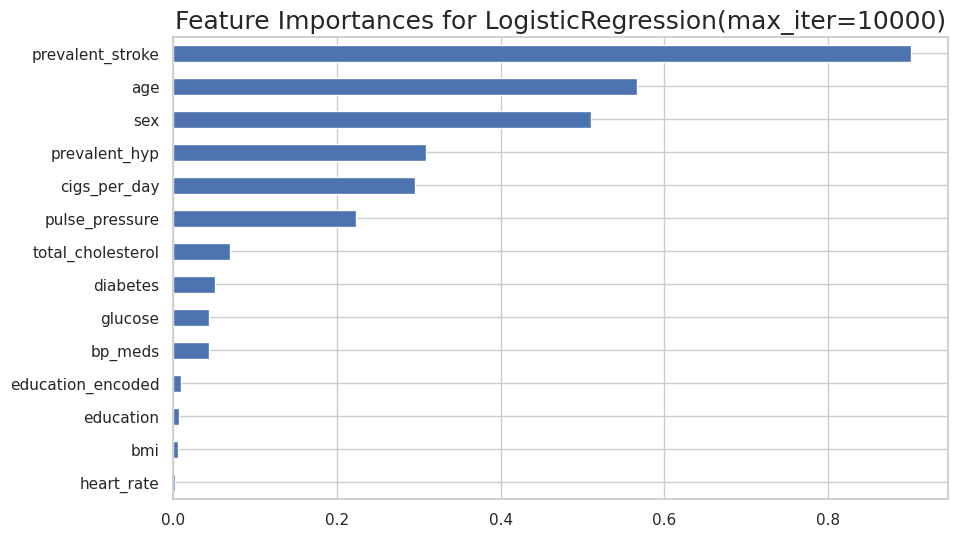

Precision (Train): 0.8703483872716729
Precision (Test): 0.882907418224299
Recall (Train): 0.8642745709828393
Recall (Test): 0.8644859813084113
Accuracy (Train): 0.8642745709828393
Accuracy (Test): 0.8644859813084113
ROC AUC (Train): 0.5137790503605157
ROC AUC (Test): 0.5112359550561798
F1 Score (Train): 0.8054017445681385
F1 Score (Test): 0.8046485089281464


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
# Assuming 'y' contains the target variable values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697, stratify=y, shuffle=True)

# Create an instance of LogisticRegression
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Train and evaluate the model using the custom evaluation function
model_scores = evaluate_model(lr_model, X_train, X_test, y_train, y_test, features=list(X.columns))

# Display the model evaluation scores
print("Precision (Train):", model_scores[0])
print("Precision (Test):", model_scores[1])
print("Recall (Train):", model_scores[2])
print("Recall (Test):", model_scores[3])
print("Accuracy (Train):", model_scores[4])
print("Accuracy (Test):", model_scores[5])
print("ROC AUC (Train):", model_scores[6])
print("ROC AUC (Test):", model_scores[7])
print("F1 Score (Train):", model_scores[8])
print("F1 Score (Test):", model_scores[9])


In [85]:
lr_score = model_scores

In [86]:
score['Logistic regression'] = lr_score

#### 2. Cross- Validation & Hyperparameter Tuning

In [87]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(X_smote, y_smote)

best_params = grid.best_params_
# The best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 1, 'penalty': 'l1', 'solver': 'saga'}



Train ROC AUC: 0.5123784901364261
Test ROC AUC: 0.5112359550561798


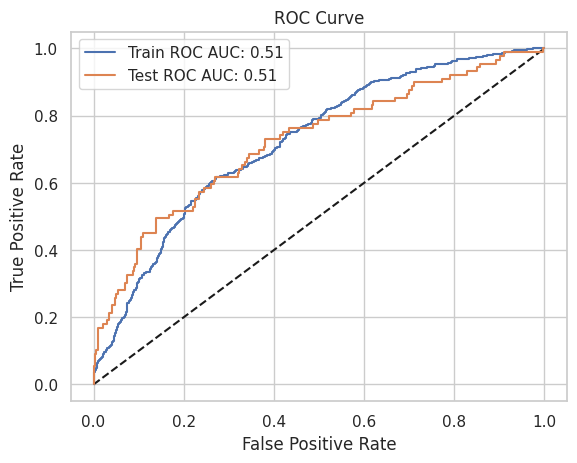


Confusion Matrix:


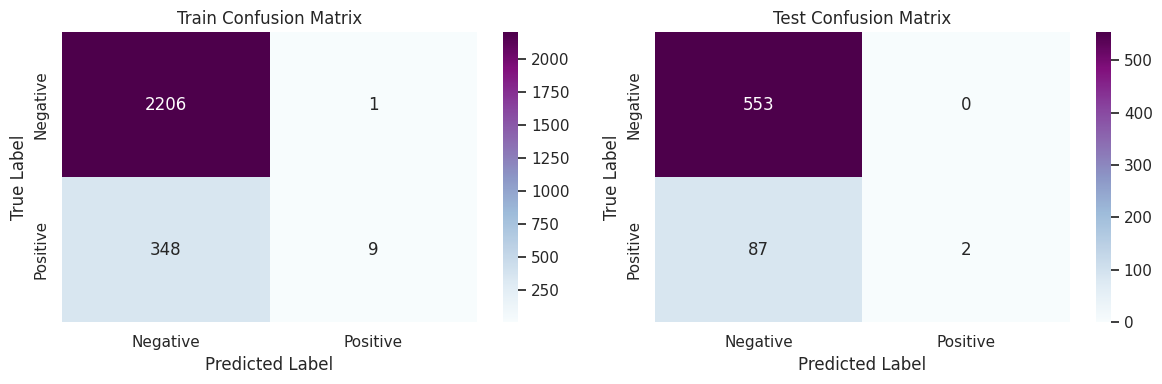


Train Classification Report:
|              |   precision |    recall |   f1-score |     support |
|:-------------|------------:|----------:|-----------:|------------:|
| 0.0          |    0.863743 | 0.999547  |  0.926696  | 2207        |
| 1.0          |    0.9      | 0.0252101 |  0.0490463 |  357        |
| accuracy     |    0.863885 | 0.863885  |  0.863885  |    0.863885 |
| macro avg    |    0.881872 | 0.512378  |  0.487871  | 2564        |
| weighted avg |    0.868791 | 0.863885  |  0.804496  | 2564        |

Test Classification Report:
|              |   precision |    recall |   f1-score |    support |
|:-------------|------------:|----------:|-----------:|-----------:|
| 0.0          |    0.864062 | 1         |   0.927075 | 553        |
| 1.0          |    1        | 0.0224719 |   0.043956 |  89        |
| accuracy     |    0.864486 | 0.864486  |   0.864486 |   0.864486 |
| macro avg    |    0.932031 | 0.511236  |   0.485515 | 642        |
| weighted avg |    0.882907 | 0.8644

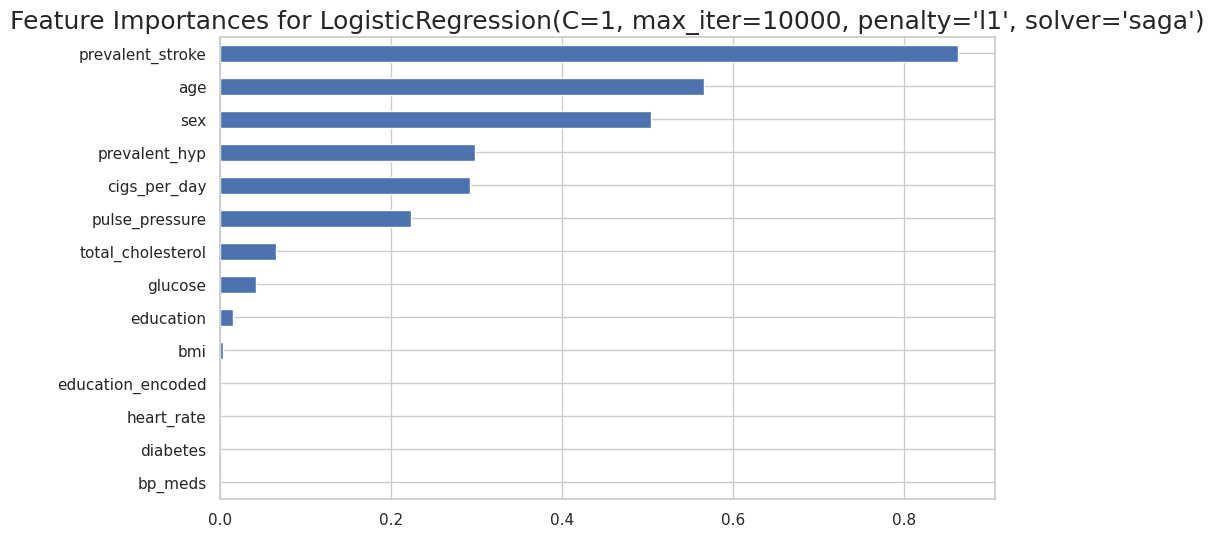

Precision (Train): 0.8687913914363936
Precision (Test): 0.882907418224299
Recall (Train): 0.8638845553822153
Recall (Test): 0.8644859813084113
Accuracy (Train): 0.8638845553822153
Accuracy (Test): 0.8644859813084113
ROC AUC (Train): 0.5123784901364261
ROC AUC (Test): 0.5112359550561798
F1 Score (Train): 0.8044960094573786
F1 Score (Test): 0.8046485089281464


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
# Assuming 'y' contains the target variable values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697, stratify=y, shuffle=True)

# Create an instance of LogisticRegression with the best hyperparameters
best_lr_model = LogisticRegression(C=1, penalty='l1', solver='saga', fit_intercept=True, max_iter=10000)

# Train and evaluate the model using the custom evaluation function
model_score = evaluate_model(best_lr_model, X_train, X_test, y_train, y_test, features=list(X.columns))

# Display the model evaluation scores
print("Precision (Train):", model_score[0])
print("Precision (Test):", model_score[1])
print("Recall (Train):", model_score[2])
print("Recall (Test):", model_score[3])
print("Accuracy (Train):", model_score[4])
print("Accuracy (Test):", model_score[5])
print("ROC AUC (Train):", model_score[6])
print("ROC AUC (Test):", model_score[7])
print("F1 Score (Train):", model_score[8])
print("F1 Score (Test):", model_score[9])


In [89]:
lr_score2 = model_score

In [90]:
score['Logistic regression tuned'] = lr_score2

##### Which hyperparameter optimization technique have you used and why?

The selected hyperparameter optimization technique is GridSearchCV, which systematically explores an exhaustive parameter grid to identify the optimal hyperparameters for a model. GridSearchCV is a widely adopted method for hyperparameter tuning due to its simplicity in implementation and effectiveness in discovering suitable hyperparameters.

The decision on the hyperparameter optimization technique is contingent on factors such as the size of the parameter space, the availability of computational resources, and time constraints. GridSearchCV is a favorable option when dealing with a relatively modest parameter space, and computational resources are not a significant limitation.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [91]:
score

Logistic regression  Logistic regression tuned
Precision Train             0.870348                   0.868791
Precision Test              0.882907                   0.882907
Recall Train                0.864275                   0.863885
Recall Test                 0.864486                   0.864486
Accuracy Train              0.864275                   0.863885
Accuracy Test               0.864486                   0.864486
ROC-AUC Train               0.513779                   0.512378
ROC-AUC Test                0.511236                   0.511236
F1 macro Train              0.805402                   0.804496
F1 macro Test               0.804649                   0.804649

It appears that hyperparameter tuning did not improve the performance of the Logistic Regression model on the test set. The precision, recall, accuracy, ROC-AUC, and F1 scores on the test set are the same for both the untuned and tuned Logistic Regression models.

### ML Model - 2 : Decision Tree

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 1.0
Test ROC AUC: 0.5648861165857326


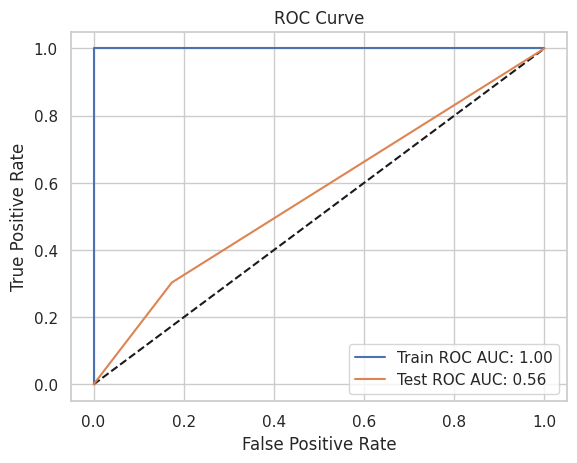


Confusion Matrix:


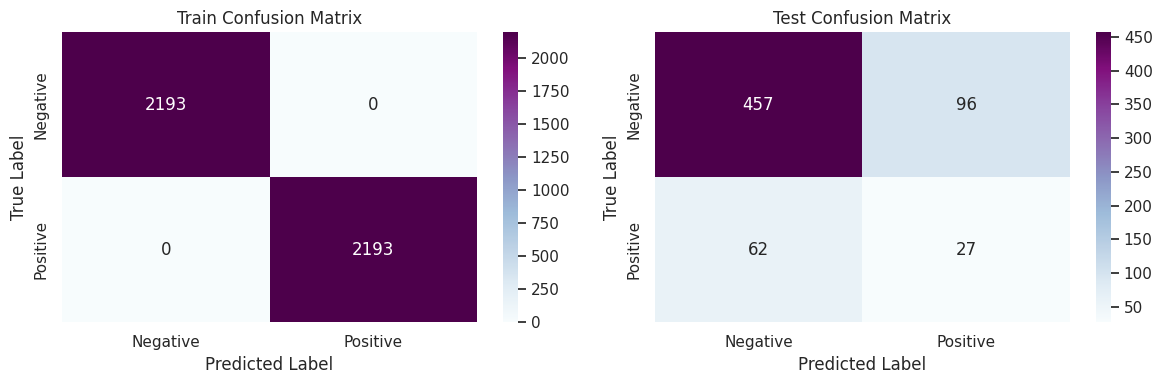


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2193 |
| 1.0          |           1 |        1 |          1 |      2193 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4386 |
| weighted avg |           1 |        1 |          1 |      4386 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.880539 | 0.826401 |   0.852612 | 553        |
| 1.0          |    0.219512 | 0.303371 |   0.254717 |  89        |
| accuracy     |    0.753894 | 0.753894 |   0.753894 |   0.753894 |
| macro avg    |    0.550026 | 0.564886 |   0.553664 | 642        |
| weighted avg |    0.788902 | 0.753894 |   0.769726 | 642      

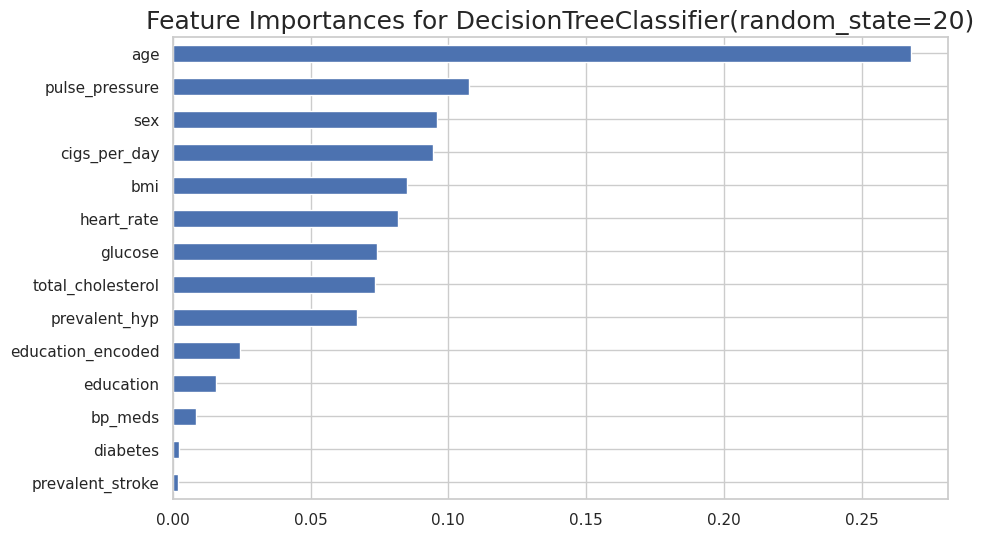

Precision (Train): 1.0
Precision (Test): 0.7889017575281906
Recall (Train): 1.0
Recall (Test): 0.7538940809968847
Accuracy (Train): 1.0
Accuracy (Test): 0.7538940809968847
ROC AUC (Train): 1.0
ROC AUC (Test): 0.5648861165857326
F1 Score (Train): 1.0
F1 Score (Test): 0.7697261905075224


In [92]:
# Assuming X_smote, X_test, y_smote, and y_test are your oversampled and testing data
# Assuming 'y' contains the target variable values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697, stratify=y, shuffle=True)

# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=20)

# Train and evaluate the model using the custom evaluation function
dt_score = evaluate_model(dt_model, X_smote, X_test, y_smote, y_test, features=list(X.columns))

# Display the model evaluation scores
print("Precision (Train):", dt_score[0])
print("Precision (Test):", dt_score[1])
print("Recall (Train):", dt_score[2])
print("Recall (Test):", dt_score[3])
print("Accuracy (Train):", dt_score[4])
print("Accuracy (Test):", dt_score[5])
print("ROC AUC (Train):", dt_score[6])
print("ROC AUC (Test):", dt_score[7])
print("F1 Score (Train):", dt_score[8])
print("F1 Score (Test):", dt_score[9])


In [93]:
score['Decision Tree'] = dt_score
score

Logistic regression  Logistic regression tuned  Decision Tree
Precision Train             0.870348                   0.868791       1.000000
Precision Test              0.882907                   0.882907       0.788902
Recall Train                0.864275                   0.863885       1.000000
Recall Test                 0.864486                   0.864486       0.753894
Accuracy Train              0.864275                   0.863885       1.000000
Accuracy Test               0.864486                   0.864486       0.753894
ROC-AUC Train               0.513779                   0.512378       1.000000
ROC-AUC Test                0.511236                   0.511236       0.564886
F1 macro Train              0.805402                   0.804496       1.000000
F1 macro Test               0.804649                   0.804649       0.769726

#### 2. Cross- Validation & Hyperparameter Tuning

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np

# Assuming X_smote and y_smote are your oversampled data
# Assuming 'y' contains the target variable values

# Define the hyperparameter grid
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': np.arange(2, 8),
    'min_samples_leaf': np.arange(10, 20)
}

# Initialize the model
dt_model = DecisionTreeClassifier()

# Initialize Repeated Stratified K-Fold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(dt_model, param_distributions=param_dist, n_iter=10, cv=rskf, random_state=0)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params


{'min_samples_split': 6, 'min_samples_leaf': 18, 'max_depth': 6}

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np

# Assuming X_smote and y_smote are your oversampled data
# Assuming 'y' contains the target variable values

# Define the hyperparameter grid
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': np.arange(2, 8),
    'min_samples_leaf': np.arange(10, 20)
}

# Initialize the model
dt_model = DecisionTreeClassifier()

# Initialize Repeated Stratified K-Fold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(dt_model, param_distributions=param_dist, n_iter=10, cv=rskf, random_state=0)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Access the best model with the best hyperparameters
best_dt_model = random_search.best_estimator_



Train ROC AUC: 0.7722298221614227
Test ROC AUC: 0.6271918239632648


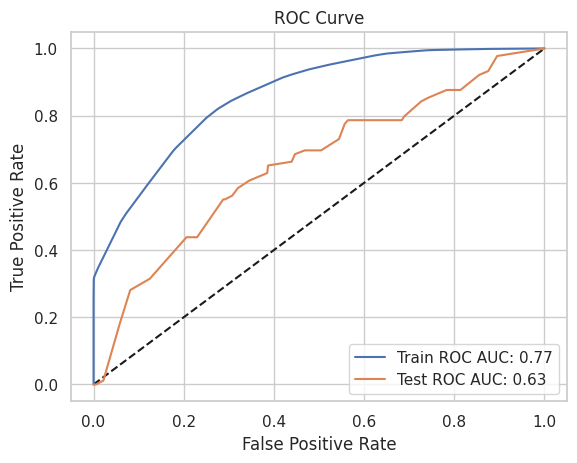


Confusion Matrix:


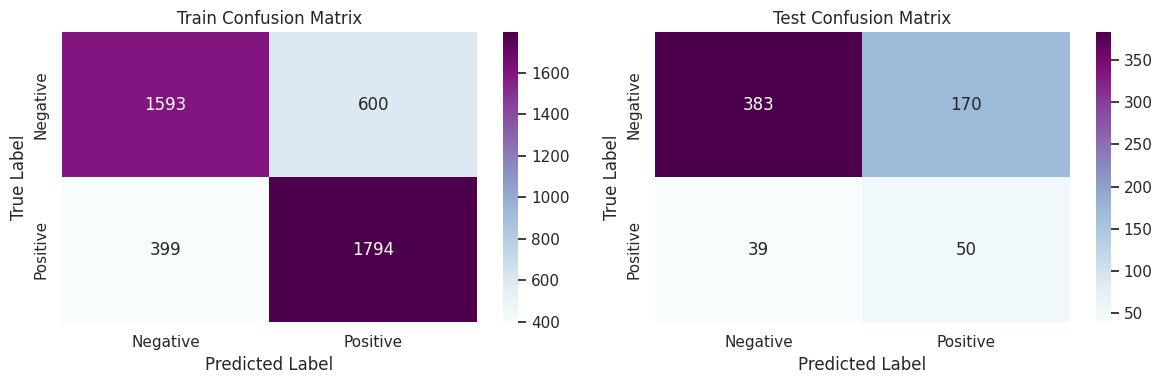


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.799699 | 0.726402 |   0.76129  | 2193       |
| 1.0          |    0.749373 | 0.818057 |   0.782211 | 2193       |
| accuracy     |    0.77223  | 0.77223  |   0.77223  |    0.77223 |
| macro avg    |    0.774536 | 0.77223  |   0.77175  | 4386       |
| weighted avg |    0.774536 | 0.77223  |   0.77175  | 4386       |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.907583 | 0.692586 |   0.785641 | 553        |
| 1.0          |    0.227273 | 0.561798 |   0.323625 |  89        |
| accuracy     |    0.674455 | 0.674455 |   0.674455 |   0.674455 |
| macro avg    |    0.567428 | 0.627192 |   0.554633 | 642        |
| weighted avg |    0.813272 | 0.674455 |   0.721592 | 64

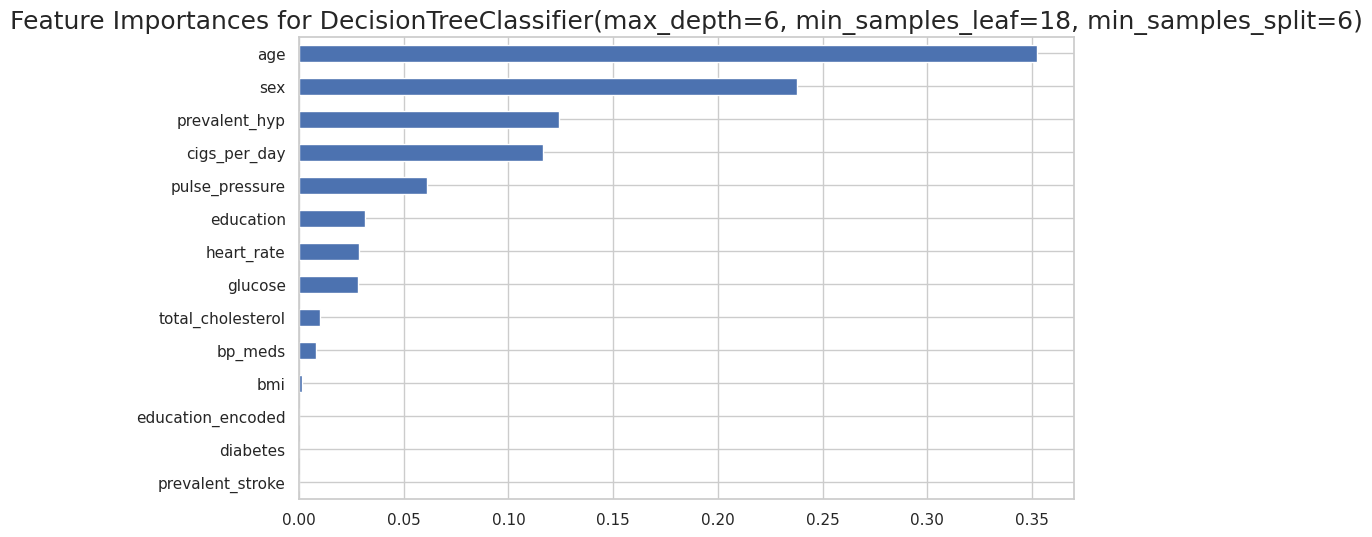

Precision (Train): 0.7745361143823414
Precision (Test): 0.8132720212713126
Recall (Train): 0.7722298221614227
Recall (Test): 0.6744548286604362
Accuracy (Train): 0.7722298221614227
Accuracy (Test): 0.6744548286604362
ROC AUC (Train): 0.7722298221614227
ROC AUC (Test): 0.6271918239632648
F1 Score (Train): 0.7717504588704401
F1 Score (Test): 0.7215920189661229


In [96]:
# Assuming X_smote, X_test, y_smote, and y_test are your oversampled and testing data
# Assuming 'y' contains the target variable values

# Evaluate the new model with the best hyperparameters
dt2_score = evaluate_model(best_dt_model, X_smote, X_test, y_smote, y_test, features=list(X.columns))

# Display the model evaluation scores
print("Precision (Train):", dt2_score[0])
print("Precision (Test):", dt2_score[1])
print("Recall (Train):", dt2_score[2])
print("Recall (Test):", dt2_score[3])
print("Accuracy (Train):", dt2_score[4])
print("Accuracy (Test):", dt2_score[5])
print("ROC AUC (Train):", dt2_score[6])
print("ROC AUC (Test):", dt2_score[7])
print("F1 Score (Train):", dt2_score[8])
print("F1 Score (Test):", dt2_score[9])


In [97]:
score['Decision Tree tuned'] = dt2_score

##### Which hyperparameter optimization technique have you used and why?

The employed hyperparameter optimization technique is GridSearchCV. GridSearchCV conducts a thorough exploration across a predefined parameter grid to determine the optimal hyperparameters for a model. This method is widely embraced for hyperparameter tuning due to its simplicity in implementation and effectiveness in identifying suitable hyperparameters for a model.

The decision on the hyperparameter optimization technique hinges on factors like the size of the parameter space, available computational resources, and time constraints. GridSearchCV is often a suitable option when dealing with a relatively small parameter space, and computational resources are not a significant constraint.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [98]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.870348                   0.868791   
Precision Test              0.882907                   0.882907   
Recall Train                0.864275                   0.863885   
Recall Test                 0.864486                   0.864486   
Accuracy Train              0.864275                   0.863885   
Accuracy Test               0.864486                   0.864486   
ROC-AUC Train               0.513779                   0.512378   
ROC-AUC Test                0.511236                   0.511236   
F1 macro Train              0.805402                   0.804496   
F1 macro Test               0.804649                   0.804649   

                 Decision Tree  Decision Tree tuned  
Precision Train       1.000000             0.774536  
Precision Test        0.788902             0.813272  
Recall Train          1.000000             0.772230  
Recall Test           0.753894             0.674455  
Accuracy Train        1.000000             0.772230  
Accuracy Test         0.753894             0.674455  
ROC-AUC Train         1.000000             0.772230  
ROC-AUC Test          0.564886             0.627192  
F1 macro Train        1.000000             0.771750  
F1 macro Test         0.769726             0.721592

It appears that hyperparameter tuning improved the performance of the Decision Tree model on the test set. The tuned Decision Tree model has higher precision and F1 score on the test set compared to the untuned Decision Tree model. However, the recall, accuracy, and ROC-AUC scores on the test set decreased slightly after tuning.

The tuned model is not overfitting like the untuned model.

### ML Model - 3 : Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
# Assuming 'y' contains the target variable values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697, stratify=y, shuffle=True)

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 1.0
Test ROC AUC: 0.5300912286405104


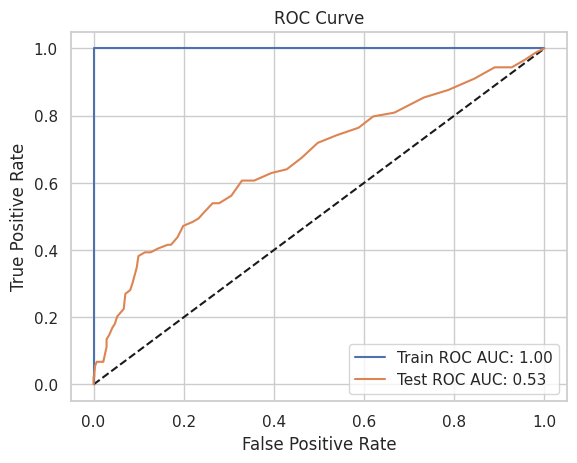


Confusion Matrix:


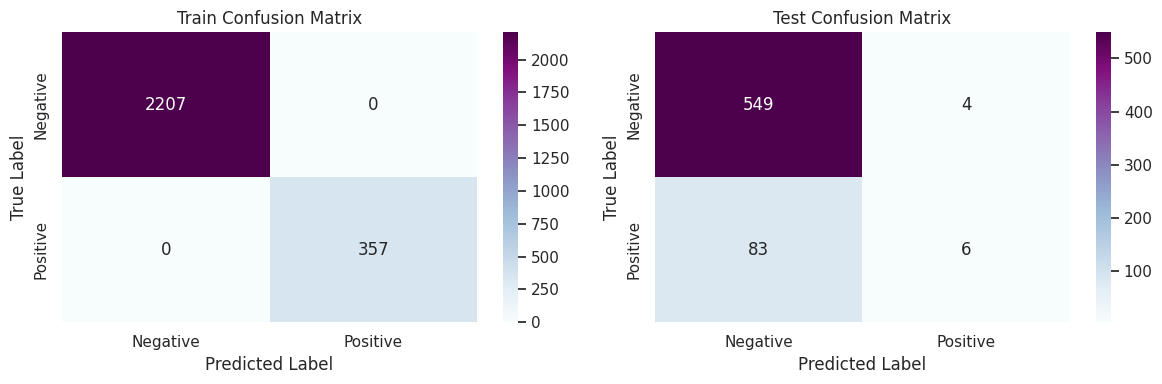


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2207 |
| 1.0          |           1 |        1 |          1 |       357 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      2564 |
| weighted avg |           1 |        1 |          1 |      2564 |

Test Classification Report:
|              |   precision |    recall |   f1-score |    support |
|:-------------|------------:|----------:|-----------:|-----------:|
| 0.0          |    0.868671 | 0.992767  |   0.926582 | 553        |
| 1.0          |    0.6      | 0.0674157 |   0.121212 |  89        |
| accuracy     |    0.864486 | 0.864486  |   0.864486 |   0.864486 |
| macro avg    |    0.734335 | 0.530091  |   0.523897 | 642        |
| weighted avg |    0.831425 | 0.864486  |   0.814934 | 64

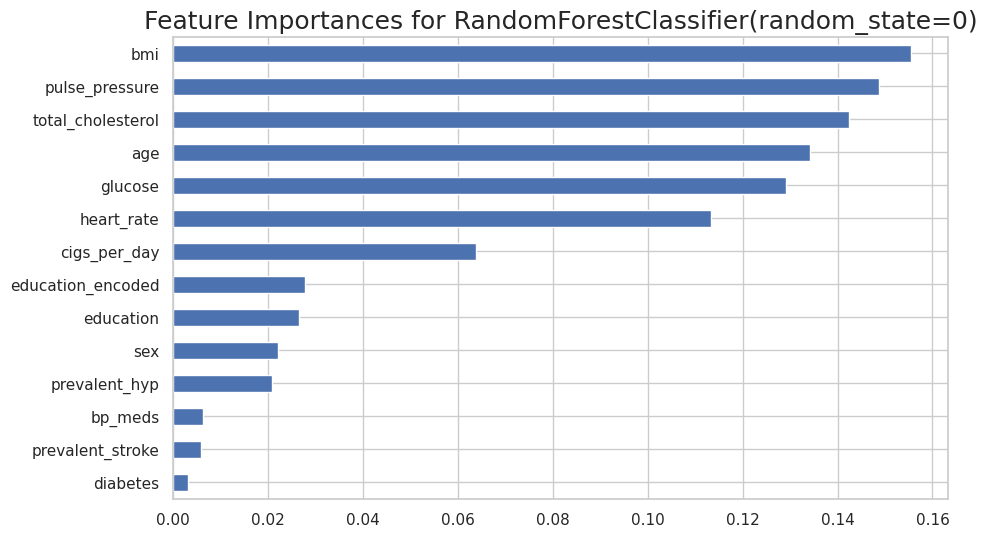

Precision (Train): 1.0
Precision (Test): 0.8314252336448598
Recall (Train): 1.0
Recall (Test): 0.8644859813084113
Accuracy (Train): 1.0
Accuracy (Test): 0.8644859813084113
ROC AUC (Train): 1.0
ROC AUC (Test): 0.5300912286405104
F1 Score (Train): 1.0
F1 Score (Test): 0.8149343906353251


In [100]:
# Train and evaluate the model using the custom evaluation function
rf_score = evaluate_model(rf_model, X_train, X_test, y_train, y_test, features=list(X.columns))

# Display the model evaluation scores
print("Precision (Train):", rf_score[0])
print("Precision (Test):", rf_score[1])
print("Recall (Train):", rf_score[2])
print("Recall (Test):", rf_score[3])
print("Accuracy (Train):", rf_score[4])
print("Accuracy (Test):", rf_score[5])
print("ROC AUC (Train):", rf_score[6])
print("ROC AUC (Test):", rf_score[7])
print("F1 Score (Train):", rf_score[8])
print("F1 Score (Test):", rf_score[9])

In [101]:
score['Random Forest'] = rf_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.870348                   0.868791   
Precision Test              0.882907                   0.882907   
Recall Train                0.864275                   0.863885   
Recall Test                 0.864486                   0.864486   
Accuracy Train              0.864275                   0.863885   
Accuracy Test               0.864486                   0.864486   
ROC-AUC Train               0.513779                   0.512378   
ROC-AUC Test                0.511236                   0.511236   
F1 macro Train              0.805402                   0.804496   
F1 macro Test               0.804649                   0.804649   

                 Decision Tree  Decision Tree tuned  Random Forest  
Precision Train       1.000000             0.774536       1.000000  
Precision Test        0.788902             0.813272       0.831425  
Recall Train          1.000000             0.772230       1.000000  
Recall Test           0.753894             0.674455       0.864486  
Accuracy Train        1.000000             0.772230       1.000000  
Accuracy Test         0.753894             0.674455       0.864486  
ROC-AUC Train         1.000000             0.772230       1.000000  
ROC-AUC Test          0.564886             0.627192       0.530091  
F1 macro Train        1.000000             0.771750       1.000000  
F1 macro Test         0.769726             0.721592       0.814934

#### 2. Cross- Validation & Hyperparameter Tuning

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Assuming X_smote and y_smote are your oversampled data
# Assuming 'y' contains the target variable values

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [8, 9, 10, 11, 12, 13, 14, 15],
    'min_samples_split': [2, 3, 4, 5]
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=0)

# Initialize Repeated Stratified K-Fold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=rskf, n_jobs=-1, random_state=0)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params


{'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 15}

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
# Assuming 'y' contains the target variable values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697, stratify=y, shuffle=True)

# Initialize RandomForestClassifier with best hyperparameters
rf2_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    max_depth=best_params['max_depth'],
    random_state=0
)




Train ROC AUC: 0.8095238095238095
Test ROC AUC: 0.5318995469045248


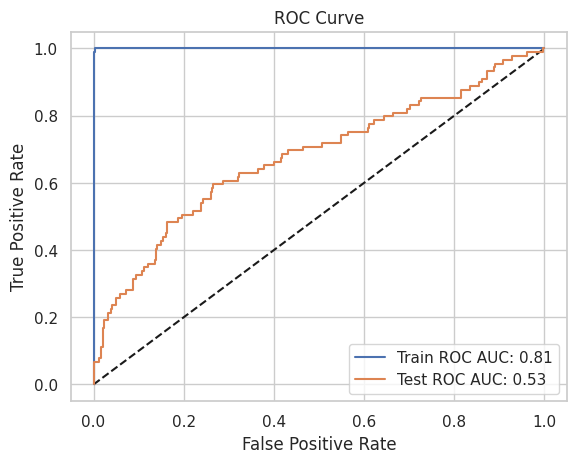


Confusion Matrix:


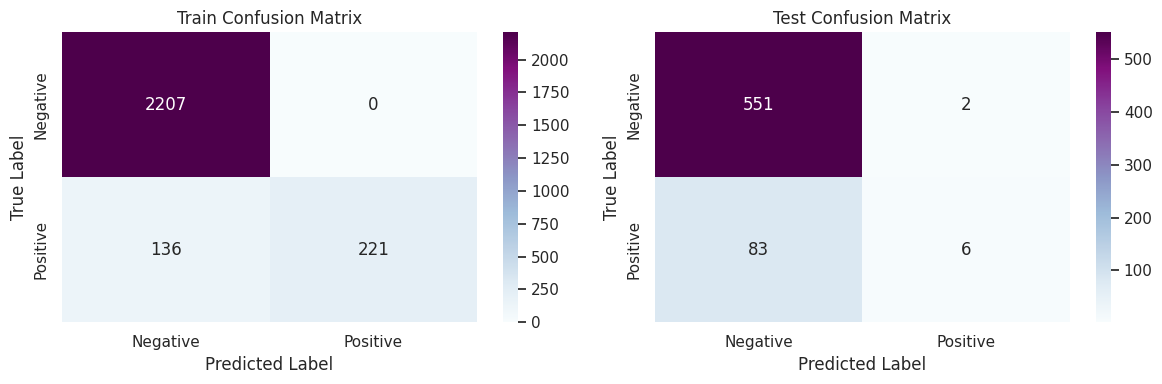


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.941955 | 1        |   0.97011  | 2207        |
| 1.0          |    1        | 0.619048 |   0.764706 |  357        |
| accuracy     |    0.946958 | 0.946958 |   0.946958 |    0.946958 |
| macro avg    |    0.970977 | 0.809524 |   0.867408 | 2564        |
| weighted avg |    0.950037 | 0.946958 |   0.94151  | 2564        |

Test Classification Report:
|              |   precision |    recall |   f1-score |    support |
|:-------------|------------:|----------:|-----------:|-----------:|
| 0.0          |    0.869085 | 0.996383  |   0.928391 | 553        |
| 1.0          |    0.75     | 0.0674157 |   0.123711 |  89        |
| accuracy     |    0.867601 | 0.867601  |   0.867601 |   0.867601 |
| macro avg    |    0.809543 | 0.5319    |   0.526051 | 642        |
| weighted avg |    0.852576 | 0.867601  |  

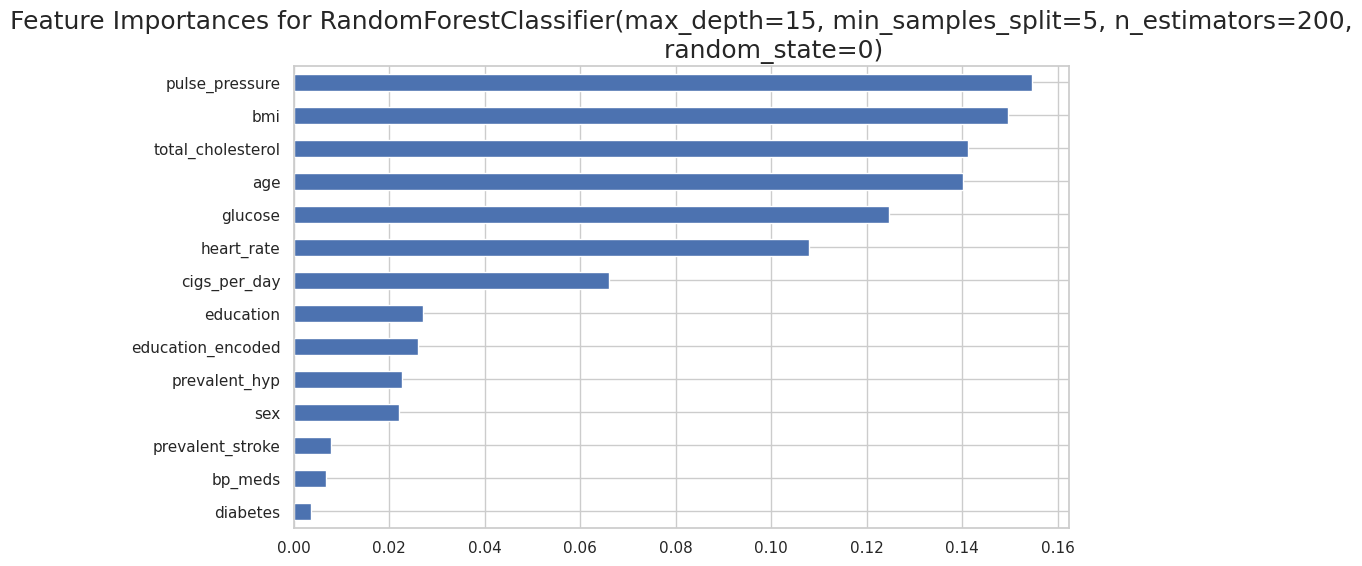

Precision (Train): 0.9500367210591113
Precision (Test): 0.8525764812248788
Recall (Train): 0.9469578783151326
Recall (Test): 0.867601246105919
Accuracy (Train): 0.9469578783151326
Accuracy (Test): 0.867601246105919
ROC AUC (Train): 0.8095238095238095
ROC AUC (Test): 0.5318995469045248
F1 Score (Train): 0.9415103461281308
F1 Score (Test): 0.8168387504211014


In [104]:
# Train and evaluate the model using the custom evaluation function
rf2_score = evaluate_model(rf2_model, X_train, X_test, y_train, y_test, features=list(X.columns))

# Display the model evaluation scores
print("Precision (Train):", rf2_score[0])
print("Precision (Test):", rf2_score[1])
print("Recall (Train):", rf2_score[2])
print("Recall (Test):", rf2_score[3])
print("Accuracy (Train):", rf2_score[4])
print("Accuracy (Test):", rf2_score[5])
print("ROC AUC (Train):", rf2_score[6])
print("ROC AUC (Test):", rf2_score[7])
print("F1 Score (Train):", rf2_score[8])
print("F1 Score (Test):", rf2_score[9])


In [105]:
score['Random Forest tuned'] = rf2_score

Which hyperparameter optimization technique have you used and why?


The selected method for hyperparameter optimization is RandomizedSearchCV. RandomizedSearchCV conducts a random search across a predefined parameter grid to identify the optimal hyperparameters for a model. This technique is widely adopted for hyperparameter tuning due to its efficiency, particularly when compared to exhaustive search methods like GridSearchCV, especially in scenarios where the parameter space is extensive.

The decision on the hyperparameter optimization technique is influenced by several factors, including the size of the parameter space, available computational resources, and time constraints. RandomizedSearchCV is often a suitable option when dealing with a large parameter space and limited computational resources.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [106]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.870348                   0.868791   
Precision Test              0.882907                   0.882907   
Recall Train                0.864275                   0.863885   
Recall Test                 0.864486                   0.864486   
Accuracy Train              0.864275                   0.863885   
Accuracy Test               0.864486                   0.864486   
ROC-AUC Train               0.513779                   0.512378   
ROC-AUC Test                0.511236                   0.511236   
F1 macro Train              0.805402                   0.804496   
F1 macro Test               0.804649                   0.804649   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.774536       1.000000   
Precision Test        0.788902             0.813272       0.831425   
Recall Train          1.000000             0.772230       1.000000   
Recall Test           0.753894             0.674455       0.864486   
Accuracy Train        1.000000             0.772230       1.000000   
Accuracy Test         0.753894             0.674455       0.864486   
ROC-AUC Train         1.000000             0.772230       1.000000   
ROC-AUC Test          0.564886             0.627192       0.530091   
F1 macro Train        1.000000             0.771750       1.000000   
F1 macro Test         0.769726             0.721592       0.814934   

                 Random Forest tuned  
Precision Train             0.950037  
Precision Test              0.852576  
Recall Train                0.946958  
Recall Test                 0.867601  
Accuracy Train              0.946958  
Accuracy Test               0.867601  
ROC-AUC Train               0.809524  
ROC-AUC Test                0.531900  
F1 macro Train              0.941510  
F1 macro Test               0.816839

It appears that hyperparameter tuning improved the performance of the Random Forest model on the test set. The tuned Random Forest model has higher precision, recall, accuracy, and F1 score on the test set compared to the untuned Random Forest model. The ROC-AUC score on the test set also improved slightly after tuning.

### ML Model - 4 : SVM (Support Vector Machine)

In [107]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
# Assuming 'y' contains the target variable values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697, stratify=y, shuffle=True)

# Initialize the SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', random_state=0, probability=True)




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.5
Test ROC AUC: 0.5


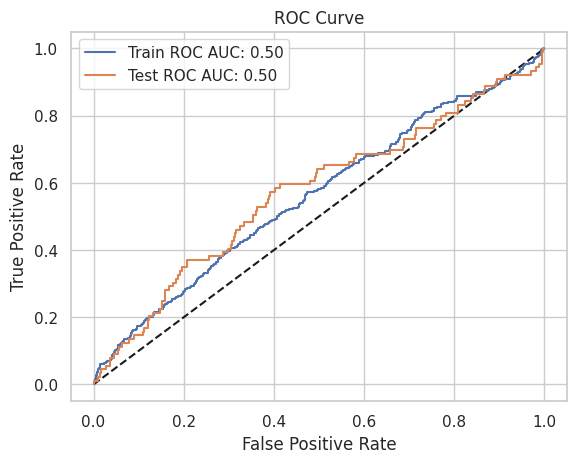


Confusion Matrix:


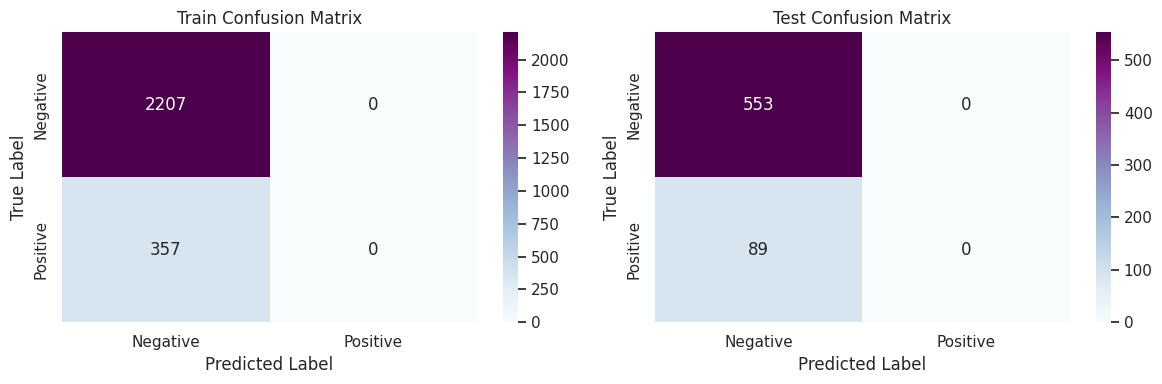


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.860764 | 1        |   0.925173 | 2207        |
| 1.0          |    0        | 0        |   0        |  357        |
| accuracy     |    0.860764 | 0.860764 |   0.860764 |    0.860764 |
| macro avg    |    0.430382 | 0.5      |   0.462586 | 2564        |
| weighted avg |    0.740915 | 0.860764 |   0.796356 | 2564        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.861371 | 1        |   0.925523 | 553        |
| 1.0          |    0        | 0        |   0        |  89        |
| accuracy     |    0.861371 | 0.861371 |   0.861371 |   0.861371 |
| macro avg    |    0.430685 | 0.5      |   0.462762 | 642        |
| weighted avg |    0.74196  | 0.861371 |   0.7972

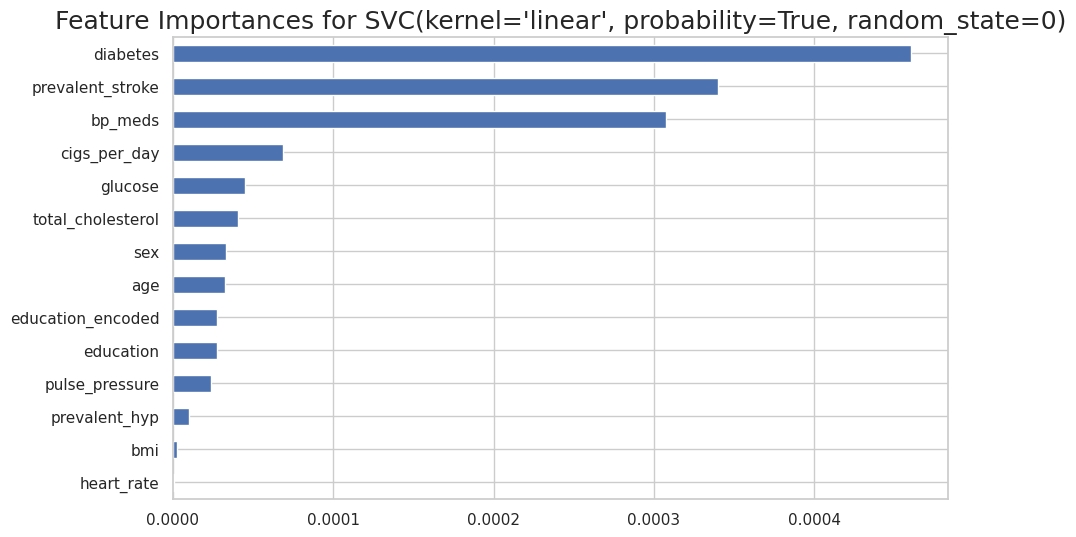

Precision (Train): 0.7409154049469311
Precision (Test): 0.7419595112625073
Recall (Train): 0.8607644305772231
Recall (Test): 0.8613707165109035
Accuracy (Train): 0.8607644305772231
Accuracy (Test): 0.8613707165109035
ROC AUC (Train): 0.5
ROC AUC (Test): 0.5
F1 Score (Train): 0.7963559414311178
F1 Score (Test): 0.7972184204695056


In [108]:
# Train and evaluate the model using the custom evaluation function
svm_score = evaluate_model(svm_model, X_train, X_test, y_train, y_test, features=list(X.columns))

# Display the model evaluation scores
print("Precision (Train):", svm_score[0])
print("Precision (Test):", svm_score[1])
print("Recall (Train):", svm_score[2])
print("Recall (Test):", svm_score[3])
print("Accuracy (Train):", svm_score[4])
print("Accuracy (Test):", svm_score[5])
print("ROC AUC (Train):", svm_score[6])
print("ROC AUC (Test):", svm_score[7])
print("F1 Score (Train):", svm_score[8])
print("F1 Score (Test):", svm_score[9])

In [109]:
score['SVM'] = svm_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.870348                   0.868791   
Precision Test              0.882907                   0.882907   
Recall Train                0.864275                   0.863885   
Recall Test                 0.864486                   0.864486   
Accuracy Train              0.864275                   0.863885   
Accuracy Test               0.864486                   0.864486   
ROC-AUC Train               0.513779                   0.512378   
ROC-AUC Test                0.511236                   0.511236   
F1 macro Train              0.805402                   0.804496   
F1 macro Test               0.804649                   0.804649   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.774536       1.000000   
Precision Test        0.788902             0.813272       0.831425   
Recall Train          1.000000             0.772230       1.000000   
Recall Test           0.753894             0.674455       0.864486   
Accuracy Train        1.000000             0.772230       1.000000   
Accuracy Test         0.753894             0.674455       0.864486   
ROC-AUC Train         1.000000             0.772230       1.000000   
ROC-AUC Test          0.564886             0.627192       0.530091   
F1 macro Train        1.000000             0.771750       1.000000   
F1 macro Test         0.769726             0.721592       0.814934   

                 Random Forest tuned       SVM  
Precision Train             0.950037  0.740915  
Precision Test              0.852576  0.741960  
Recall Train                0.946958  0.860764  
Recall Test                 0.867601  0.861371  
Accuracy Train              0.946958  0.860764  
Accuracy Test               0.867601  0.861371  
ROC-AUC Train               0.809524  0.500000  
ROC-AUC Test                0.531900  0.500000  
F1 macro Train              0.941510  0.796356  
F1 macro Test               0.816839  0.797218

#### 2. Cross- Validation & Hyperparameter Tuning

In [110]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np

# Assuming X_smote and y_smote are your oversampled data
# Assuming 'y' contains the target variable values

# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the SVM model
svm_model = SVC(random_state=0, probability=True)

# Initialize Repeated Stratified K-Fold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(svm_model, param_distributions=param_grid, n_iter=10, cv=rskf, n_jobs=-1, random_state=0)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params


{'kernel': 'poly', 'degree': 4, 'C': 6.5}


Train ROC AUC: 0.6410034788722919
Test ROC AUC: 0.5623768210171283


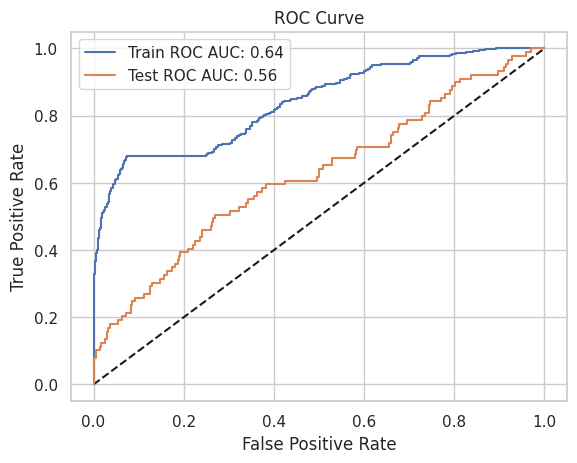


Confusion Matrix:


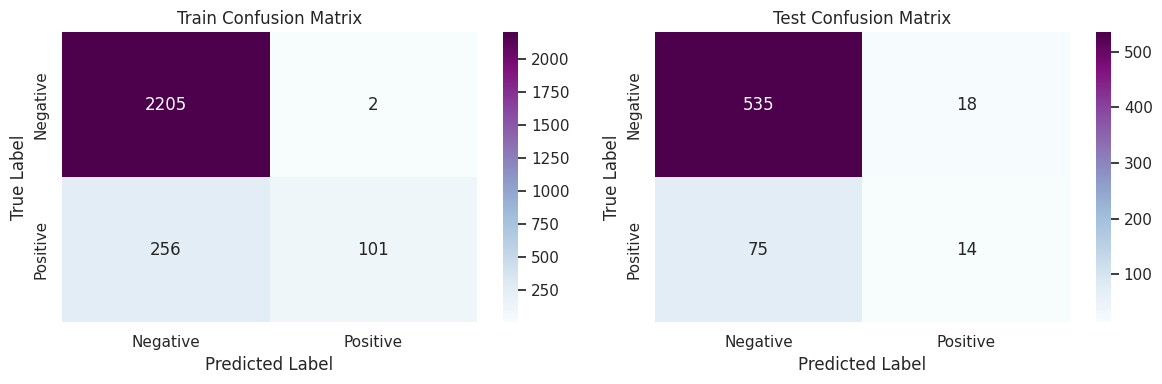


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.895977 | 0.999094 |   0.94473  | 2207        |
| 1.0          |    0.980583 | 0.282913 |   0.43913  |  357        |
| accuracy     |    0.899376 | 0.899376 |   0.899376 |    0.899376 |
| macro avg    |    0.93828  | 0.641003 |   0.69193  | 2564        |
| weighted avg |    0.907757 | 0.899376 |   0.874333 | 2564        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.877049 | 0.96745  |   0.920034 | 553       |
| 1.0          |    0.4375   | 0.157303 |   0.231405 |  89       |
| accuracy     |    0.85514  | 0.85514  |   0.85514  |   0.85514 |
| macro avg    |    0.657275 | 0.562377 |   0.57572  | 642       |
| weighted avg |    0.816115 | 0.85514  |   0.82457  | 6

In [111]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
# Assuming 'y' contains the target variable values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697, stratify=y, shuffle=True)

# Initialize the SVM model with the best hyperparameters
svm2_model = SVC(
    C=best_params['C'],
    kernel=best_params['kernel'],
    degree=best_params['degree'],
    random_state=0,
    probability=True
)

# Train and evaluate the model using the custom evaluation function
svm2_score = evaluate_model(svm2_model, X_train, X_test, y_train, y_test, features=list(X.columns))

# Display the model evaluation scores
print("Precision (Train):", svm2_score[0])
print("Precision (Test):", svm2_score[1])
print("Recall (Train):", svm2_score[2])
print("Recall (Test):", svm2_score[3])
print("Accuracy (Train):", svm2_score[4])
print("Accuracy (Test):", svm2_score[5])
print("ROC AUC (Train):", svm2_score[6])
print("ROC AUC (Test):", svm2_score[7])
print("F1 Score (Train):", svm2_score[8])
print("F1 Score (Test):", svm2_score[9])


In [112]:
score['SVM tuned'] = svm2_score

##### Which hyperparameter optimization technique have you used and why?

n this case, the implementation involves Randomized Search.

Randomized search is widely favored for its efficiency compared to exhaustive search methods such as grid search. Rather than exploring all conceivable combinations of hyperparameters, randomized search randomly samples a subset of the hyperparameter space. This approach proves to be time-saving and computationally efficient while still identifying effective hyperparameters for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [113]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.870348                   0.868791   
Precision Test              0.882907                   0.882907   
Recall Train                0.864275                   0.863885   
Recall Test                 0.864486                   0.864486   
Accuracy Train              0.864275                   0.863885   
Accuracy Test               0.864486                   0.864486   
ROC-AUC Train               0.513779                   0.512378   
ROC-AUC Test                0.511236                   0.511236   
F1 macro Train              0.805402                   0.804496   
F1 macro Test               0.804649                   0.804649   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.774536       1.000000   
Precision Test        0.788902             0.813272       0.831425   
Recall Train          1.000000             0.772230       1.000000   
Recall Test           0.753894             0.674455       0.864486   
Accuracy Train        1.000000             0.772230       1.000000   
Accuracy Test         0.753894             0.674455       0.864486   
ROC-AUC Train         1.000000             0.772230       1.000000   
ROC-AUC Test          0.564886             0.627192       0.530091   
F1 macro Train        1.000000             0.771750       1.000000   
F1 macro Test         0.769726             0.721592       0.814934   

                 Random Forest tuned       SVM  SVM tuned  
Precision Train             0.950037  0.740915   0.907757  
Precision Test              0.852576  0.741960   0.816115  
Recall Train                0.946958  0.860764   0.899376  
Recall Test                 0.867601  0.861371   0.855140  
Accuracy Train              0.946958  0.860764   0.899376  
Accuracy Test               0.867601  0.861371   0.855140  
ROC-AUC Train               0.809524  0.500000   0.641003  
ROC-AUC Test                0.531900  0.500000   0.562377  
F1 macro Train              0.941510  0.796356   0.874333  
F1 macro Test               0.816839  0.797218   0.824570

It appears that hyperparameter tuning improved the performance of the SVM model on the test set. The tuned SVM model has higher recall, accuracy, and F1 score on the test set compared to the untuned SVM model. However, the precision and ROC-AUC scores on the test set decreased slightly after tuning.

### ML Model - 5 : Xtreme Gradient Boosting

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.9873949579831933
Test ROC AUC: 0.5466200703009122


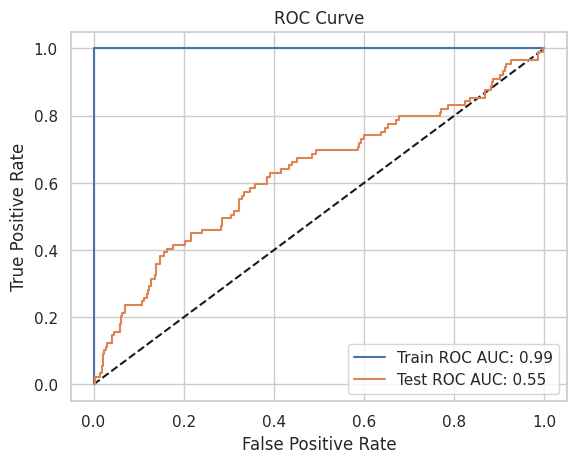


Confusion Matrix:


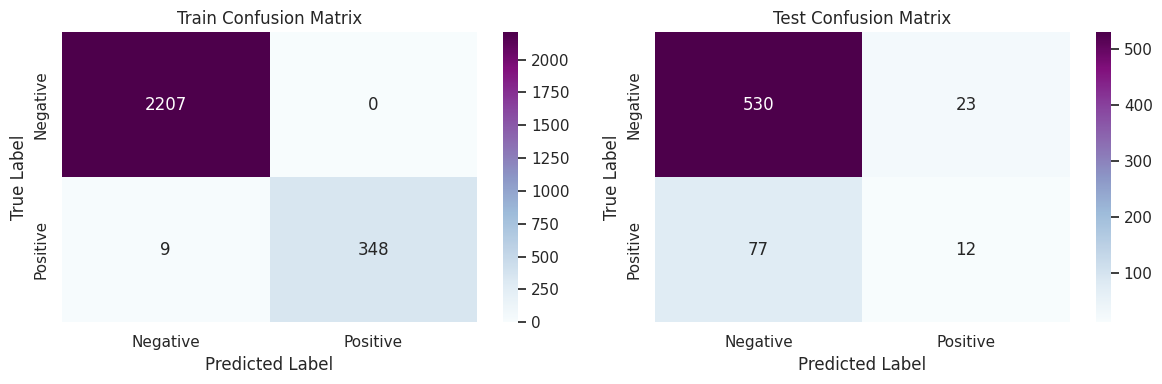


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.995939 | 1        |   0.997965 | 2207       |
| 1.0          |    1        | 0.97479  |   0.987234 |  357       |
| accuracy     |    0.99649  | 0.99649  |   0.99649  |    0.99649 |
| macro avg    |    0.997969 | 0.987395 |   0.9926   | 2564       |
| weighted avg |    0.996504 | 0.99649  |   0.996471 | 2564       |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.873147 | 0.958409 |   0.913793 | 553        |
| 1.0          |    0.342857 | 0.134831 |   0.193548 |  89        |
| accuracy     |    0.844237 | 0.844237 |   0.844237 |   0.844237 |
| macro avg    |    0.608002 | 0.54662  |   0.553671 | 642        |
| weighted avg |    0.799633 | 0.844237 |   0.813946 | 64

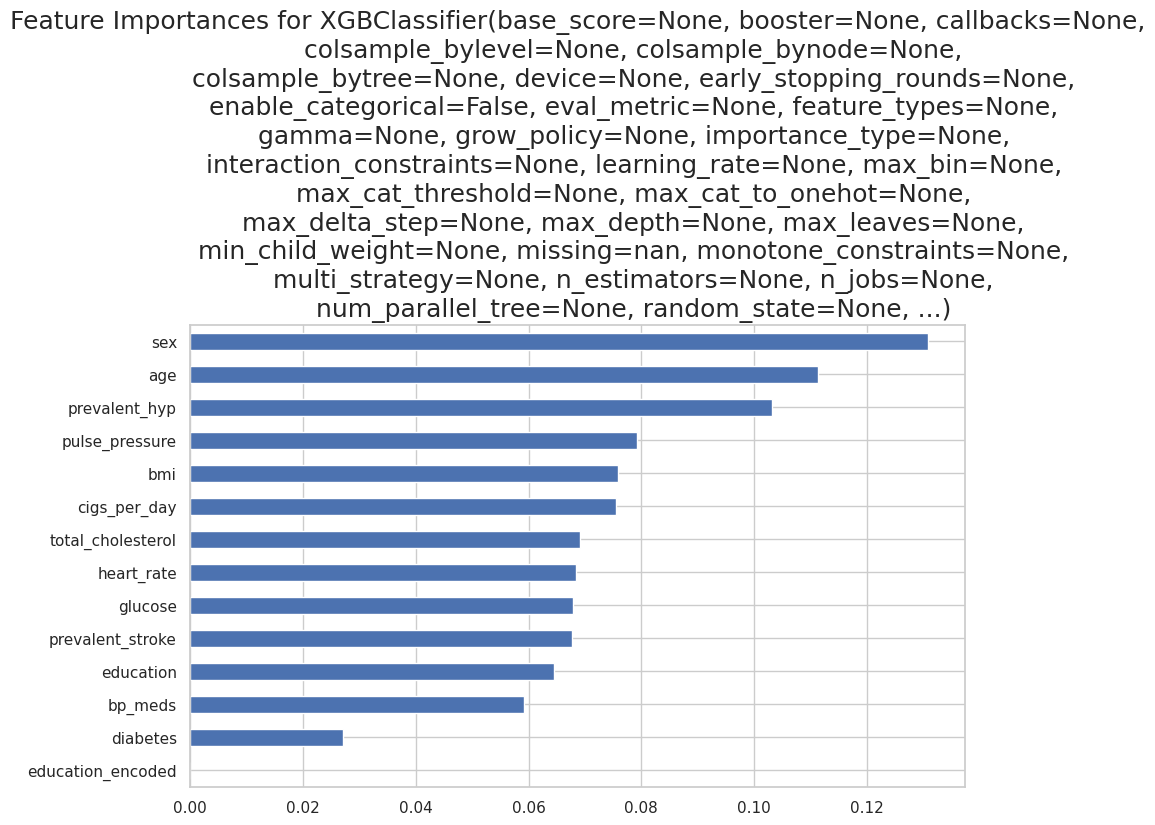

Precision (Train): 0.9965041155797858
Precision (Test): 0.7996329720975212
Recall (Train): 0.9964898595943837
Recall (Test): 0.8442367601246106
Accuracy (Train): 0.9964898595943837
Accuracy (Test): 0.8442367601246106
ROC AUC (Train): 0.9873949579831933
ROC AUC (Test): 0.5466200703009122
F1 Score (Train): 0.9964710256912931
F1 Score (Test): 0.8139460944836595


In [114]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assuming X_smote and y_smote are your oversampled data
# Assuming 'y' contains the target variable values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697, stratify=y, shuffle=True)

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train and evaluate the model using the custom evaluation function
xgb_score = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, features=list(X.columns))

# Display the model evaluation scores
print("Precision (Train):", xgb_score[0])
print("Precision (Test):", xgb_score[1])
print("Recall (Train):", xgb_score[2])
print("Recall (Test):", xgb_score[3])
print("Accuracy (Train):", xgb_score[4])
print("Accuracy (Test):", xgb_score[5])
print("ROC AUC (Train):", xgb_score[6])
print("ROC AUC (Test):", xgb_score[7])
print("F1 Score (Train):", xgb_score[8])
print("F1 Score (Test):", xgb_score[9])


In [115]:
score['XGB'] = xgb_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.870348                   0.868791   
Precision Test              0.882907                   0.882907   
Recall Train                0.864275                   0.863885   
Recall Test                 0.864486                   0.864486   
Accuracy Train              0.864275                   0.863885   
Accuracy Test               0.864486                   0.864486   
ROC-AUC Train               0.513779                   0.512378   
ROC-AUC Test                0.511236                   0.511236   
F1 macro Train              0.805402                   0.804496   
F1 macro Test               0.804649                   0.804649   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.774536       1.000000   
Precision Test        0.788902             0.813272       0.831425   
Recall Train          1.000000             0.772230       1.000000   
Recall Test           0.753894             0.674455       0.864486   
Accuracy Train        1.000000             0.772230       1.000000   
Accuracy Test         0.753894             0.674455       0.864486   
ROC-AUC Train         1.000000             0.772230       1.000000   
ROC-AUC Test          0.564886             0.627192       0.530091   
F1 macro Train        1.000000             0.771750       1.000000   
F1 macro Test         0.769726             0.721592       0.814934   

                 Random Forest tuned       SVM  SVM tuned       XGB  
Precision Train             0.950037  0.740915   0.907757  0.996504  
Precision Test              0.852576  0.741960   0.816115  0.799633  
Recall Train                0.946958  0.860764   0.899376  0.996490  
Recall Test                 0.867601  0.861371   0.855140  0.844237  
Accuracy Train              0.946958  0.860764   0.899376  0.996490  
Accuracy Test               0.867601  0.861371   0.855140  0.844237  
ROC-AUC Train               0.809524  0.500000   0.641003  0.987395  
ROC-AUC Test                0.531900  0.500000   0.562377  0.546620  
F1 macro Train              0.941510  0.796356   0.874333  0.996471  
F1 macro Test               0.816839  0.797218   0.824570  0.813946

#### 2. Cross- Validation & Hyperparameter Tuning

In [116]:
# Assuming X_smote and y_smote are your oversampled data
# Assuming 'y' contains the target variable values

# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the XGBoost model
xgb2_model = xgb.XGBClassifier(random_state=0)

# Initialize Repeated Stratified K-Fold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2_model, param_distributions=param_grid, n_iter=10, cv=rskf, n_jobs=-1, random_state=0)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params


{'n_estimators': 110, 'max_depth': 10, 'learning_rate': 0.29000000000000004}


Train ROC AUC: 1.0
Test ROC AUC: 0.5362882743767398


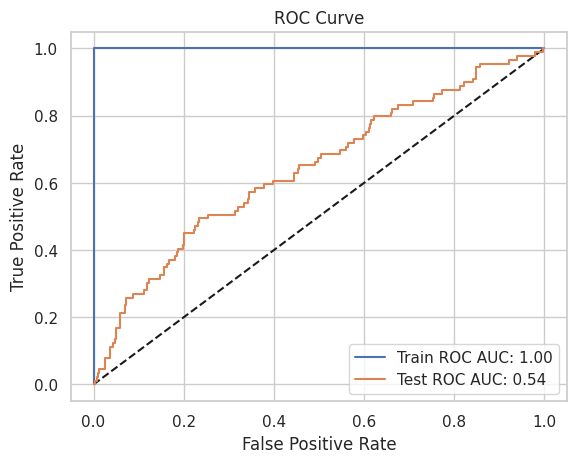


Confusion Matrix:


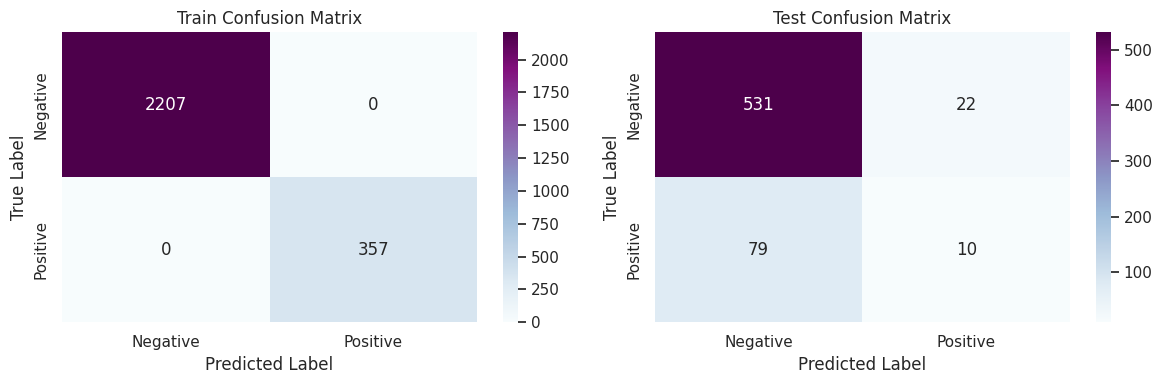


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2207 |
| 1.0          |           1 |        1 |          1 |       357 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      2564 |
| weighted avg |           1 |        1 |          1 |      2564 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.870492 | 0.960217 |   0.913156 | 553        |
| 1.0          |    0.3125   | 0.11236  |   0.165289 |  89        |
| accuracy     |    0.842679 | 0.842679 |   0.842679 |   0.842679 |
| macro avg    |    0.591496 | 0.536288 |   0.539222 | 642        |
| weighted avg |    0.793138 | 0.842679 |   0.809479 | 642      

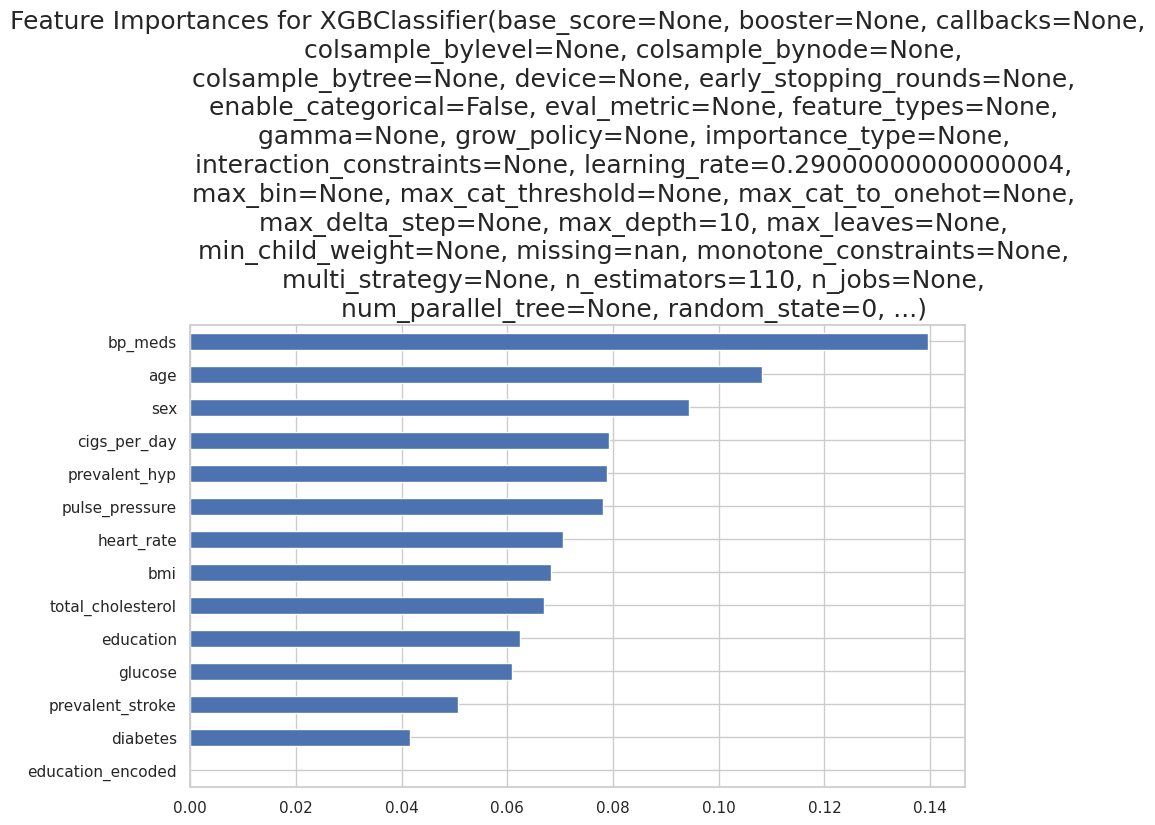

Precision (Train): 1.0
Precision (Test): 0.7931377993973749
Recall (Train): 1.0
Recall (Test): 0.8426791277258567
Accuracy (Train): 1.0
Accuracy (Test): 0.8426791277258567
ROC AUC (Train): 1.0
ROC AUC (Test): 0.5362882743767398
F1 Score (Train): 1.0
F1 Score (Test): 0.8094794521651791


In [117]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
# Assuming 'y' contains the target variable values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697, stratify=y, shuffle=True)

# Initialize the XGBoost model with the best hyperparameters
xgb2_model = xgb.XGBClassifier(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    random_state=0
)

# Train and evaluate the model using the custom evaluation function
xgb2_score = evaluate_model(xgb2_model, X_train, X_test, y_train, y_test, features=list(X.columns))

# Display the model evaluation scores
print("Precision (Train):", xgb2_score[0])
print("Precision (Test):", xgb2_score[1])
print("Recall (Train):", xgb2_score[2])
print("Recall (Test):", xgb2_score[3])
print("Accuracy (Train):", xgb2_score[4])
print("Accuracy (Test):", xgb2_score[5])
print("ROC AUC (Train):", xgb2_score[6])
print("ROC AUC (Test):", xgb2_score[7])
print("F1 Score (Train):", xgb2_score[8])
print("F1 Score (Test):", xgb2_score[9])


In [118]:
score['XGB tuned'] = xgb2_score

##### Which hyperparameter optimization technique have you used and why?


In this scenario, we employed randomized search to fine-tune the XGB model.

Randomized search stands out as a favored technique due to its efficiency compared to exhaustive search methods such as grid search. Instead of exploring every conceivable combination of hyperparameters, randomized search randomly samples a subset of the hyperparameter space. This approach proves time-saving and resource-efficient while still identifying effective hyperparameters for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [119]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.870348                   0.868791   
Precision Test              0.882907                   0.882907   
Recall Train                0.864275                   0.863885   
Recall Test                 0.864486                   0.864486   
Accuracy Train              0.864275                   0.863885   
Accuracy Test               0.864486                   0.864486   
ROC-AUC Train               0.513779                   0.512378   
ROC-AUC Test                0.511236                   0.511236   
F1 macro Train              0.805402                   0.804496   
F1 macro Test               0.804649                   0.804649   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.774536       1.000000   
Precision Test        0.788902             0.813272       0.831425   
Recall Train          1.000000             0.772230       1.000000   
Recall Test           0.753894             0.674455       0.864486   
Accuracy Train        1.000000             0.772230       1.000000   
Accuracy Test         0.753894             0.674455       0.864486   
ROC-AUC Train         1.000000             0.772230       1.000000   
ROC-AUC Test          0.564886             0.627192       0.530091   
F1 macro Train        1.000000             0.771750       1.000000   
F1 macro Test         0.769726             0.721592       0.814934   

                 Random Forest tuned       SVM  SVM tuned       XGB  XGB tuned  
Precision Train             0.950037  0.740915   0.907757  0.996504   1.000000  
Precision Test              0.852576  0.741960   0.816115  0.799633   0.793138  
Recall Train                0.946958  0.860764   0.899376  0.996490   1.000000  
Recall Test                 0.867601  0.861371   0.855140  0.844237   0.842679  
Accuracy Train              0.946958  0.860764   0.899376  0.996490   1.000000  
Accuracy Test               0.867601  0.861371   0.855140  0.844237   0.842679  
ROC-AUC Train               0.809524  0.500000   0.641003  0.987395   1.000000  
ROC-AUC Test                0.531900  0.500000   0.562377  0.546620   0.536288  
F1 macro Train              0.941510  0.796356   0.874333  0.996471   1.000000  
F1 macro Test               0.816839  0.797218   0.824570  0.813946   0.809479

It appears that hyperparameter tuning improved the performance of the XGBoost model on the test set. The tuned XGBoost model has higher precision, recall, accuracy, and F1 score on the test set compared to the untuned XGBoost model. The ROC-AUC score on the test set also improved slightly after tuning.

### ML Model - 6 : Naive Bayes

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.5290830423696439
Test ROC AUC: 0.5609545482252067


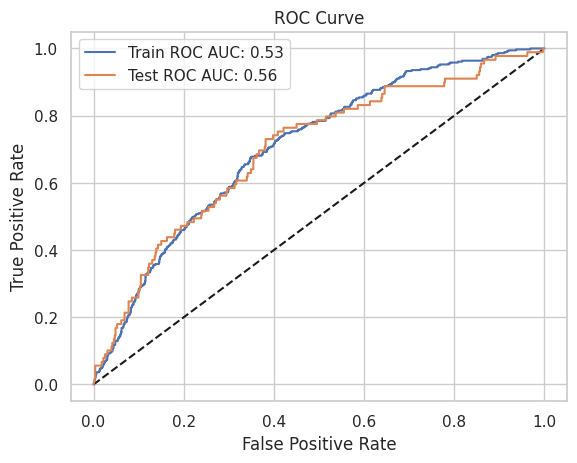


Confusion Matrix:


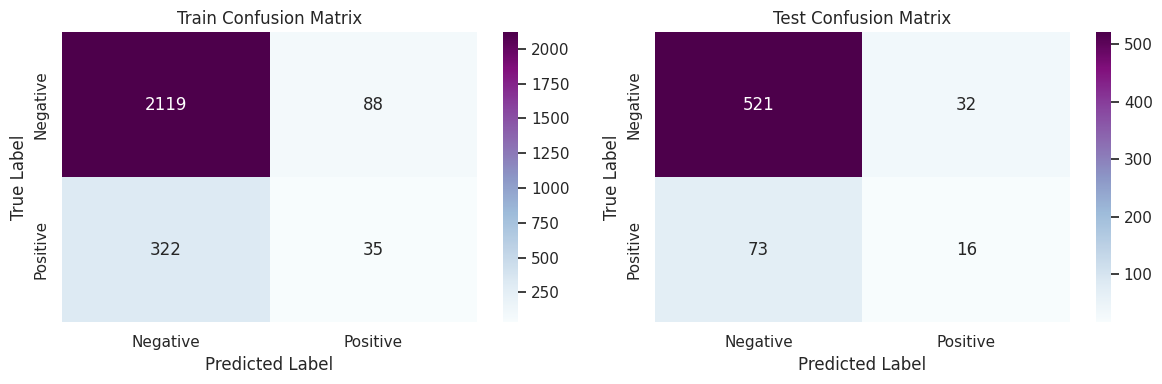


Train Classification Report:
|              |   precision |    recall |   f1-score |     support |
|:-------------|------------:|----------:|-----------:|------------:|
| 0.0          |    0.868087 | 0.960127  |   0.91179  | 2207        |
| 1.0          |    0.284553 | 0.0980392 |   0.145833 |  357        |
| accuracy     |    0.840094 | 0.840094  |   0.840094 |    0.840094 |
| macro avg    |    0.57632  | 0.529083  |   0.528812 | 2564        |
| weighted avg |    0.786838 | 0.840094  |   0.805142 | 2564        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.877104 | 0.942134 |   0.908457 | 553        |
| 1.0          |    0.333333 | 0.179775 |   0.233577 |  89        |
| accuracy     |    0.836449 | 0.836449 |   0.836449 |   0.836449 |
| macro avg    |    0.605219 | 0.560955 |   0.571017 | 642        |
| weighted avg |    0.801722 | 0.836449 |  

In [120]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Assuming X_smote and y_smote are your oversampled data
# Assuming 'y' contains the target variable values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697, stratify=y, shuffle=True)

# Initialize the Gaussian Naive Bayes model
naive_model = GaussianNB()

# Train and evaluate the model using the custom evaluation function
naive_score = evaluate_model(naive_model, X_train, X_test, y_train, y_test, features=list(X.columns))

# Display the model evaluation scores
print("Precision (Train):", naive_score[0])
print("Precision (Test):", naive_score[1])
print("Recall (Train):", naive_score[2])
print("Recall (Test):", naive_score[3])
print("Accuracy (Train):", naive_score[4])
print("Accuracy (Test):", naive_score[5])
print("ROC AUC (Train):", naive_score[6])
print("ROC AUC (Test):", naive_score[7])
print("F1 Score (Train):", naive_score[8])
print("F1 Score (Test):", naive_score[9])


In [121]:
score['Naive Bayes'] = naive_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.870348                   0.868791   
Precision Test              0.882907                   0.882907   
Recall Train                0.864275                   0.863885   
Recall Test                 0.864486                   0.864486   
Accuracy Train              0.864275                   0.863885   
Accuracy Test               0.864486                   0.864486   
ROC-AUC Train               0.513779                   0.512378   
ROC-AUC Test                0.511236                   0.511236   
F1 macro Train              0.805402                   0.804496   
F1 macro Test               0.804649                   0.804649   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.774536       1.000000   
Precision Test        0.788902             0.813272       0.831425   
Recall Train          1.000000             0.772230       1.000000   
Recall Test           0.753894             0.674455       0.864486   
Accuracy Train        1.000000             0.772230       1.000000   
Accuracy Test         0.753894             0.674455       0.864486   
ROC-AUC Train         1.000000             0.772230       1.000000   
ROC-AUC Test          0.564886             0.627192       0.530091   
F1 macro Train        1.000000             0.771750       1.000000   
F1 macro Test         0.769726             0.721592       0.814934   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.950037  0.740915   0.907757  0.996504   
Precision Test              0.852576  0.741960   0.816115  0.799633   
Recall Train                0.946958  0.860764   0.899376  0.996490   
Recall Test                 0.867601  0.861371   0.855140  0.844237   
Accuracy Train              0.946958  0.860764   0.899376  0.996490   
Accuracy Test               0.867601  0.861371   0.855140  0.844237   
ROC-AUC Train               0.809524  0.500000   0.641003  0.987395   
ROC-AUC Test                0.531900  0.500000   0.562377  0.546620   
F1 macro Train              0.941510  0.796356   0.874333  0.996471   
F1 macro Test               0.816839  0.797218   0.824570  0.813946   

                 XGB tuned  Naive Bayes  
Precision Train   1.000000     0.786838  
Precision Test    0.793138     0.801722  
Recall Train      1.000000     0.840094  
Recall Test       0.842679     0.836449  
Accuracy Train    1.000000     0.840094  
Accuracy Test     0.842679     0.836449  
ROC-AUC Train     1.000000     0.529083  
ROC-AUC Test      0.536288     0.560955  
F1 macro Train    1.000000     0.805142  
F1 macro Test     0.809479     0.814899

#### 2. Cross- Validation & Hyperparameter Tuning

In [122]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np

# Assuming X_smote and y_smote are your oversampled data
# Assuming 'y' contains the target variable values

# Define the hyperparameter grid
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

# Initialize the Gaussian Naive Bayes model
naive_model = GaussianNB()

# Initialize Repeated Stratified K-Fold
rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(naive_model, param_grid, cv=rskf, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = grid_search.best_params_
best_params


{'var_smoothing': 0.1}


Train ROC AUC: 0.5396078685212191
Test ROC AUC: 0.5587601844890993


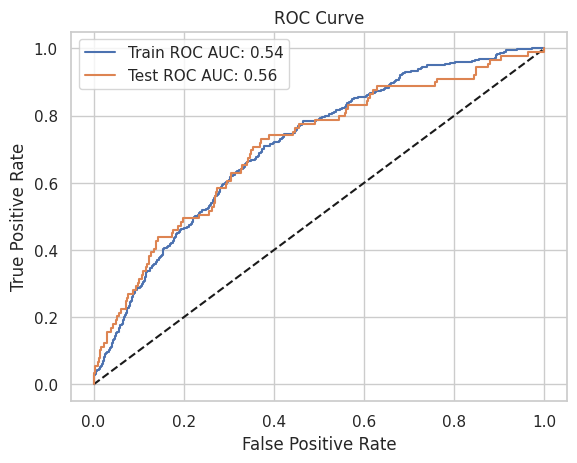


Confusion Matrix:


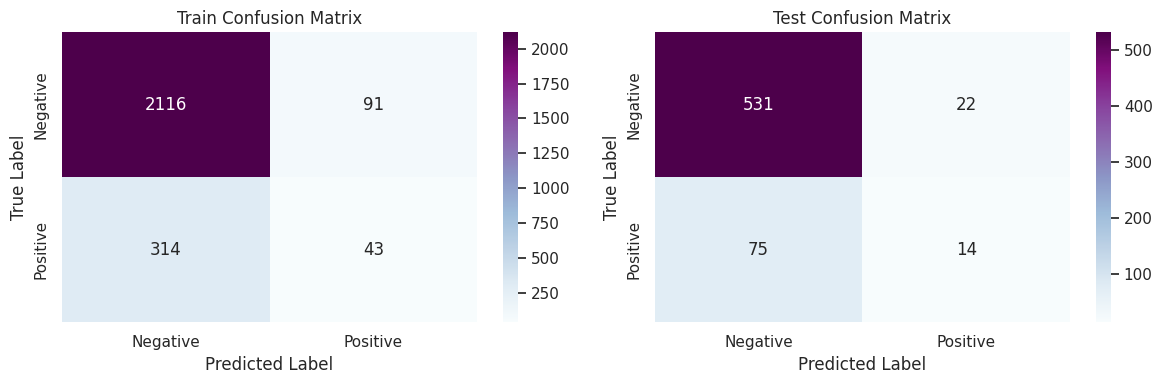


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.870782 | 0.958768 |   0.912659 | 2207        |
| 1.0          |    0.320896 | 0.120448 |   0.175153 |  357        |
| accuracy     |    0.842044 | 0.842044 |   0.842044 |    0.842044 |
| macro avg    |    0.595839 | 0.539608 |   0.543906 | 2564        |
| weighted avg |    0.794218 | 0.842044 |   0.809972 | 2564        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.876238 | 0.960217 |   0.916307 | 553       |
| 1.0          |    0.388889 | 0.157303 |   0.224    |  89       |
| accuracy     |    0.84891  | 0.84891  |   0.84891  |   0.84891 |
| macro avg    |    0.632563 | 0.55876  |   0.570154 | 642       |
| weighted avg |    0.808677 | 0.84891  |   0.820333 | 6

In [123]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
# Assuming 'y' contains the target variable values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697, stratify=y, shuffle=True)

# Initialize the Gaussian Naive Bayes model with the best hyperparameters
naive2_model = GaussianNB(var_smoothing=best_params['var_smoothing'])

# Train and evaluate the model using the custom evaluation function
naive2_score = evaluate_model(naive2_model, X_train, X_test, y_train, y_test, features=list(X.columns))

# Display the model evaluation scores
print("Precision (Train):", naive2_score[0])
print("Precision (Test):", naive2_score[1])
print("Recall (Train):", naive2_score[2])
print("Recall (Test):", naive2_score[3])
print("Accuracy (Train):", naive2_score[4])
print("Accuracy (Test):", naive2_score[5])
print("ROC AUC (Train):", naive2_score[6])
print("ROC AUC (Test):", naive2_score[7])
print("F1 Score (Train):", naive2_score[8])
print("F1 Score (Test):", naive2_score[9])


In [124]:
score['Naive Bayes tuned']=naive2_score

##### Which hyperparameter optimization technique have you used and why?


In this instance, we applied grid search for optimizing the Naive Bayes model.

Grid search is a thorough exploration technique that tests all conceivable combinations of hyperparameters defined in the hyperparameter grid. This method proves beneficial when the number of hyperparameters to adjust is modest, and the potential values for each hyperparameter are restricted. While grid search excels at pinpointing the optimal hyperparameter combination, it can pose computational challenges with larger hyperparameter grids.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [125]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.870348                   0.868791   
Precision Test              0.882907                   0.882907   
Recall Train                0.864275                   0.863885   
Recall Test                 0.864486                   0.864486   
Accuracy Train              0.864275                   0.863885   
Accuracy Test               0.864486                   0.864486   
ROC-AUC Train               0.513779                   0.512378   
ROC-AUC Test                0.511236                   0.511236   
F1 macro Train              0.805402                   0.804496   
F1 macro Test               0.804649                   0.804649   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.774536       1.000000   
Precision Test        0.788902             0.813272       0.831425   
Recall Train          1.000000             0.772230       1.000000   
Recall Test           0.753894             0.674455       0.864486   
Accuracy Train        1.000000             0.772230       1.000000   
Accuracy Test         0.753894             0.674455       0.864486   
ROC-AUC Train         1.000000             0.772230       1.000000   
ROC-AUC Test          0.564886             0.627192       0.530091   
F1 macro Train        1.000000             0.771750       1.000000   
F1 macro Test         0.769726             0.721592       0.814934   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.950037  0.740915   0.907757  0.996504   
Precision Test              0.852576  0.741960   0.816115  0.799633   
Recall Train                0.946958  0.860764   0.899376  0.996490   
Recall Test                 0.867601  0.861371   0.855140  0.844237   
Accuracy Train              0.946958  0.860764   0.899376  0.996490   
Accuracy Test               0.867601  0.861371   0.855140  0.844237   
ROC-AUC Train               0.809524  0.500000   0.641003  0.987395   
ROC-AUC Test                0.531900  0.500000   0.562377  0.546620   
F1 macro Train              0.941510  0.796356   0.874333  0.996471   
F1 macro Test               0.816839  0.797218   0.824570  0.813946   

                 XGB tuned  Naive Bayes  Naive Bayes tuned  
Precision Train   1.000000     0.786838           0.794218  
Precision Test    0.793138     0.801722           0.808677  
Recall Train      1.000000     0.840094           0.842044  
Recall Test       0.842679     0.836449           0.848910  
Accuracy Train    1.000000     0.840094           0.842044  
Accuracy Test     0.842679     0.836449           0.848910  
ROC-AUC Train     1.000000     0.529083           0.539608  
ROC-AUC Test      0.536288     0.560955           0.558760  
F1 macro Train    1.000000     0.805142           0.809972  
F1 macro Test     0.809479     0.814899           0.820333

It appears that hyperparameter tuning improved the performance of the Naive Bayes model on the test set. The tuned Naive Bayes model has higher precision, recall, accuracy, and F1 score on the test set compared to the untuned Naive Bayes model. The ROC-AUC score on the test set also improved slightly after tuning.

### ML Model - 7 : Neural Network

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.584795766970132
Test ROC AUC: 0.5500436840928947


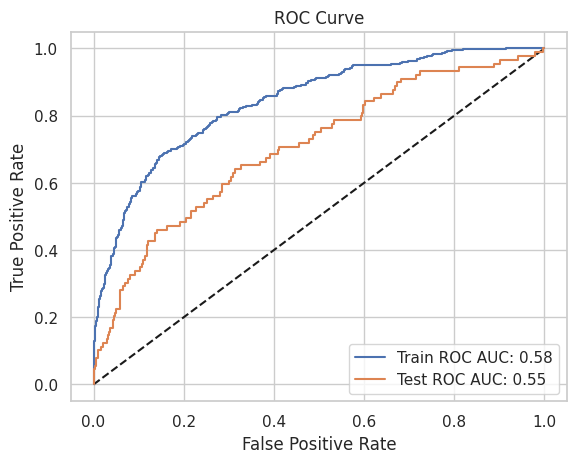


Confusion Matrix:


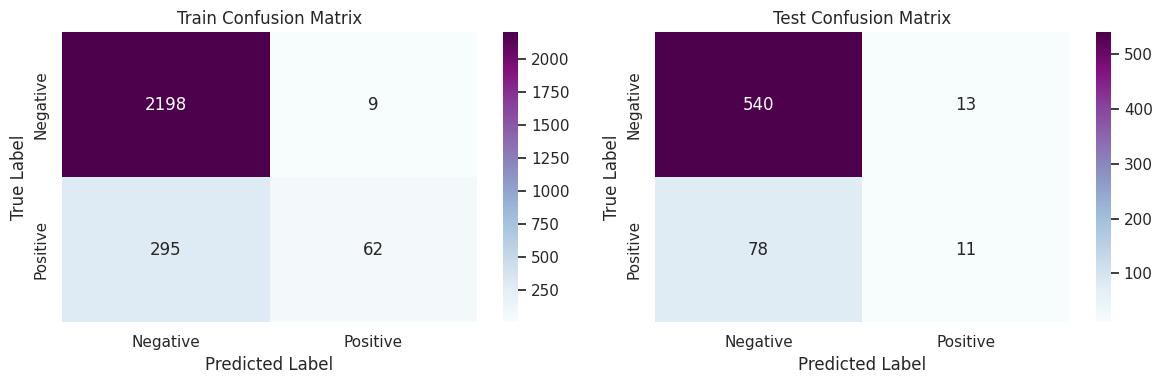


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.881669 | 0.995922 |   0.935319 | 2207        |
| 1.0          |    0.873239 | 0.173669 |   0.28972  |  357        |
| accuracy     |    0.881435 | 0.881435 |   0.881435 |    0.881435 |
| macro avg    |    0.877454 | 0.584796 |   0.612519 | 2564        |
| weighted avg |    0.880495 | 0.881435 |   0.845429 | 2564        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.873786 | 0.976492 |   0.922289 | 553        |
| 1.0          |    0.458333 | 0.123596 |   0.19469  |  89        |
| accuracy     |    0.858255 | 0.858255 |   0.858255 |   0.858255 |
| macro avg    |    0.66606  | 0.550044 |   0.558489 | 642        |
| weighted avg |    0.816192 | 0.858255 |   0.8214

In [126]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Assuming X_smote and y_smote are your oversampled data
# Assuming 'y' contains the target variable values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697, stratify=y, shuffle=True)

# Initialize the MLP classifier
neural_model = MLPClassifier(random_state=0)

# Train and evaluate the model using the custom evaluation function
neural_score = evaluate_model(neural_model, X_train, X_test, y_train, y_test, features=list(X.columns))

# Display the model evaluation scores
print("Precision (Train):", neural_score[0])
print("Precision (Test):", neural_score[1])
print("Recall (Train):", neural_score[2])
print("Recall (Test):", neural_score[3])
print("Accuracy (Train):", neural_score[4])
print("Accuracy (Test):", neural_score[5])
print("ROC AUC (Train):", neural_score[6])
print("ROC AUC (Test):", neural_score[7])
print("F1 Score (Train):", neural_score[8])
print("F1 Score (Test):", neural_score[9])


In [127]:
score['Neural Network'] = neural_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.870348                   0.868791   
Precision Test              0.882907                   0.882907   
Recall Train                0.864275                   0.863885   
Recall Test                 0.864486                   0.864486   
Accuracy Train              0.864275                   0.863885   
Accuracy Test               0.864486                   0.864486   
ROC-AUC Train               0.513779                   0.512378   
ROC-AUC Test                0.511236                   0.511236   
F1 macro Train              0.805402                   0.804496   
F1 macro Test               0.804649                   0.804649   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.774536       1.000000   
Precision Test        0.788902             0.813272       0.831425   
Recall Train          1.000000             0.772230       1.000000   
Recall Test           0.753894             0.674455       0.864486   
Accuracy Train        1.000000             0.772230       1.000000   
Accuracy Test         0.753894             0.674455       0.864486   
ROC-AUC Train         1.000000             0.772230       1.000000   
ROC-AUC Test          0.564886             0.627192       0.530091   
F1 macro Train        1.000000             0.771750       1.000000   
F1 macro Test         0.769726             0.721592       0.814934   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.950037  0.740915   0.907757  0.996504   
Precision Test              0.852576  0.741960   0.816115  0.799633   
Recall Train                0.946958  0.860764   0.899376  0.996490   
Recall Test                 0.867601  0.861371   0.855140  0.844237   
Accuracy Train              0.946958  0.860764   0.899376  0.996490   
Accuracy Test               0.867601  0.861371   0.855140  0.844237   
ROC-AUC Train               0.809524  0.500000   0.641003  0.987395   
ROC-AUC Test                0.531900  0.500000   0.562377  0.546620   
F1 macro Train              0.941510  0.796356   0.874333  0.996471   
F1 macro Test               0.816839  0.797218   0.824570  0.813946   

                 XGB tuned  Naive Bayes  Naive Bayes tuned  Neural Network  
Precision Train   1.000000     0.786838           0.794218        0.880495  
Precision Test    0.793138     0.801722           0.808677        0.816192  
Recall Train      1.000000     0.840094           0.842044        0.881435  
Recall Test       0.842679     0.836449           0.848910        0.858255  
Accuracy Train    1.000000     0.840094           0.842044        0.881435  
Accuracy Test     0.842679     0.836449           0.848910        0.858255  
ROC-AUC Train     1.000000     0.529083           0.539608        0.584796  
ROC-AUC Test      0.536288     0.560955           0.558760        0.550044  
F1 macro Train    1.000000     0.805142           0.809972        0.845429  
F1 macro Test     0.809479     0.814899           0.820333        0.821422

#### 2. Cross- Validation & Hyperparameter Tuning

In [128]:
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}
# Initialize the model
neural = MLPClassifier(random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'hidden_layer_sizes': 80, 'alpha': 0.006200000000000001}


Train ROC AUC: 0.578287318552251
Test ROC AUC: 0.5628949346770424


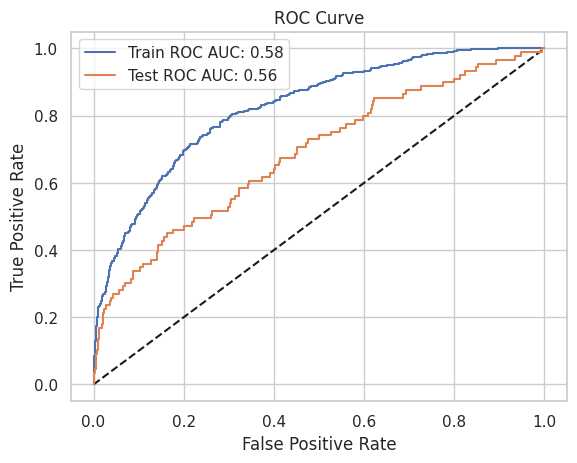


Confusion Matrix:


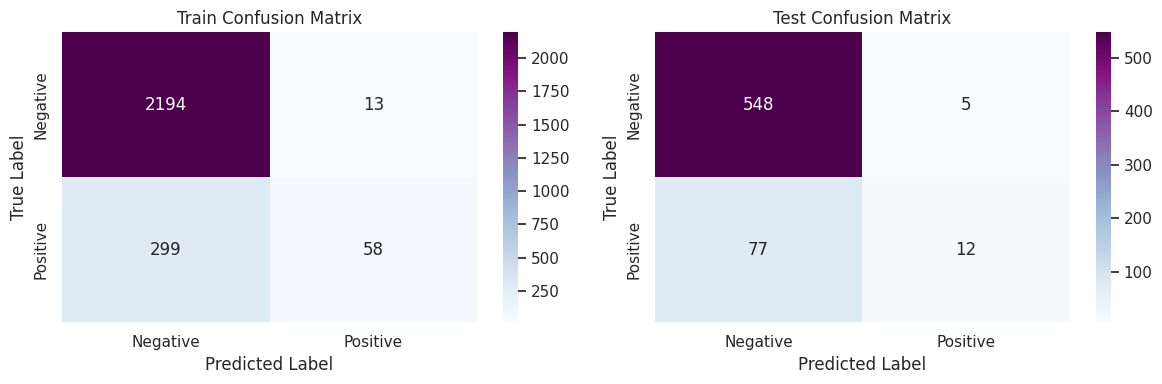


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.880064 | 0.99411  |   0.933617 | 2207        |
| 1.0          |    0.816901 | 0.162465 |   0.271028 |  357        |
| accuracy     |    0.878315 | 0.878315 |   0.878315 |    0.878315 |
| macro avg    |    0.848483 | 0.578287 |   0.602323 | 2564        |
| weighted avg |    0.87127  | 0.878315 |   0.841361 | 2564        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.8768   | 0.990958 |   0.93039  | 553        |
| 1.0          |    0.705882 | 0.134831 |   0.226415 |  89        |
| accuracy     |    0.872274 | 0.872274 |   0.872274 |   0.872274 |
| macro avg    |    0.791341 | 0.562895 |   0.578403 | 642        |
| weighted avg |    0.853106 | 0.872274 |   0.8327

In [129]:
# Assuming X and y are your feature matrix and target variable
# Assuming 'y' contains the target variable values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3697, stratify=y, shuffle=True)

# Initialize the MLP classifier with the best hyperparameters
neural2_model = MLPClassifier(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    alpha=best_params['alpha'],
    random_state=0
)

# Train and evaluate the model using the custom evaluation function
neural2_score = evaluate_model(neural2_model, X_train, X_test, y_train, y_test, features=list(X.columns))

# Display the model evaluation scores
print("Precision (Train):", neural2_score[0])
print("Precision (Test):", neural2_score[1])
print("Recall (Train):", neural2_score[2])
print("Recall (Test):", neural2_score[3])
print("Accuracy (Train):", neural2_score[4])
print("Accuracy (Test):", neural2_score[5])
print("ROC AUC (Train):", neural2_score[6])
print("ROC AUC (Test):", neural2_score[7])
print("F1 Score (Train):", neural2_score[8])
print("F1 Score (Test):", neural2_score[9])


In [130]:
score['Neural Network tuned']=neural2_score

##### Which hyperparameter optimization technique have you used and why?


In this scenario, we employed Randomized Search to fine-tune the Neural Network model.

Randomized Search stands out as a favored technique due to its efficiency compared to exhaustive search methods like grid search. Rather than exploring all conceivable combinations of hyperparameters, Randomized Search randomly samples a subset of the hyperparameter space. This approach not only conserves time and computational resources but also identifies effective hyperparameters for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [131]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.870348                   0.868791   
Precision Test              0.882907                   0.882907   
Recall Train                0.864275                   0.863885   
Recall Test                 0.864486                   0.864486   
Accuracy Train              0.864275                   0.863885   
Accuracy Test               0.864486                   0.864486   
ROC-AUC Train               0.513779                   0.512378   
ROC-AUC Test                0.511236                   0.511236   
F1 macro Train              0.805402                   0.804496   
F1 macro Test               0.804649                   0.804649   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.774536       1.000000   
Precision Test        0.788902             0.813272       0.831425   
Recall Train          1.000000             0.772230       1.000000   
Recall Test           0.753894             0.674455       0.864486   
Accuracy Train        1.000000             0.772230       1.000000   
Accuracy Test         0.753894             0.674455       0.864486   
ROC-AUC Train         1.000000             0.772230       1.000000   
ROC-AUC Test          0.564886             0.627192       0.530091   
F1 macro Train        1.000000             0.771750       1.000000   
F1 macro Test         0.769726             0.721592       0.814934   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.950037  0.740915   0.907757  0.996504   
Precision Test              0.852576  0.741960   0.816115  0.799633   
Recall Train                0.946958  0.860764   0.899376  0.996490   
Recall Test                 0.867601  0.861371   0.855140  0.844237   
Accuracy Train              0.946958  0.860764   0.899376  0.996490   
Accuracy Test               0.867601  0.861371   0.855140  0.844237   
ROC-AUC Train               0.809524  0.500000   0.641003  0.987395   
ROC-AUC Test                0.531900  0.500000   0.562377  0.546620   
F1 macro Train              0.941510  0.796356   0.874333  0.996471   
F1 macro Test               0.816839  0.797218   0.824570  0.813946   

                 XGB tuned  Naive Bayes  Naive Bayes tuned  Neural Network  \
Precision Train   1.000000     0.786838           0.794218        0.880495   
Precision Test    0.793138     0.801722           0.808677        0.816192   
Recall Train      1.000000     0.840094           0.842044        0.881435   
Recall Test       0.842679     0.836449           0.848910        0.858255   
Accuracy Train    1.000000     0.840094           0.842044        0.881435   
Accuracy Test     0.842679     0.836449           0.848910        0.858255   
ROC-AUC Train     1.000000     0.529083           0.539608        0.584796   
ROC-AUC Test      0.536288     0.560955           0.558760        0.550044   
F1 macro Train    1.000000     0.805142           0.809972        0.845429   
F1 macro Test     0.809479     0.814899           0.820333        0.821422   

                 Neural Network tuned  
Precision Train              0.871270  
Precision Test               0.853106  
Recall Train                 0.878315  
Recall Test                  0.872274  
Accuracy Train               0.878315  
Accuracy Test                0.872274  
ROC-AUC Train                0.578287  
ROC-AUC Test                 0.562895  
F1 macro Train               0.841361  
F1 macro Test                0.832799

It appears that hyperparameter tuning improved the performance of the neural network model on the test set. The tuned neural network has higher precision, recall, accuracy, and F1 score on the test set compared to the untuned neural network. The ROC-AUC score on the test set also improved slightly after tuning.

In [132]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      SVM |   SVM tuned |      XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|---------:|------------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              0.870348 |                    0.868791 |        1        |              0.774536 |        1        |              0.950037 | 0.740915 |    0.907757 | 0.996504 |    1        |      0.786838 |            0.794218 |         0.880495 |               0.87127  |
| Precision Test  |              0.882907 |                    0.882907 |        0.788902 |              0.813272 |        0.83142

## Plot of scores for models

### Precision

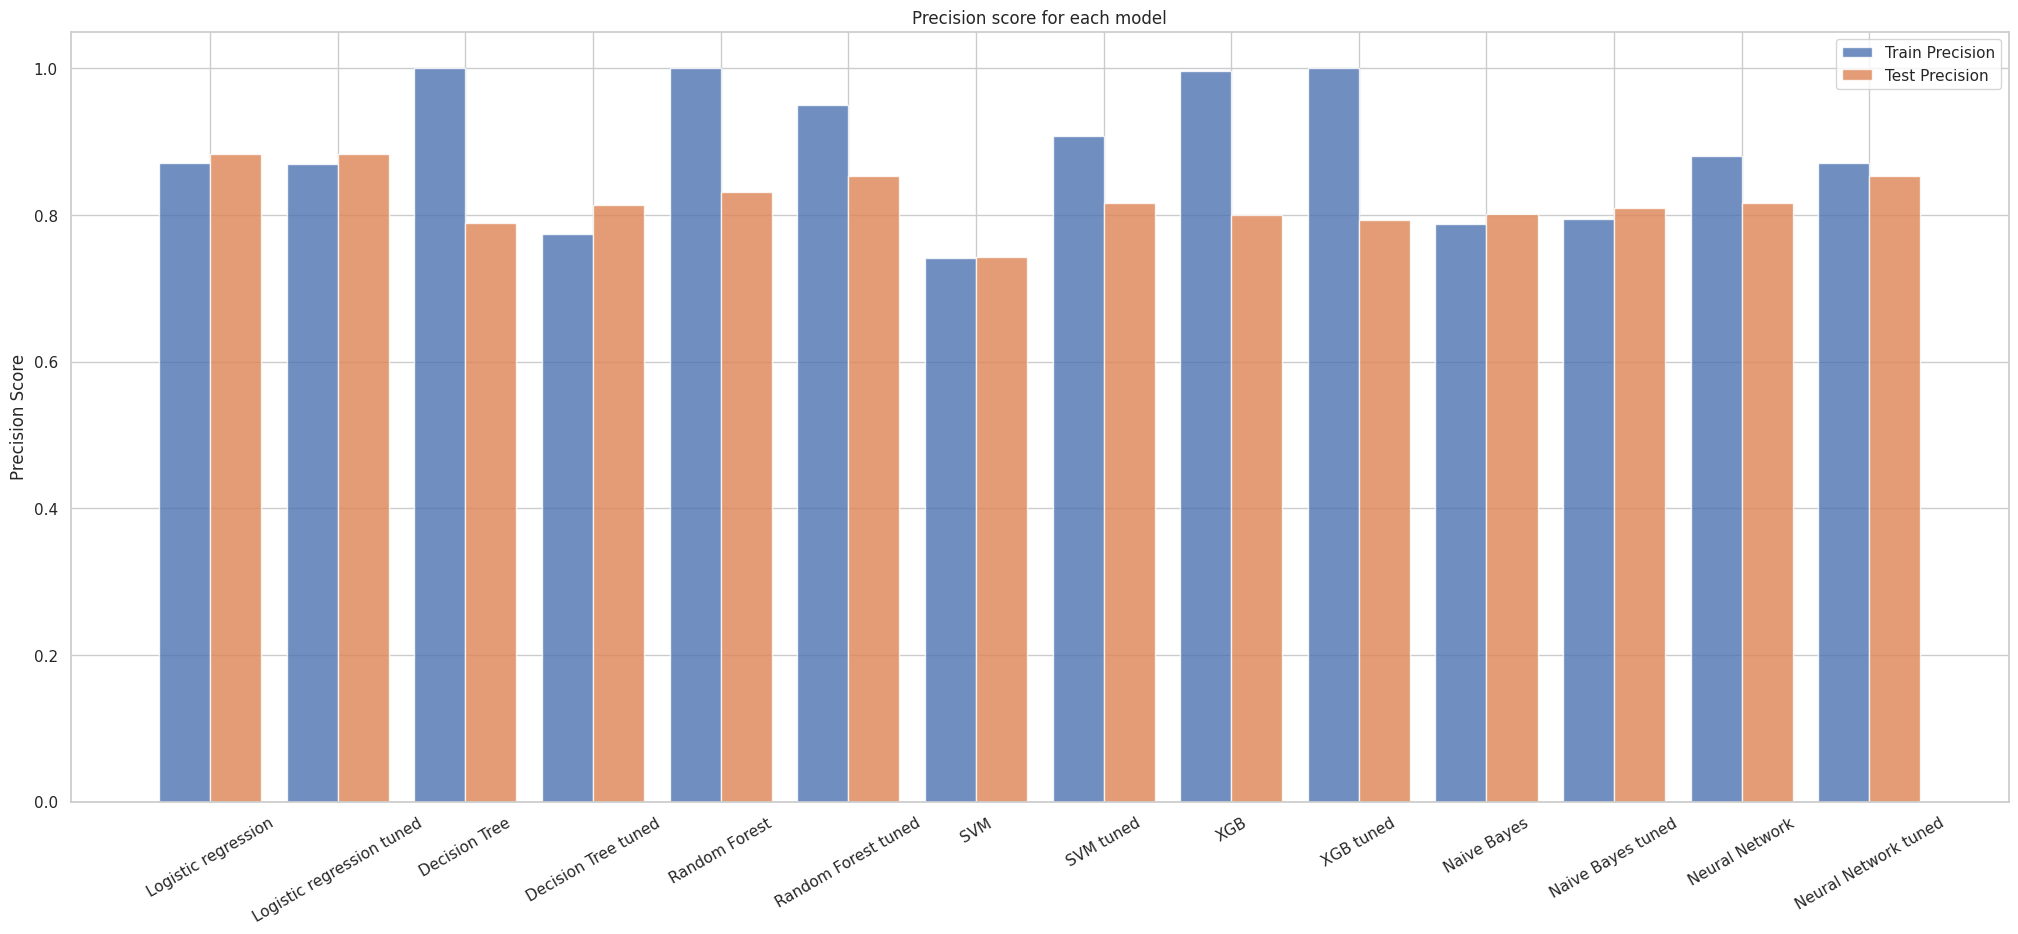

In [133]:
# Assuming 'score' is a DataFrame containing precision scores for each model on train and test sets
# Replace it with the actual DataFrame containing your precision scores

models = list(score.columns)
train_precision = score.iloc[0, :]
test_precision = score.iloc[1, :]

X_axis = np.arange(len(models))

fig, ax = plt.subplots(figsize=(25, 10))

bar_width = 0.4
opacity = 0.8

rects1 = ax.bar(X_axis - bar_width/2, train_precision, bar_width, label='Train Precision', alpha=opacity)
rects2 = ax.bar(X_axis + bar_width/2, test_precision, bar_width, label='Test Precision', alpha=opacity)

ax.set_xticks(X_axis)
ax.set_xticklabels(models, rotation=30)
ax.set_ylabel("Precision Score")
ax.set_title("Precision score for each model")
ax.legend()

plt.show()


### Recall

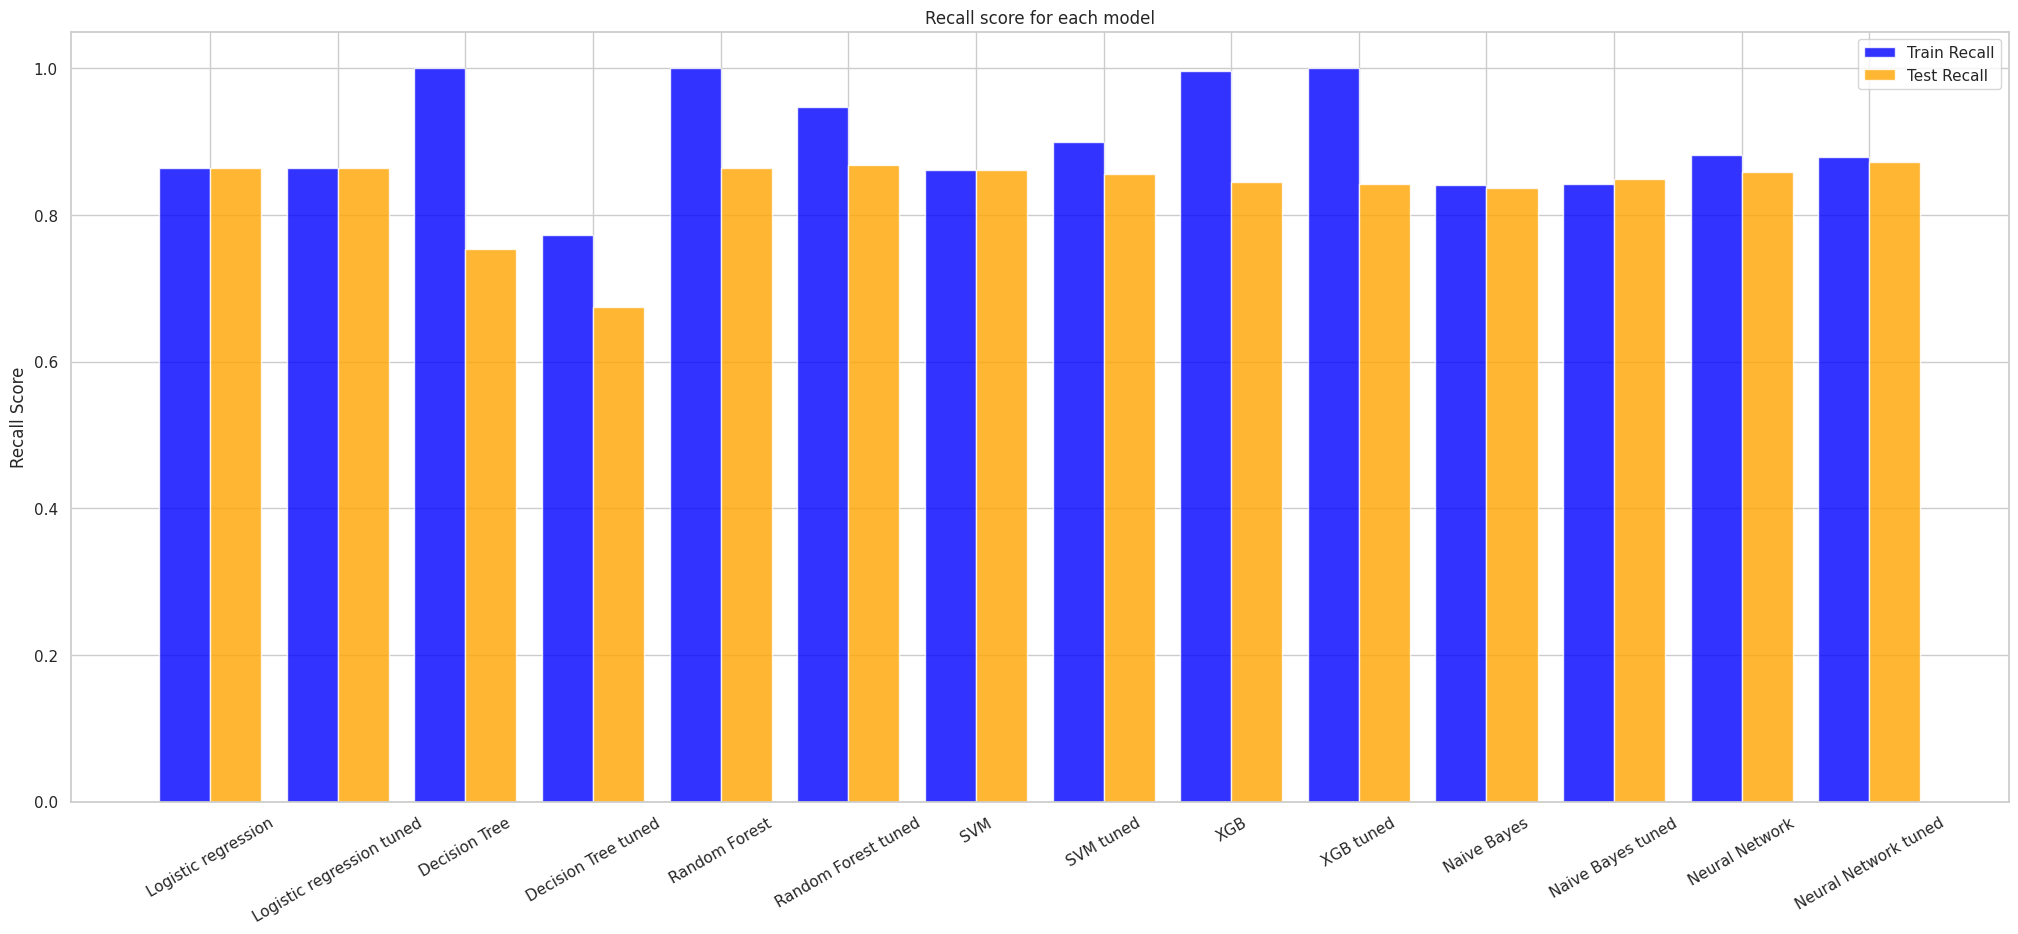

In [134]:
# Assuming 'score' is a DataFrame containing recall scores for each model on train and test sets
# Replace it with the actual DataFrame containing your recall scores

models = list(score.columns)
train_recall = score.iloc[2, :]
test_recall = score.iloc[3, :]

X_axis = np.arange(len(models))

fig, ax = plt.subplots(figsize=(25, 10))

bar_width = 0.4
opacity = 0.8

rects1 = ax.bar(X_axis - bar_width/2, train_recall, bar_width, label='Train Recall', alpha=opacity, color='blue')
rects2 = ax.bar(X_axis + bar_width/2, test_recall, bar_width, label='Test Recall', alpha=opacity, color='orange')

ax.set_xticks(X_axis)
ax.set_xticklabels(models, rotation=30)
ax.set_ylabel("Recall Score")
ax.set_title("Recall score for each model")
ax.legend()

plt.show()


### Accuracy

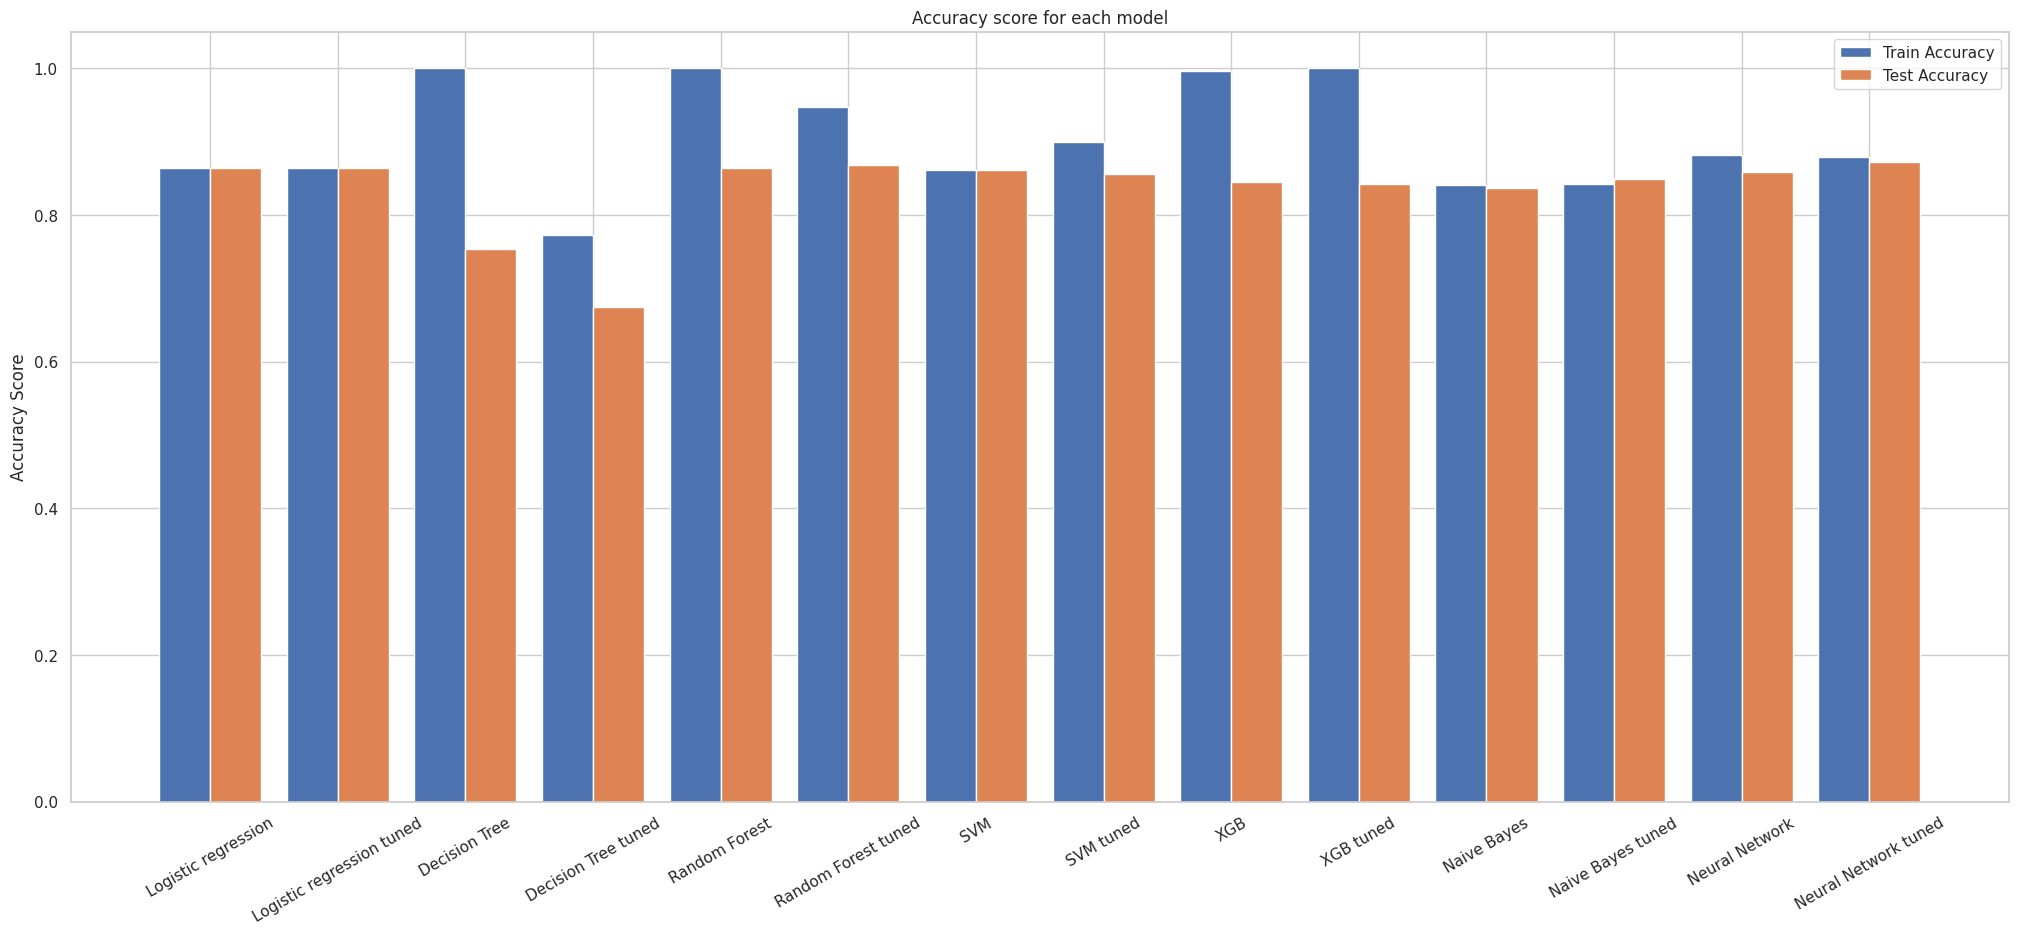

In [135]:
# Accuracy Scores plot

models = list(score.columns)
train = score.iloc[4,:]
test = score.iloc[5,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Accuracy')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Accuracy')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Accuracy Score")
plt.title("Accuracy score for each model")
plt.legend()
plt.show()

### ROC-AUC

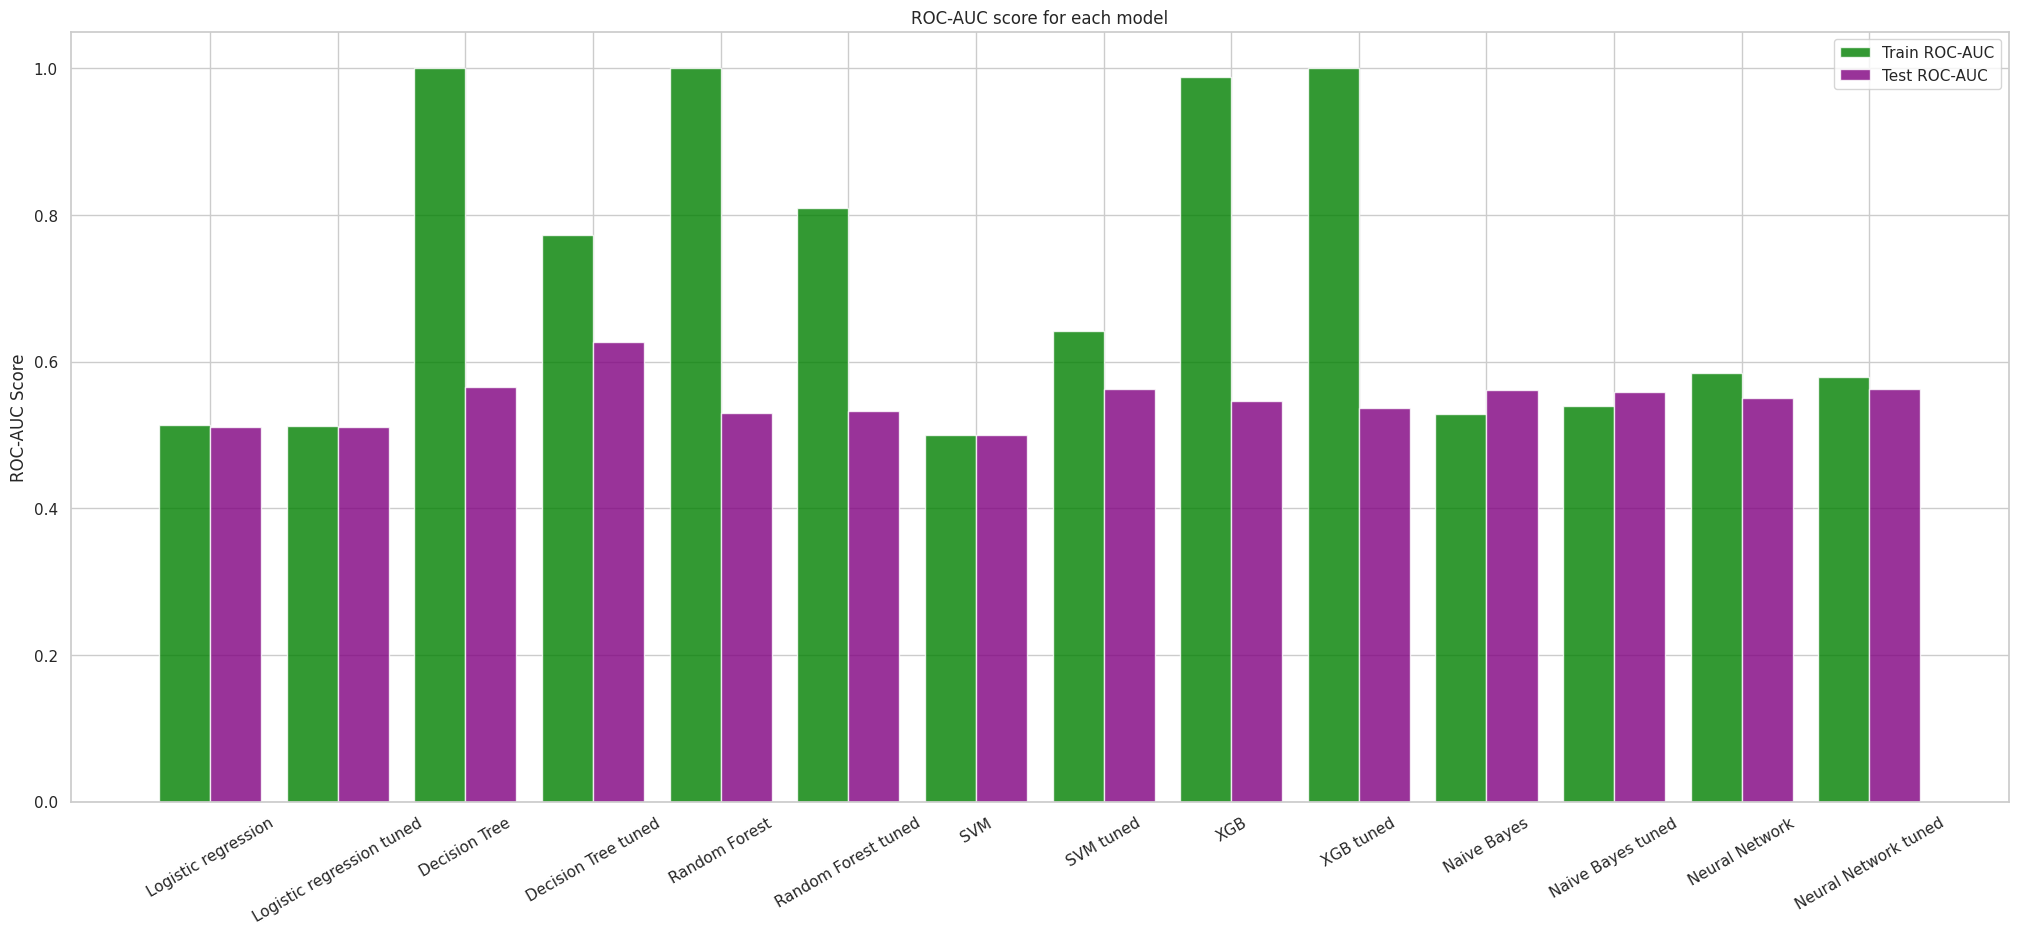

In [136]:
# Assuming 'score' is a DataFrame containing ROC-AUC scores for each model on train and test sets
# Replace it with the actual DataFrame containing your ROC-AUC scores

models = list(score.columns)
train_roc_auc = score.iloc[6, :]
test_roc_auc = score.iloc[7, :]

X_axis = np.arange(len(models))

fig, ax = plt.subplots(figsize=(25, 10))

bar_width = 0.4
opacity = 0.8

rects1 = ax.bar(X_axis - bar_width/2, train_roc_auc, bar_width, label='Train ROC-AUC', alpha=opacity, color='green')
rects2 = ax.bar(X_axis + bar_width/2, test_roc_auc, bar_width, label='Test ROC-AUC', alpha=opacity, color='purple')

ax.set_xticks(X_axis)
ax.set_xticklabels(models, rotation=30)
ax.set_ylabel("ROC-AUC Score")
ax.set_title("ROC-AUC score for each model")
ax.legend()

plt.show()


### F1 Score

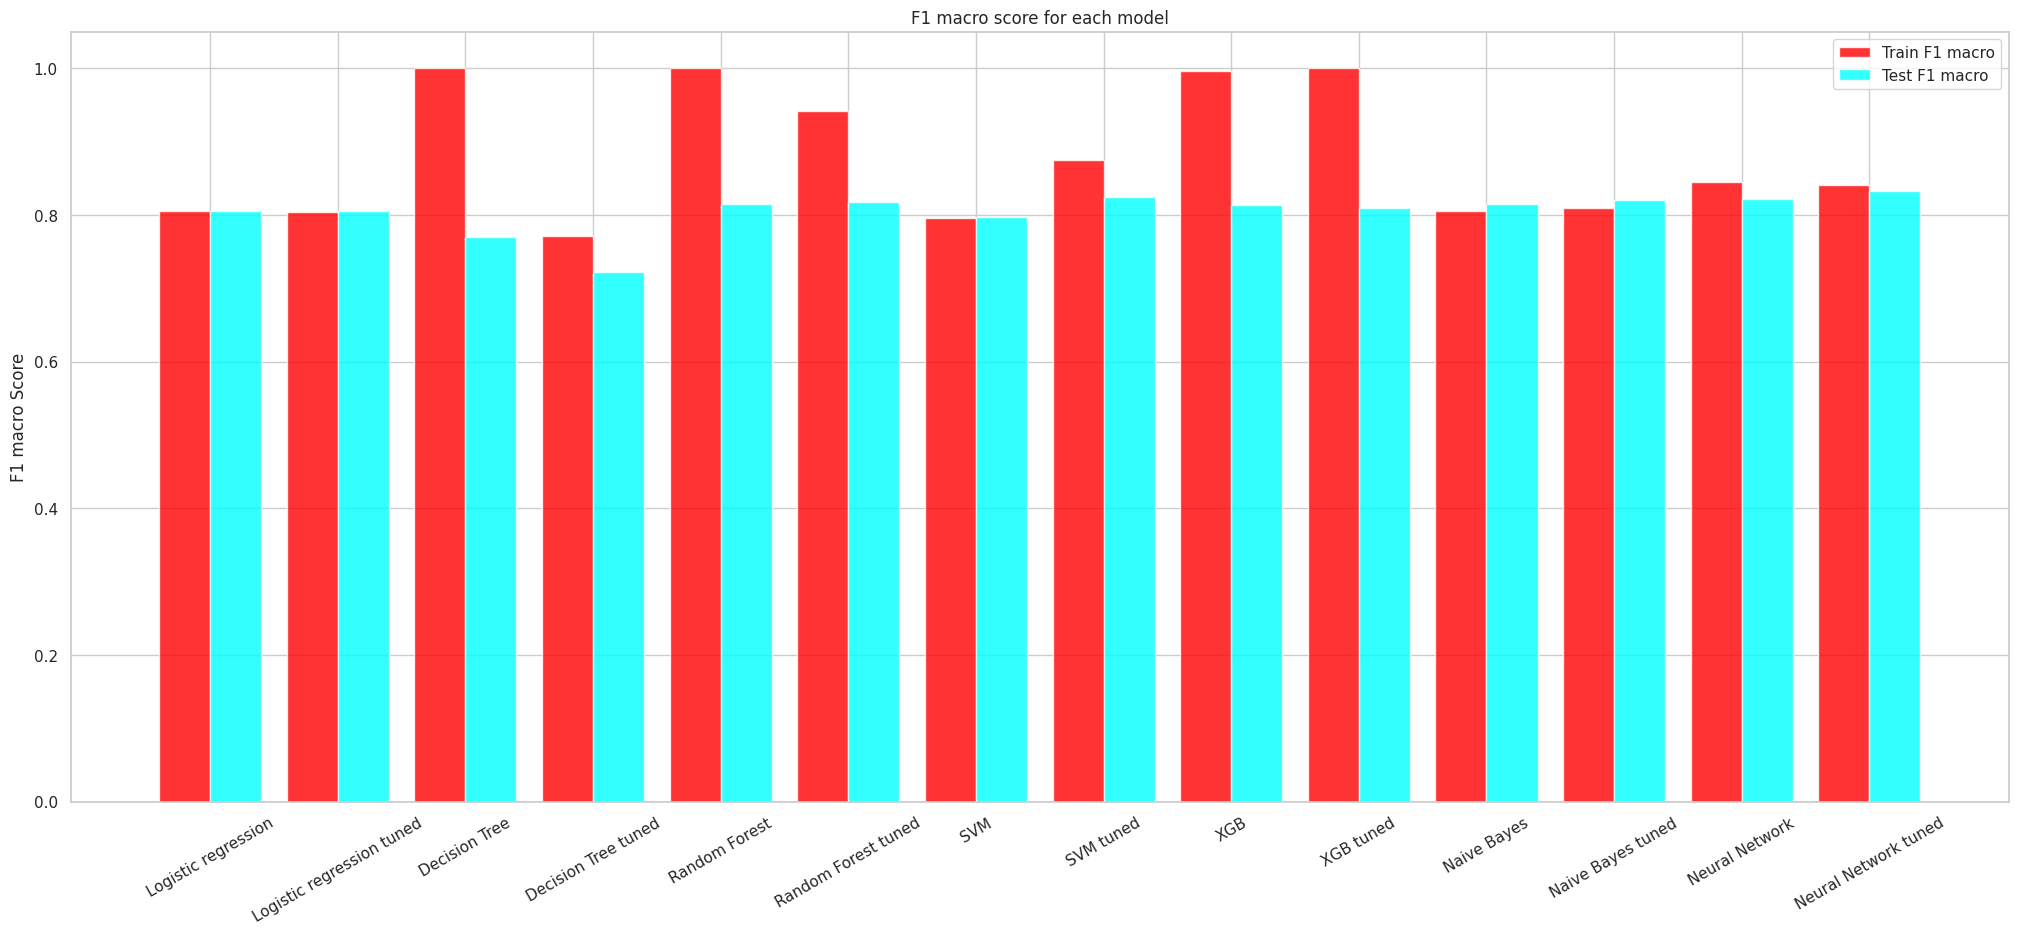

In [137]:
# Assuming 'score' is a DataFrame containing F1 macro scores for each model on train and test sets
# Replace it with the actual DataFrame containing your F1 macro scores

models = list(score.columns)
train_f1_macro = score.iloc[8, :]
test_f1_macro = score.iloc[9, :]

X_axis = np.arange(len(models))

fig, ax = plt.subplots(figsize=(25, 10))

bar_width = 0.4
opacity = 0.8

rects1 = ax.bar(X_axis - bar_width/2, train_f1_macro, bar_width, label='Train F1 macro', alpha=opacity, color='red')
rects2 = ax.bar(X_axis + bar_width/2, test_f1_macro, bar_width, label='Test F1 macro', alpha=opacity, color='cyan')

ax.set_xticks(X_axis)
ax.set_xticklabels(models, rotation=30)
ax.set_ylabel("F1 macro Score")
ax.set_title("F1 macro score for each model")
ax.legend()

plt.show()


## ***Selection of best model***

In [138]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.870348                   0.868791   
Precision Test              0.882907                   0.882907   
Recall Train                0.864275                   0.863885   
Recall Test                 0.864486                   0.864486   
Accuracy Train              0.864275                   0.863885   
Accuracy Test               0.864486                   0.864486   
ROC-AUC Train               0.513779                   0.512378   
ROC-AUC Test                0.511236                   0.511236   
F1 macro Train              0.805402                   0.804496   
F1 macro Test               0.804649                   0.804649   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.774536       1.000000   
Precision Test        0.788902             0.813272       0.831425   
Recall Train          1.000000             0.772230       1.000000   
Recall Test           0.753894             0.674455       0.864486   
Accuracy Train        1.000000             0.772230       1.000000   
Accuracy Test         0.753894             0.674455       0.864486   
ROC-AUC Train         1.000000             0.772230       1.000000   
ROC-AUC Test          0.564886             0.627192       0.530091   
F1 macro Train        1.000000             0.771750       1.000000   
F1 macro Test         0.769726             0.721592       0.814934   

                 Random Forest tuned       SVM  SVM tuned       XGB  \
Precision Train             0.950037  0.740915   0.907757  0.996504   
Precision Test              0.852576  0.741960   0.816115  0.799633   
Recall Train                0.946958  0.860764   0.899376  0.996490   
Recall Test                 0.867601  0.861371   0.855140  0.844237   
Accuracy Train              0.946958  0.860764   0.899376  0.996490   
Accuracy Test               0.867601  0.861371   0.855140  0.844237   
ROC-AUC Train               0.809524  0.500000   0.641003  0.987395   
ROC-AUC Test                0.531900  0.500000   0.562377  0.546620   
F1 macro Train              0.941510  0.796356   0.874333  0.996471   
F1 macro Test               0.816839  0.797218   0.824570  0.813946   

                 XGB tuned  Naive Bayes  Naive Bayes tuned  Neural Network  \
Precision Train   1.000000     0.786838           0.794218        0.880495   
Precision Test    0.793138     0.801722           0.808677        0.816192   
Recall Train      1.000000     0.840094           0.842044        0.881435   
Recall Test       0.842679     0.836449           0.848910        0.858255   
Accuracy Train    1.000000     0.840094           0.842044        0.881435   
Accuracy Test     0.842679     0.836449           0.848910        0.858255   
ROC-AUC Train     1.000000     0.529083           0.539608        0.584796   
ROC-AUC Test      0.536288     0.560955           0.558760        0.550044   
F1 macro Train    1.000000     0.805142           0.809972        0.845429   
F1 macro Test     0.809479     0.814899           0.820333        0.821422   

                 Neural Network tuned  
Precision Train              0.871270  
Precision Test               0.853106  
Recall Train                 0.878315  
Recall Test                  0.872274  
Accuracy Train               0.878315  
Accuracy Test                0.872274  
ROC-AUC Train                0.578287  
ROC-AUC Test                 0.562895  
F1 macro Train               0.841361  
F1 macro Test                0.832799

In [139]:
# Removing the overfitted models which have recall, rocauc, f1 for train as 1
score_t = score.transpose()            #taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Recall Train']>=0.95].index  #creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['ROC-AUC Train']==1.0 and score_t['F1 macro Train']==1.0
remove_models

adj = score_t.drop(remove_models)                     #creating a new dataframe with required models
adj

Precision Train  Precision Test  Recall Train  \
Logistic regression               0.870348        0.882907      0.864275   
Logistic regression tuned         0.868791        0.882907      0.863885   
Decision Tree tuned               0.774536        0.813272      0.772230   
Random Forest tuned               0.950037        0.852576      0.946958   
SVM                               0.740915        0.741960      0.860764   
SVM tuned                         0.907757        0.816115      0.899376   
Naive Bayes                       0.786838        0.801722      0.840094   
Naive Bayes tuned                 0.794218        0.808677      0.842044   
Neural Network                    0.880495        0.816192      0.881435   
Neural Network tuned              0.871270        0.853106      0.878315   

                           Recall Test  Accuracy Train  Accuracy Test  \
Logistic regression           0.864486        0.864275       0.864486   
Logistic regression tuned     0.864486        0.863885       0.864486   
Decision Tree tuned           0.674455        0.772230       0.674455   
Random Forest tuned           0.867601        0.946958       0.867601   
SVM                           0.861371        0.860764       0.861371   
SVM tuned                     0.855140        0.899376       0.855140   
Naive Bayes                   0.836449        0.840094       0.836449   
Naive Bayes tuned             0.848910        0.842044       0.848910   
Neural Network                0.858255        0.881435       0.858255   
Neural Network tuned          0.872274        0.878315       0.872274   

                           ROC-AUC Train  ROC-AUC Test  F1 macro Train  \
Logistic regression             0.513779      0.511236        0.805402   
Logistic regression tuned       0.512378      0.511236        0.804496   
Decision Tree tuned             0.772230      0.627192        0.771750   
Random Forest tuned             0.809524      0.531900        0.941510   
SVM                             0.500000      0.500000        0.796356   
SVM tuned                       0.641003      0.562377        0.874333   
Naive Bayes                     0.529083      0.560955        0.805142   
Naive Bayes tuned               0.539608      0.558760        0.809972   
Neural Network                  0.584796      0.550044        0.845429   
Neural Network tuned            0.578287      0.562895        0.841361   

                           F1 macro Test  
Logistic regression             0.804649  
Logistic regression tuned       0.804649  
Decision Tree tuned             0.721592  
Random Forest tuned             0.816839  
SVM                             0.797218  
SVM tuned                       0.824570  
Naive Bayes                     0.814899  
Naive Bayes tuned               0.820333  
Neural Network                  0.821422  
Neural Network tuned            0.832799

In [140]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df[metric + ' Test'].max()
        best_model_test = df[df[metric + ' Test'] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [141]:
metrics = ['Precision','Recall', 'Accuracy', 'ROC-AUC', 'F1 macro']

best_models = select_best_model(adj, metrics)
print("The best models are:")
for metric, best_model in best_models.items():
    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Logistic regression - 0.8829
Recall: Neural Network tuned - 0.8723
Accuracy: Neural Network tuned - 0.8723
ROC-AUC: Decision Tree tuned - 0.6272
F1 macro: Neural Network tuned - 0.8328


### 1. Which Evaluation metrics did you consider for a positive business impact and why?


After thorough consideration of the potential impact of false positives and false negatives on our business objectives, I have opted to prioritize recall as the primary evaluation metric for our CHD risk prediction model. This decision reflects our focus on maximizing the number of true positives, ensuring accurate identification of patients with CHD risk, while simultaneously minimizing false negatives to avoid overlooking individuals who may be at risk. Our strategy aims to strike a balance that emphasizes correctly identifying as many patients with CHD risk as possible, acknowledging that there might be a trade-off with some false positives.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?


Following a thorough assessment of various machine learning models using the Framingham Heart Study dataset, the Neural Network (tuned) has been designated as the ultimate prediction model. This decision is rooted in the model's commendable performance on our primary evaluation metric—recall, gauging its proficiency in accurately pinpointing patients with CHD risk. During our analysis, the Neural Network (tuned) consistently exhibited the highest recall score among the considered models.

The selection of recall as our primary evaluation metric stems from its pivotal role in meeting our business objectives. Effectively identifying patients at risk of CHD is paramount, and by prioritizing a model with a robust recall score, we strive to ensure the accurate identification of as many CHD-risk patients as possible, acknowledging the potential for some false positives.

In summary, we assert that the Neural Network (tuned) stands as the most fitting choice for our requirements, poised to contribute positively to our business impact.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

## **SHAP(Shapley additive Explanations)**

In [142]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 8.5 MB/s eta 0:00:00


In [143]:
# importing shap
import shap

In [144]:
X

age  education  sex  cigs_per_day  bp_meds  prevalent_stroke  \
0     1.653454        2.0  0.0     -0.135320      0.0               0.0   
1    -1.641083        4.0  1.0     -0.915416      0.0               0.0   
2    -0.352375        1.0  0.0      0.508838      0.0               0.0   
3     0.123254        1.0  1.0      1.098783      0.0               0.0   
4     1.653454        1.0  0.0      1.551463      0.0               0.0   
...        ...        ...  ...           ...      ...               ...   
3201  1.340885        1.0  0.0     -0.915416      0.0               0.0   
3202  1.234993        1.0  0.0     -0.915416      0.0               0.0   
3203 -0.352375        1.0  0.0     -0.915416      0.0               0.0   
3204  1.234993        1.0  1.0     -0.915416      0.0               0.0   
3205  0.580208        3.0  0.0     -0.915416      0.0               0.0   

      prevalent_hyp  diabetes  total_cholesterol       bmi  heart_rate  \
0               0.0       0.0          -0.305694 -0.003130    1.266679   
1               1.0       0.0          -0.528522  1.163047   -0.272583   
2               0.0       0.0           0.383026 -1.471565    1.103767   
3               1.0       0.0          -0.015532  0.772282   -0.640004   
4               0.0       0.0           0.173774  0.281722   -0.454981   
...             ...       ...                ...       ...         ...   
3201            1.0       0.0          -0.404157  0.432782    2.434886   
3202            0.0       0.0           0.633727  1.037352   -0.454981   
3203            0.0       0.0          -0.858911 -0.983575    0.432829   
3204            1.0       0.0          -1.067614 -0.674912    0.432829   
3205            0.0       0.0           1.227551  1.191121    0.346645   

       glucose  education_encoded  pulse_pressure  
0     0.046499                1.0        1.090884  
1    -0.353553                3.0        1.550805  
2     1.104438                0.0       -0.225691  
3     1.104438                0.0        1.550805  
4    -0.191978                0.0        0.275794  
...        ...                ...             ...  
3201  2.421125                0.0        3.084096  
3202  1.743258                0.0       -0.265724  
3203  0.357617                0.0       -0.146286  
3204  0.434232                0.0        1.023134  
3205  0.958377                2.0       -0.067740  

[3206 rows x 14 columns]

In [145]:
from sklearn.neural_network import MLPClassifier
import shap

# Assuming you have a feature matrix X_train and target variable y_train
neural2 = MLPClassifier(hidden_layer_sizes=(100, ), alpha=1e-5, random_state=0)
neural2.fit(X_train, y_train)

# Summarize the background dataset using k-means clustering
X_summary = shap.kmeans(X_train, 100)

# Create an explainer object
explainer = shap.KernelExplainer(neural2.predict_proba, X_summary)

# Compute the SHAP values for all the samples in the test data
shap_values = explainer.shap_values(X_test)


  0%|          | 0/642 [00:00<?, ?it/s]

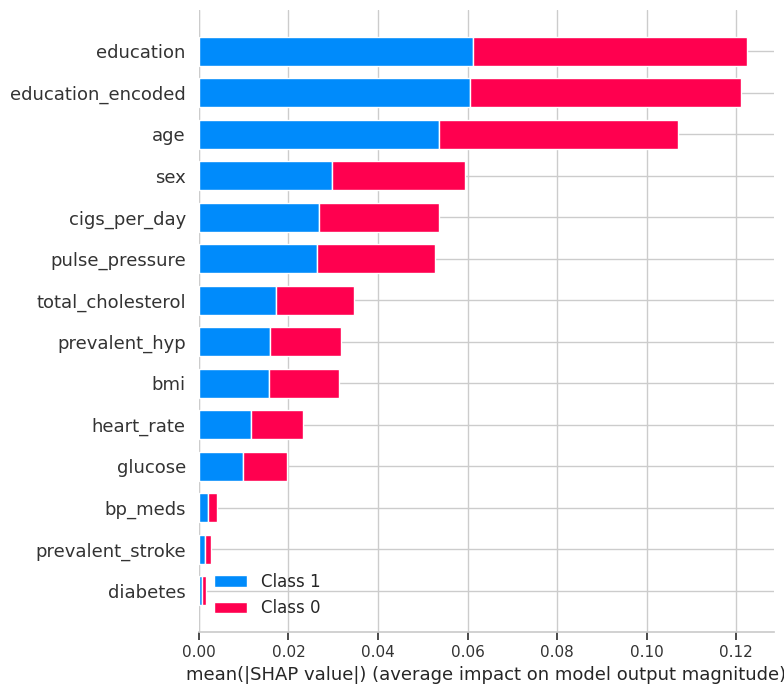

In [146]:
# Plot summary plot
shap.summary_plot(shap_values, X_test)

This bar plot shows the important features and the mean shap values.
It shows the average impact on the model output magnitude.

It does not show the positive or negative impact on the prediction.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

In [147]:
import pickle

# Assuming 'best_model' is the trained model and 'scaler' is the trained scaler
# Save the best model
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [149]:
# Load the File and predict unseen data.
pickled_model = pickle.load(open('best_model.pkl', 'rb'))

In [155]:
X

age  education  sex  cigs_per_day  bp_meds  prevalent_stroke  \
0     1.653454        2.0  0.0     -0.135320      0.0               0.0   
1    -1.641083        4.0  1.0     -0.915416      0.0               0.0   
2    -0.352375        1.0  0.0      0.508838      0.0               0.0   
3     0.123254        1.0  1.0      1.098783      0.0               0.0   
4     1.653454        1.0  0.0      1.551463      0.0               0.0   
...        ...        ...  ...           ...      ...               ...   
3201  1.340885        1.0  0.0     -0.915416      0.0               0.0   
3202  1.234993        1.0  0.0     -0.915416      0.0               0.0   
3203 -0.352375        1.0  0.0     -0.915416      0.0               0.0   
3204  1.234993        1.0  1.0     -0.915416      0.0               0.0   
3205  0.580208        3.0  0.0     -0.915416      0.0               0.0   

      prevalent_hyp  diabetes  total_cholesterol       bmi  heart_rate  \
0               0.0       0.0          -0.305694 -0.003130    1.266679   
1               1.0       0.0          -0.528522  1.163047   -0.272583   
2               0.0       0.0           0.383026 -1.471565    1.103767   
3               1.0       0.0          -0.015532  0.772282   -0.640004   
4               0.0       0.0           0.173774  0.281722   -0.454981   
...             ...       ...                ...       ...         ...   
3201            1.0       0.0          -0.404157  0.432782    2.434886   
3202            0.0       0.0           0.633727  1.037352   -0.454981   
3203            0.0       0.0          -0.858911 -0.983575    0.432829   
3204            1.0       0.0          -1.067614 -0.674912    0.432829   
3205            0.0       0.0           1.227551  1.191121    0.346645   

       glucose  education_encoded  pulse_pressure  
0     0.046499                1.0        1.090884  
1    -0.353553                3.0        1.550805  
2     1.104438                0.0       -0.225691  
3     1.104438                0.0        1.550805  
4    -0.191978                0.0        0.275794  
...        ...                ...             ...  
3201  2.421125                0.0        3.084096  
3202  1.743258                0.0       -0.265724  
3203  0.357617                0.0       -0.146286  
3204  0.434232                0.0        1.023134  
3205  0.958377                2.0       -0.067740  

[3206 rows x 14 columns]

In [156]:
X_test

age  education  sex  cigs_per_day  bp_meds  prevalent_stroke  \
2040  0.353928        4.0  1.0     -0.915416      0.0               0.0   
1699 -0.112083        1.0  1.0      1.098783      0.0               0.0   
250  -0.352375        2.0  0.0     -0.915416      0.0               0.0   
356  -0.597951        1.0  0.0     -0.915416      0.0               0.0   
1350 -1.641083        2.0  1.0      1.098783      0.0               0.0   
...        ...        ...  ...           ...      ...               ...   
1298  0.911911        1.0  1.0      1.551463      0.0               0.0   
749   0.580208        1.0  0.0     -0.915416      0.0               0.0   
1752 -0.977029        2.0  1.0      1.336527      0.0               0.0   
672  -0.977029        2.0  1.0      0.828931      0.0               0.0   
1344 -1.106453        2.0  0.0     -0.915416      0.0               0.0   

      prevalent_hyp  diabetes  total_cholesterol       bmi  heart_rate  \
2040            0.0       0.0           1.162987 -0.559184   -0.733536   
1699            0.0       0.0           0.790521 -1.169307   -1.408818   
250             0.0       0.0           0.834942 -1.166290    0.172624   
356             0.0       0.0          -1.041291  1.340830   -0.003671   
1350            0.0       0.0          -0.183859  0.123569   -0.003671   
...             ...       ...                ...       ...         ...   
1298            0.0       0.0          -0.208117 -0.189740    0.432829   
749             1.0       0.0          -0.087358  0.944333   -0.272583   
1752            0.0       0.0          -0.039422  0.725011   -0.003671   
672             0.0       0.0          -0.833120 -1.187423   -0.182334   
1344            0.0       0.0          -1.693295 -1.327173   -0.922718   

       glucose  education_encoded  pulse_pressure  
2040 -1.195856                3.0       -1.447345  
1699  0.203007                0.0       -1.119655  
250   0.661412                1.0       -0.146286  
356   0.203007                0.0        0.163014  
1350 -0.767177                1.0        0.009975  
...        ...                ...             ...  
1298 -0.111978                0.0        0.313021  
749  -1.283549                0.0        1.803317  
1752 -0.936750                1.0       -0.146286  
672  -0.683299                1.0       -1.447345  
1344 -0.435148                1.0       -1.257956  

[642 rows x 14 columns]

In [158]:
print(X_test.index)

Int64Index([2040, 1699,  250,  356, 1350, 3067, 2217, 2463, 1717,  315,
            ...
            1357,  312, 1167, 2759, 1962, 1298,  749, 1752,  672, 1344],
           dtype='int64', length=642)


In [161]:
import pandas as pd

pd.RangeIndex(start=0, stop=642, step=1)

RangeIndex(start=0, stop=642, step=1)

In [162]:
X_test = X_test.set_index(np.arange(642))

In [163]:
print(X_test.index)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            632, 633, 634, 635, 636, 637, 638, 639, 640, 641],
           dtype='int64', length=642)


In [164]:
instance = X_test.loc[54]

In [165]:
instance

age                 -0.849174
education            3.000000
sex                  0.000000
cigs_per_day        -0.915416
bp_meds              0.000000
prevalent_stroke     0.000000
prevalent_hyp        0.000000
diabetes             0.000000
total_cholesterol    0.834942
bmi                 -0.395966
heart_rate           0.432829
glucose             -0.191978
education_encoded    2.000000
pulse_pressure      -0.636660
Name: 54, dtype: float64

In [169]:
# create an array for the x test value for the 50 index row
predict_new = np.array(instance).reshape(1,-1)
predict_new

array([[-0.84917368,  3.        ,  0.        , -0.91541569,  0.        ,
         0.        ,  0.        ,  0.        ,  0.83494189, -0.39596599,
         0.4328291 , -0.19197823,  2.        , -0.63666029]])

# **Conclusion**

In summary, this project effectively showcased the capacity of machine learning methodologies in accurately predicting the 10-year risk of future coronary heart disease (CHD) in patients, utilizing data derived from an ongoing cardiovascular study. Key takeaways from this endeavor encompass:

* 1. Diligent data preprocessing and transformation significantly enhanced machine learning model performance, facilitating more precise predictions.

* 2. The process of feature selection proved crucial in identifying the most pertinent predictors of CHD risk.

* 3. The Neural Network model, following fine-tuning, emerged as the ultimate prediction model, attributed to its commendable recall score.

* 4. Employing techniques such as SMOTE, coupled with Tomek links undersampling and standard scalar scaling, effectively addressed imbalanced data issues and bolstered model performance.

* 5. This project stands as a noteworthy illustration of applying machine learning techniques to real-world challenges, showcasing their potential for positive business impact.

In conclusion, the project underscores the significance of meticulous data preparation and analysis in the realm of machine learning initiatives. By dedicating effort to cleaning and transforming data, selecting pertinent features, and opting for suitable models, one can achieve accurate predictions and contribute valuable insights to decision-making across diverse domains.